# Projet Machine Learning : Prédiction de l'émission de CO2

In [167]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)

In [168]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [169]:
head(energy)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [170]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year en une variable qualitative

In [171]:
energy$Year = as.factor(energy$Year)

### Convertir Density en une variable numérique

In [172]:
energy$Density.n.P.Km2. = as.numeric(gsub(",","",energy$Density.n.P.Km2.))

In [173]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nucl

## Question 2

### Taux de valeurs manquantes

In [174]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [175]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

                        Renewables....equivalent.primary.energy. 
                                                            2137 
                  Financial.flows.to.developing.countries..US... 
                                                            2089 
            Renewable.electricity.generating.capacity.per.capita 
                                                             931 
                               Value_co2_emissions_kt_by_country 
                                                             428 
                                                      gdp_growth 
                                                             317 
                                                  gdp_per_capita 
                                                             282 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                             207 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
          

### Suppression des variables corrompues

In [176]:
energy$Renewable.electricity.generating.capacity.per.capita = NULL
energy$Financial.flows.to.developing.countries..US...= NULL
energy$Renewables....equivalent.primary.energy. = NULL
energy$Access.to.clean.fuels.for.cooking = NULL

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [177]:
complete_energy = na.omit(energy)

In [178]:
str(complete_energy)

'data.frame':	2955 obs. of  17 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....electricity.                          : num  67 62.9 63.4 76.2 78.9 ...
 $ Primary.energy.consumption.p

Il y a bien 2868 observations.

In [179]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

On retrouve bien un taux de valeurs manquantes nul. 

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 141  142  144  145  145  145  145  149  149  149  150  150  149  150  152  152 
2016 2017 2018 2019 2020 
 151  149  149  149    0 


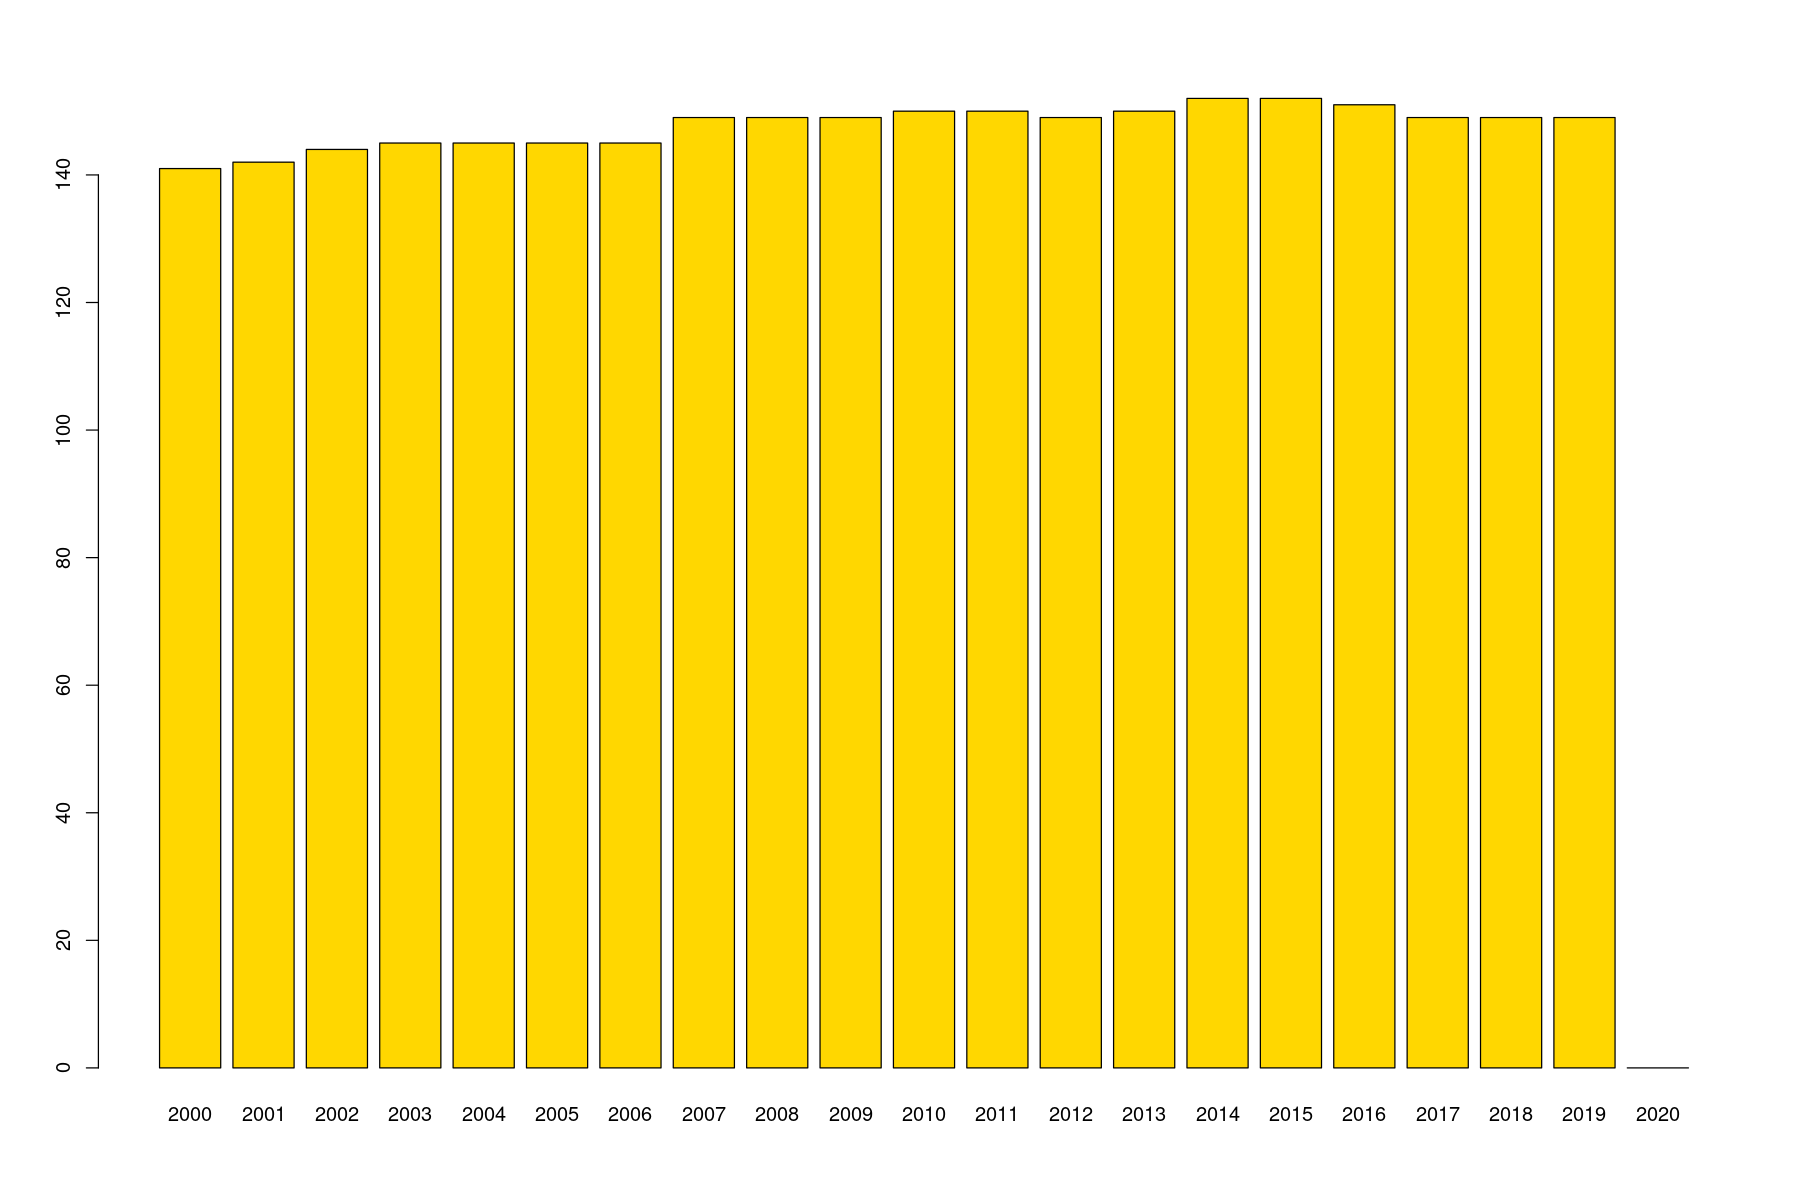

In [180]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

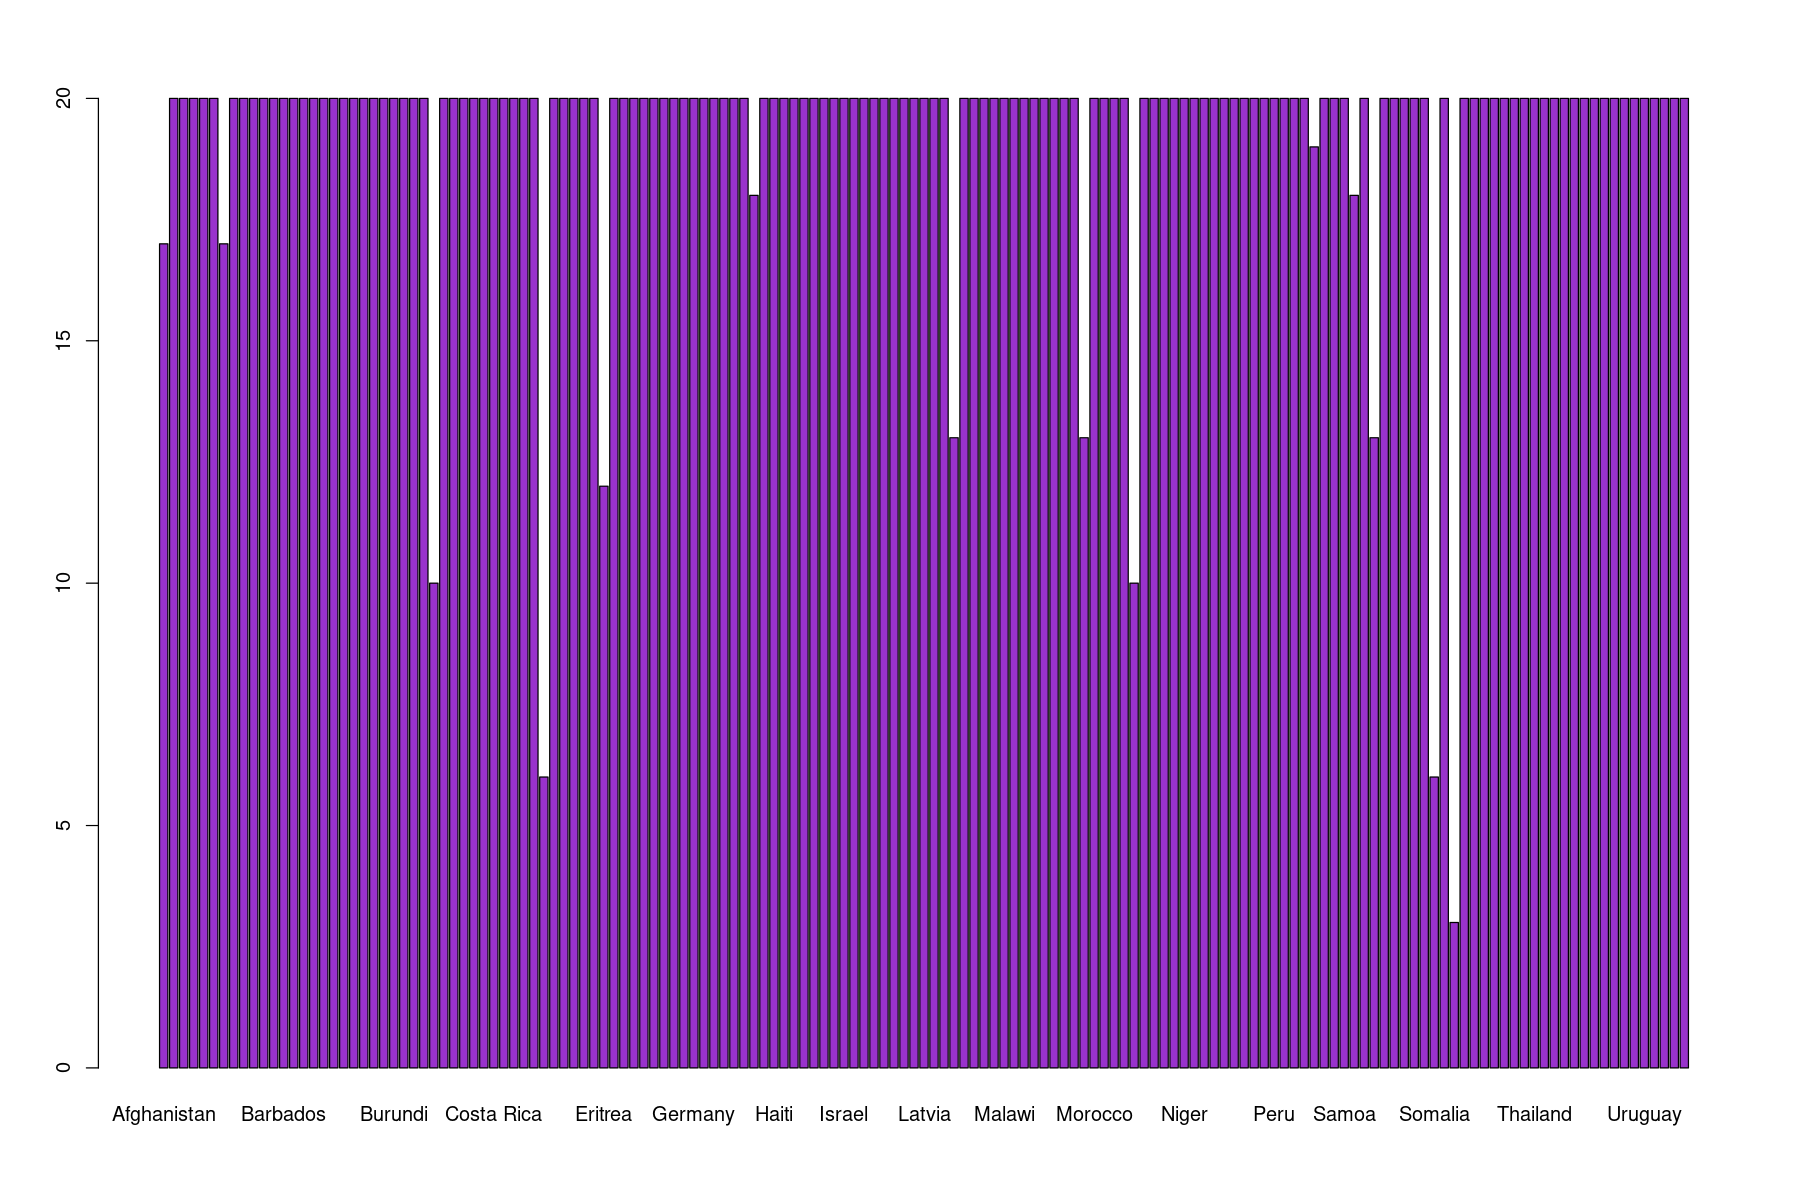

In [181]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


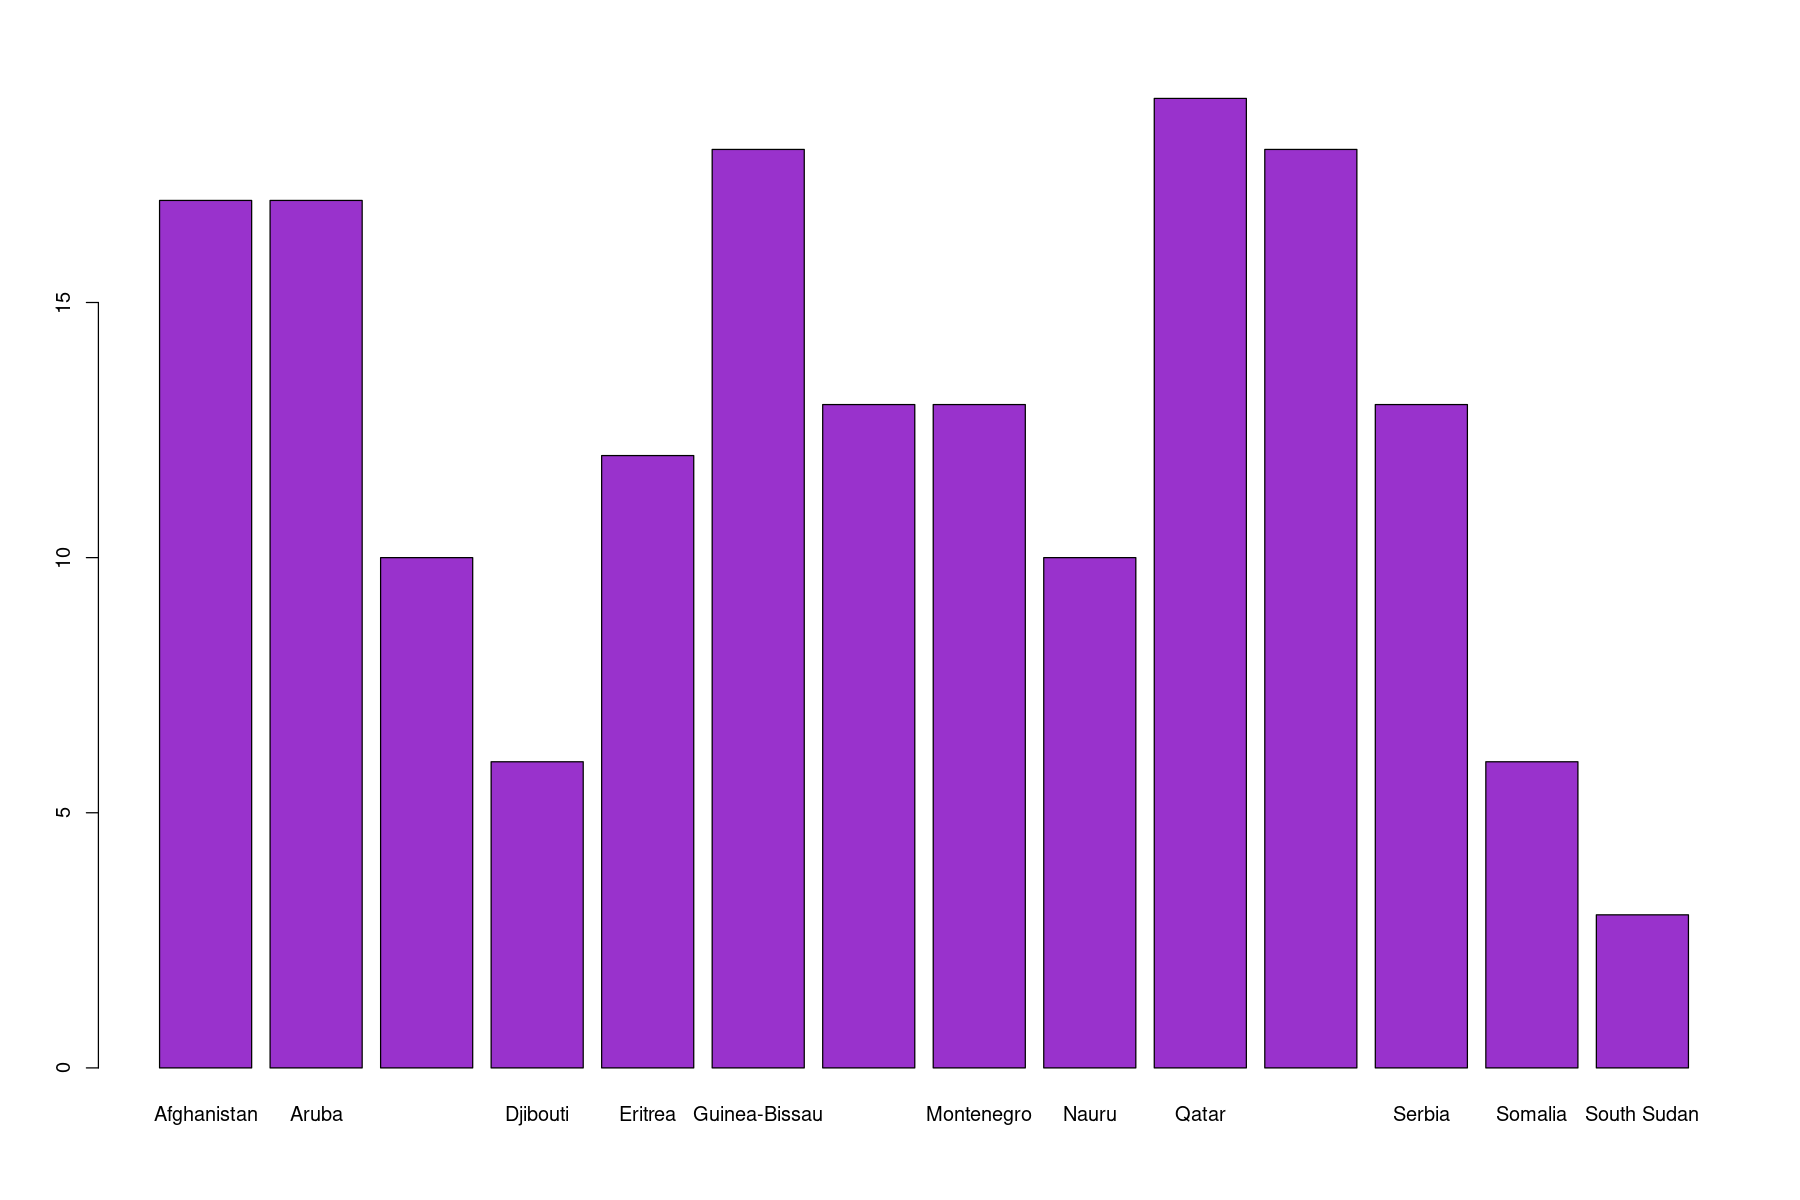

In [182]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [183]:
summary(complete_energy)

    Entity               Year      Access.to.electricity....of.population.
 Length:2955        2014   : 152   Min.   :  1.252                        
 Class :character   2015   : 152   1st Qu.: 55.330                        
 Mode  :character   2016   : 151   Median : 97.309                        
                    2010   : 150   Mean   : 77.148                        
                    2011   : 150   3rd Qu.:100.000                        
                    2013   : 150   Max.   :100.000                        
                    (Other):2050                                          
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   : 0.000                                                  
 1st Qu.: 8.515                                                  
 Median :27.450                                                  
 Mean   :34.909                                                  
 3rd Qu.:59.395                                                  
 Max

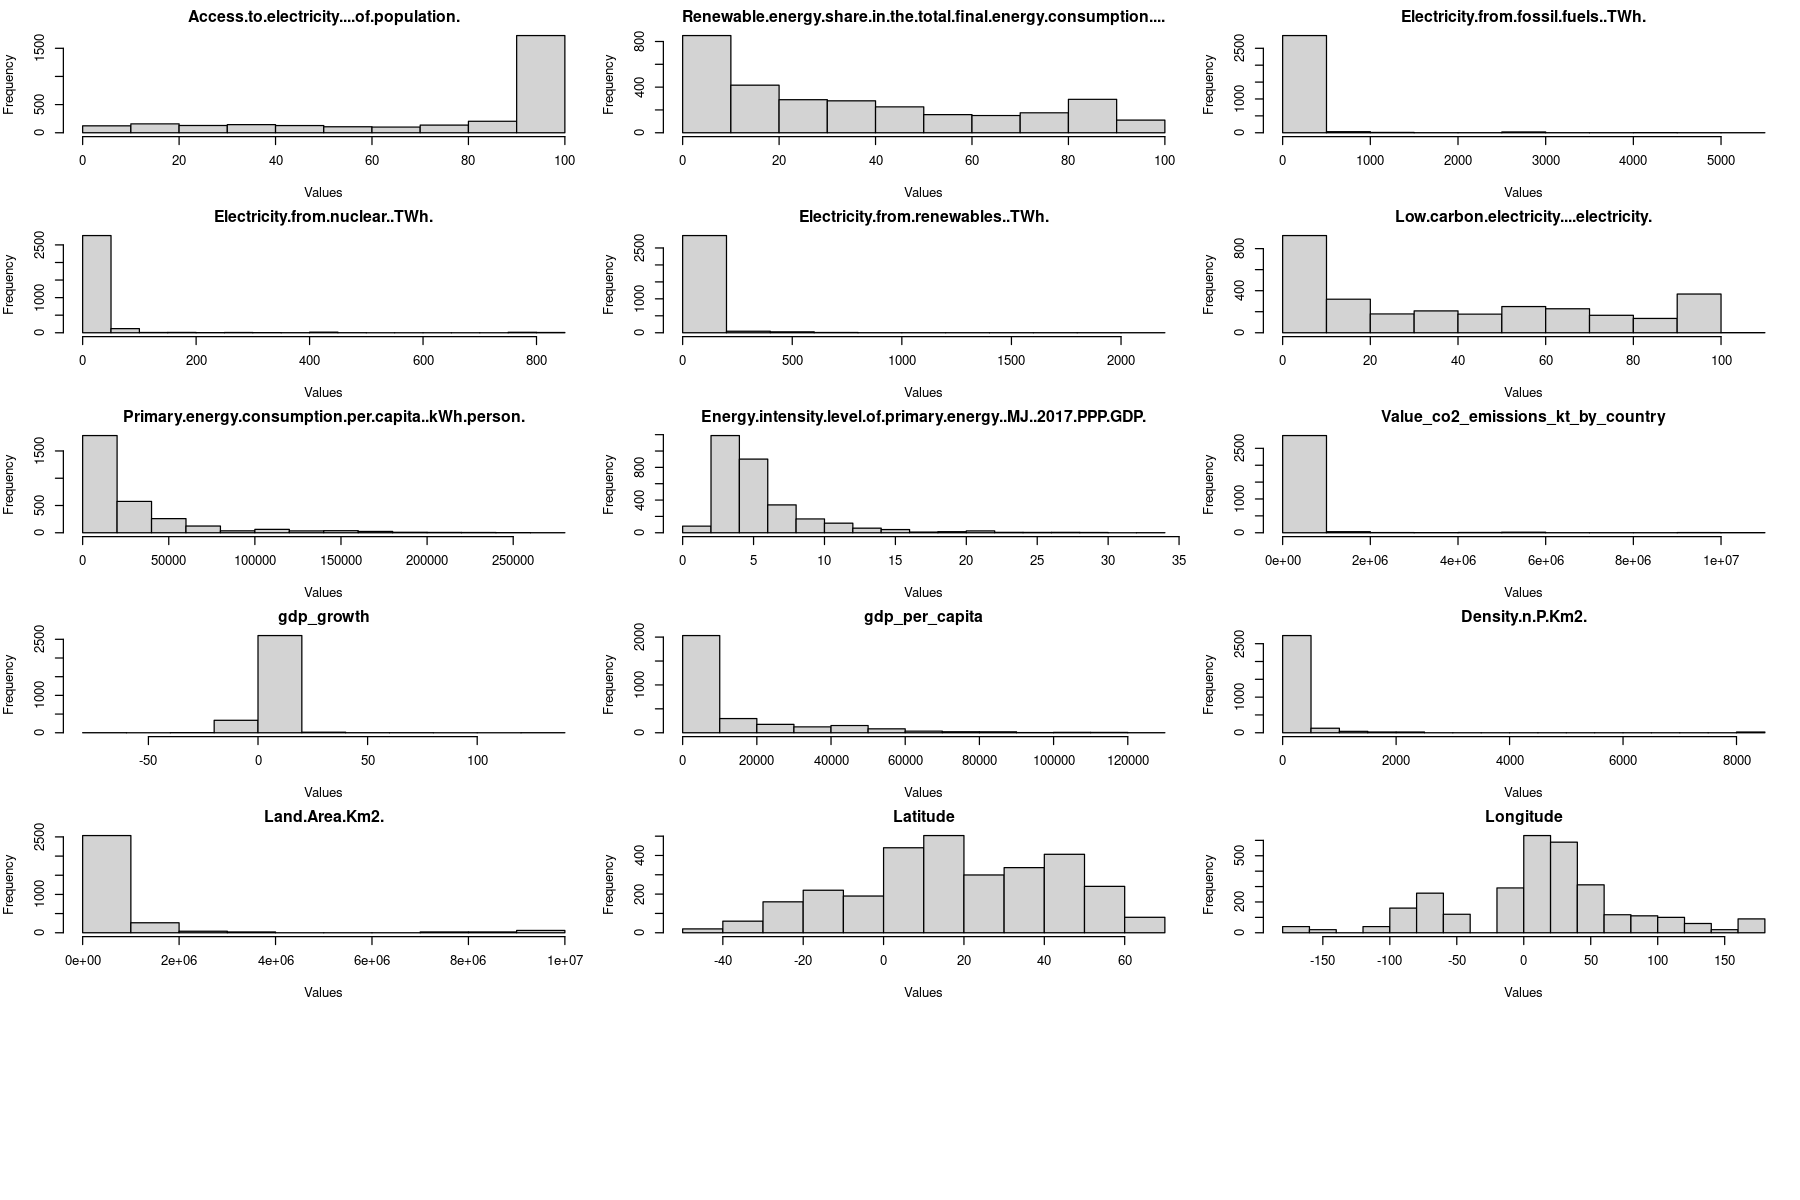

In [184]:
par(mfrow = c(6,3) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

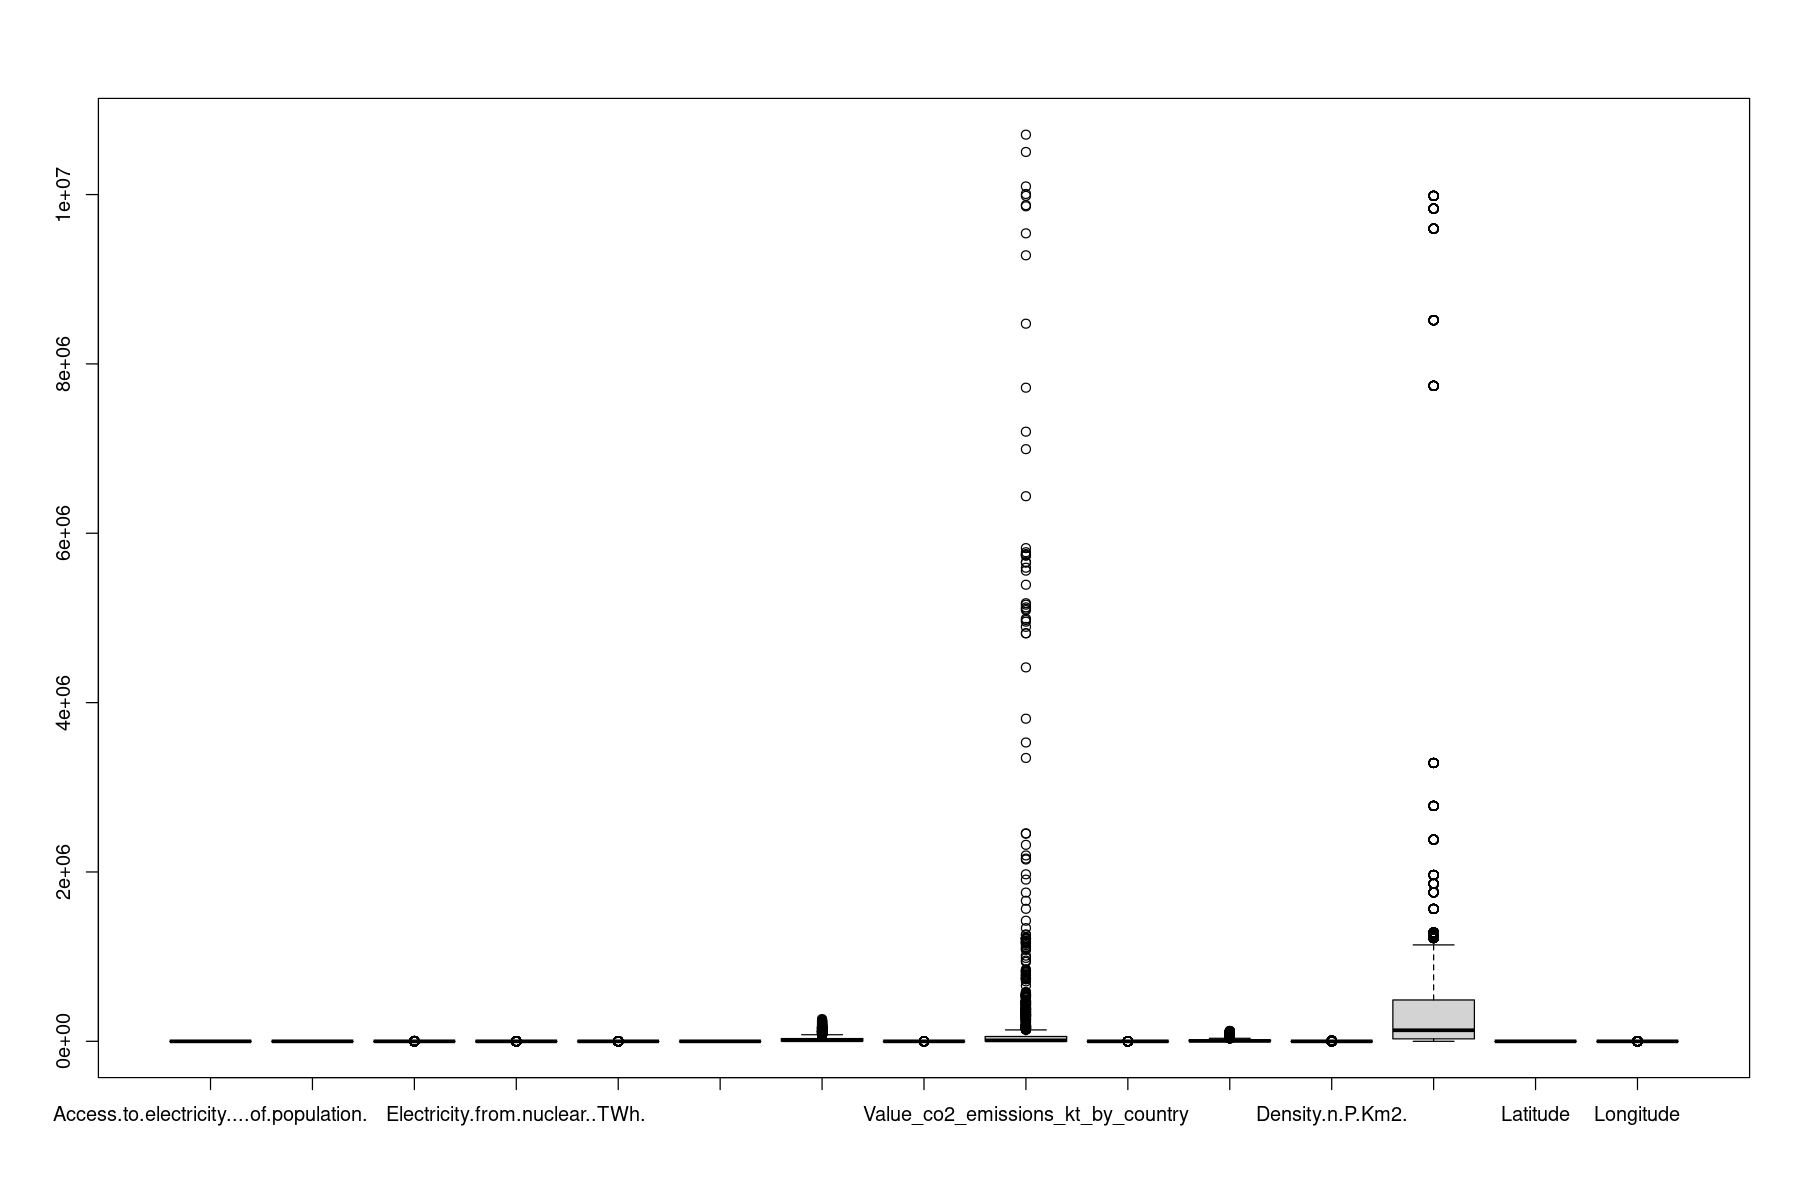

In [185]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

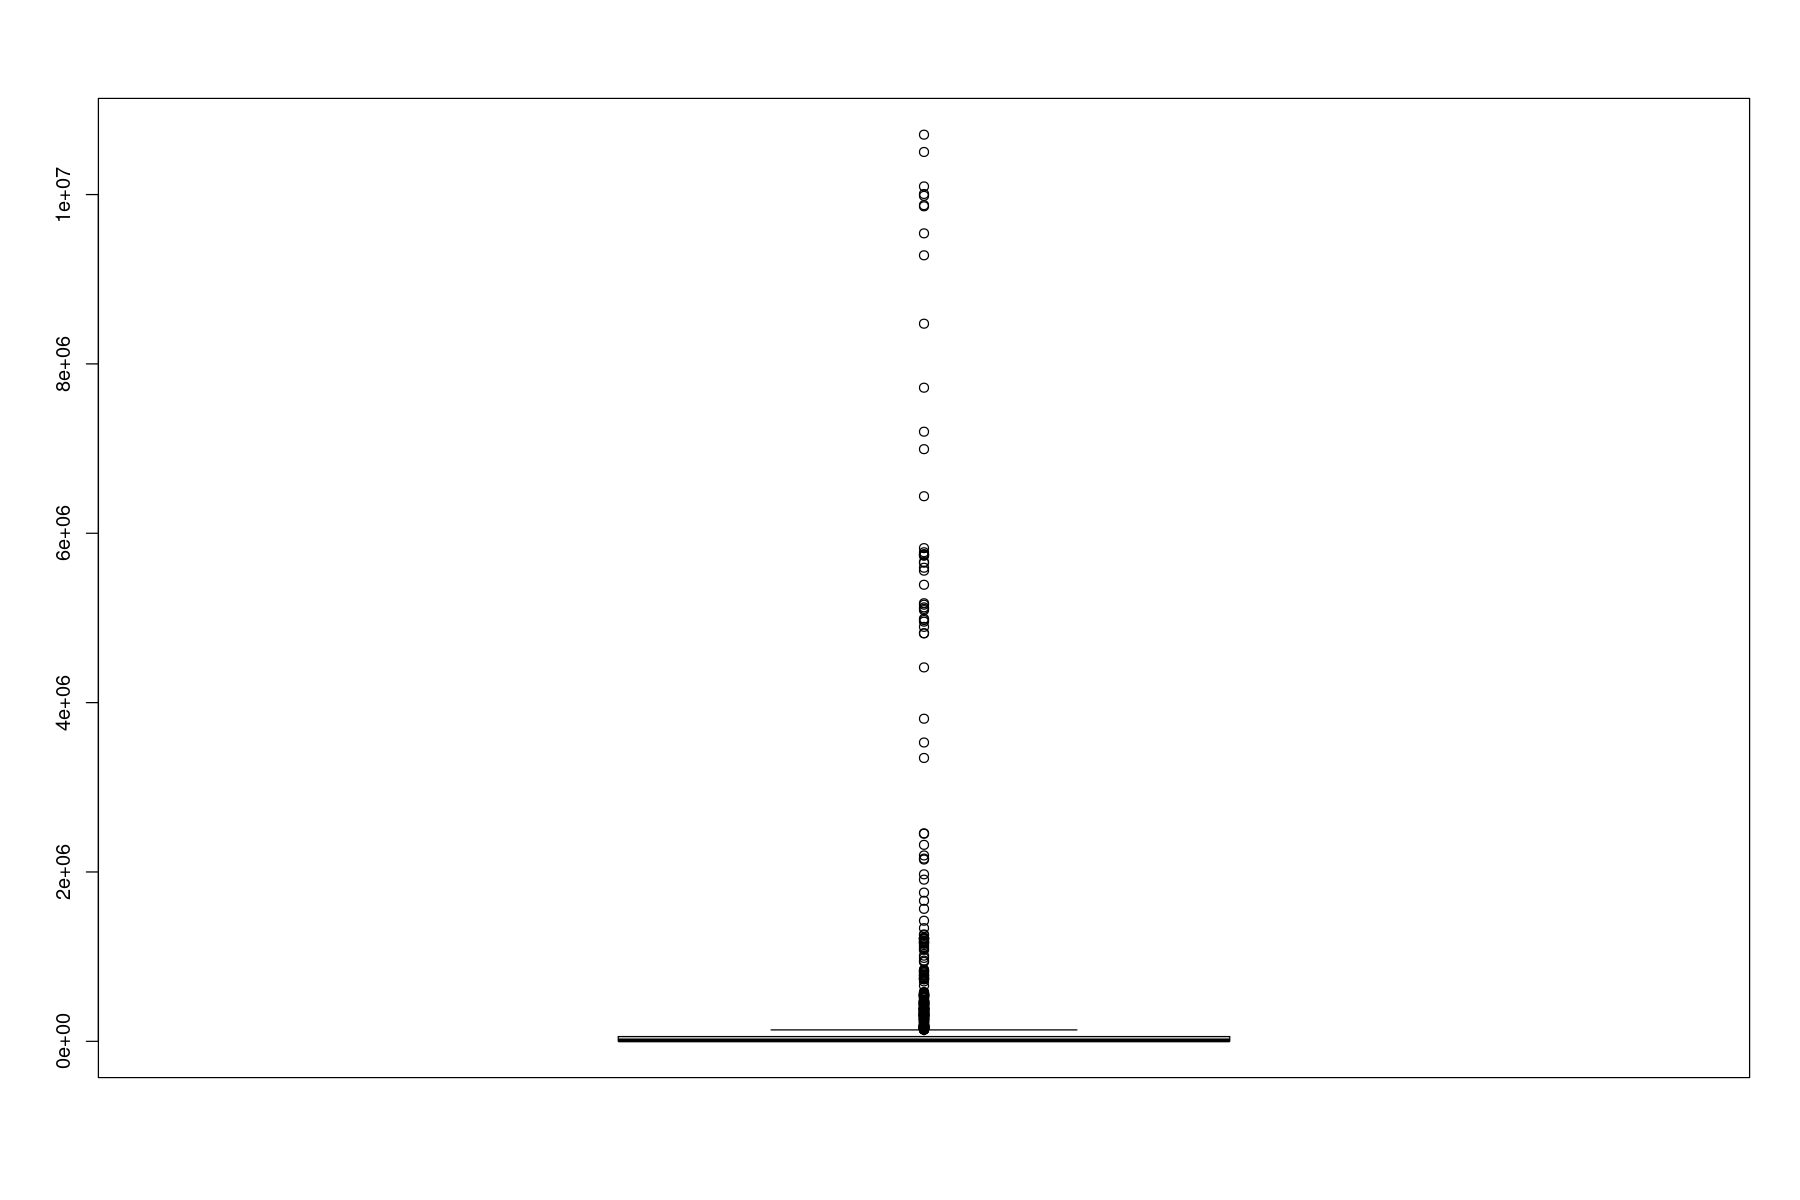

In [186]:
boxplot(df$Value_co2_emissions_kt_by_country)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

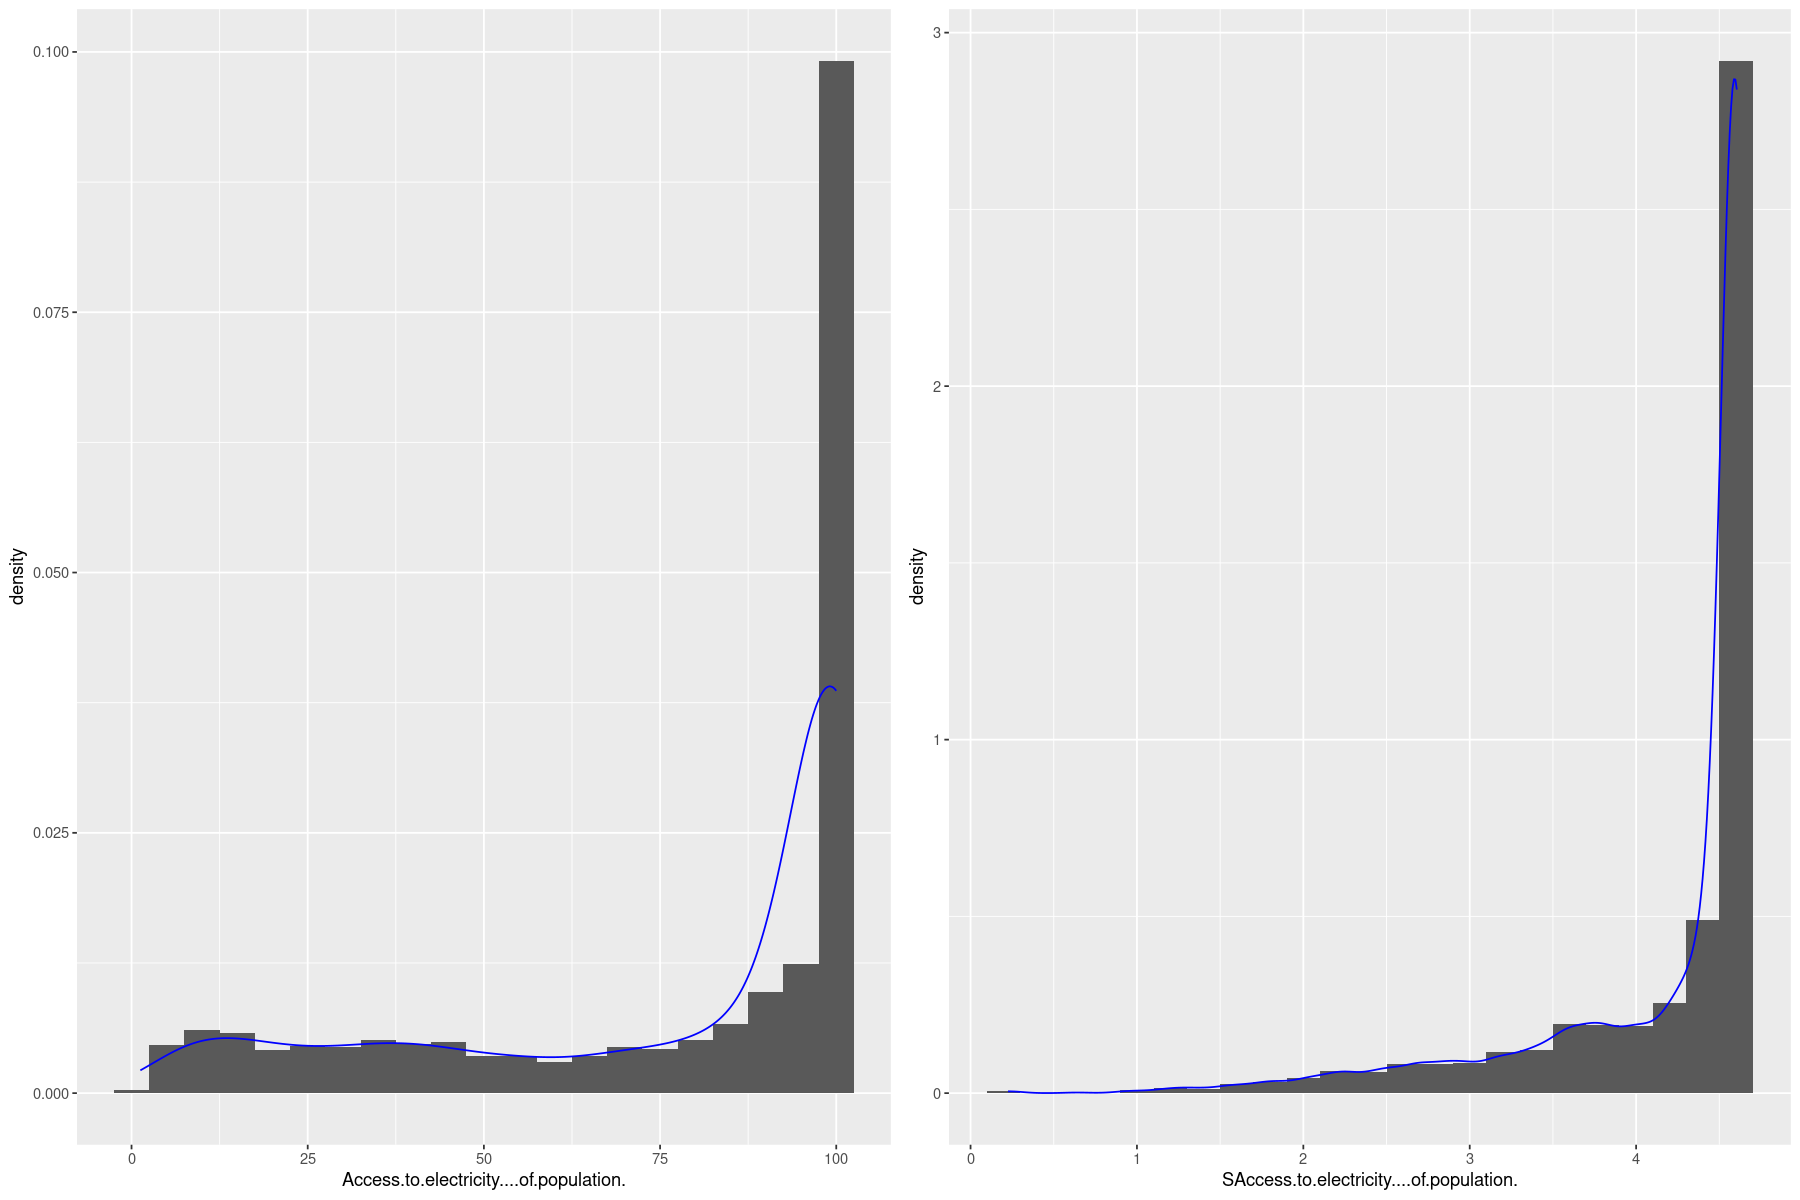

In [187]:
complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

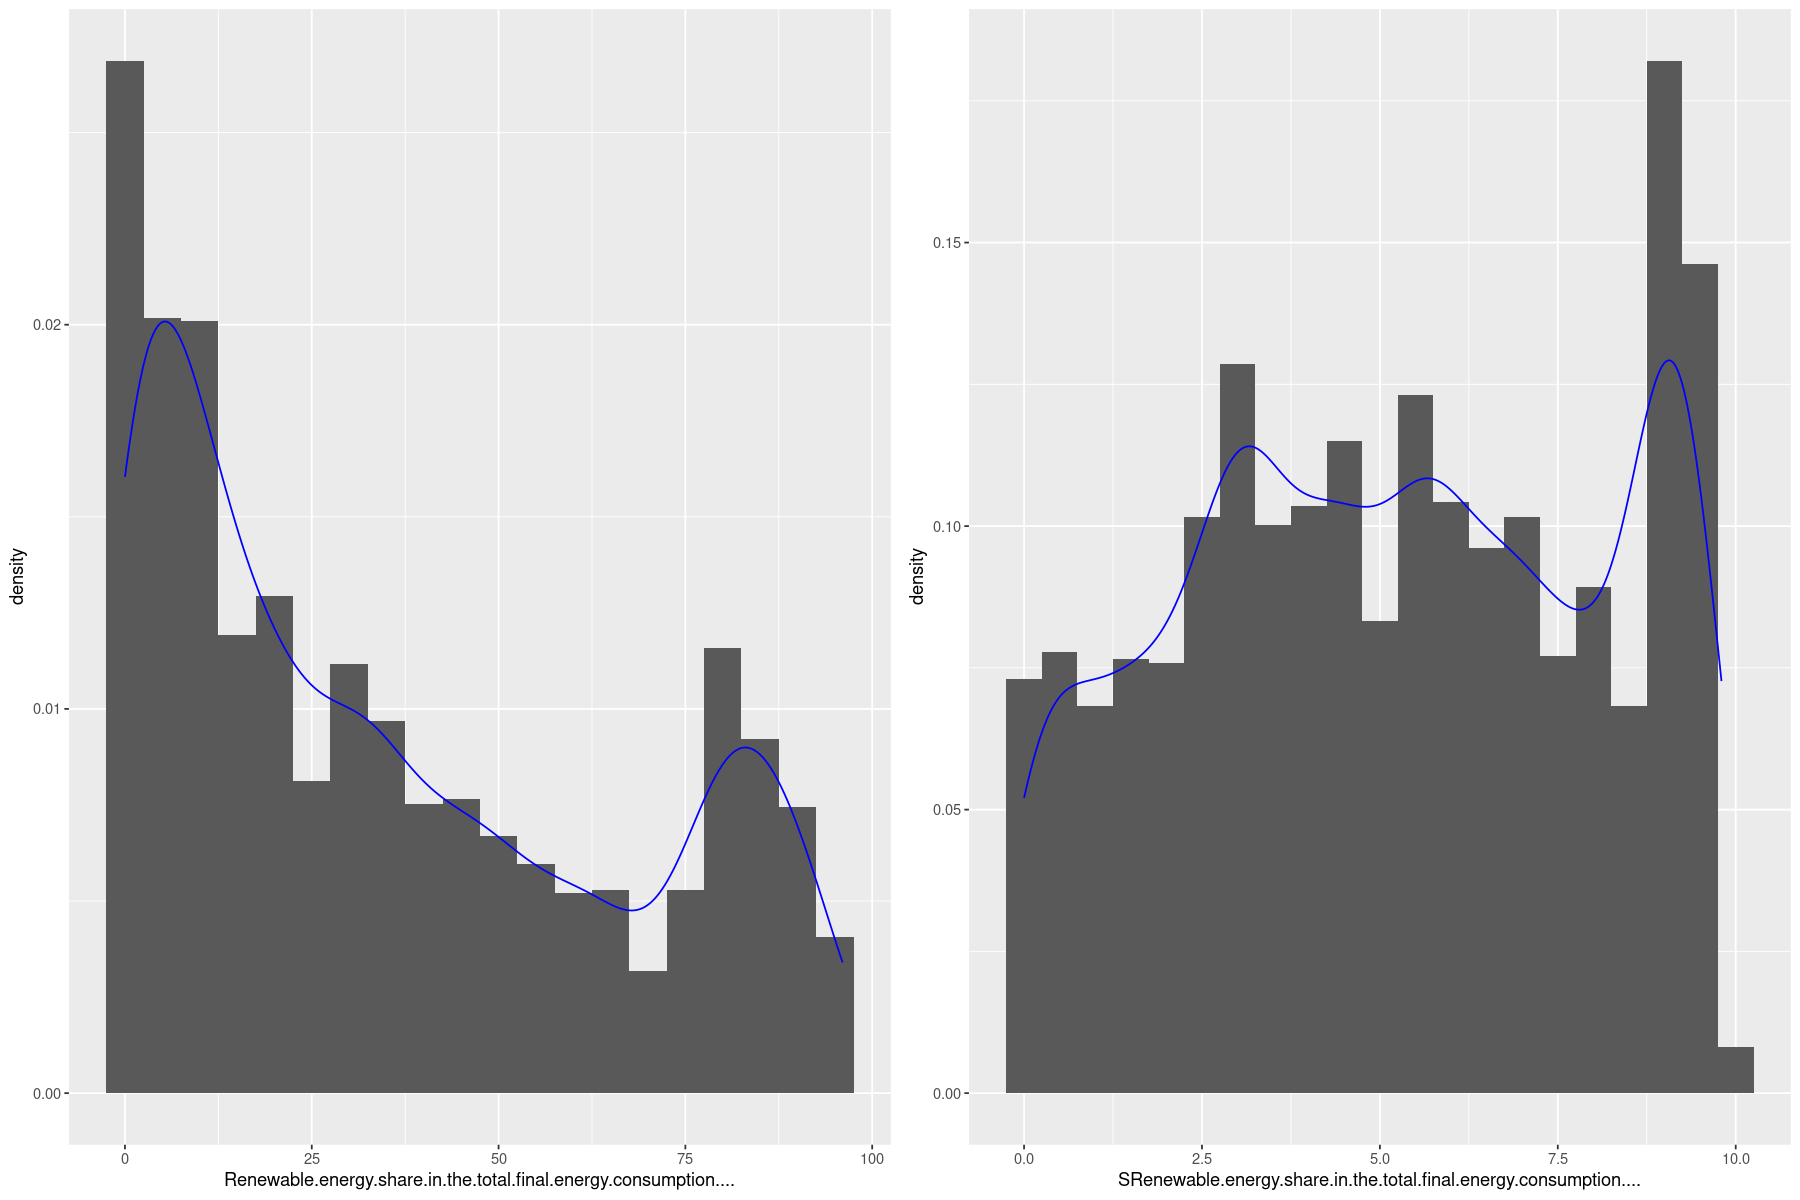

In [189]:
complete_energy[, "SRenewable.energy.share.in.the.total.final.energy.consumption...."] = sqrt(complete_energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])

g1 = ggplot(complete_energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable.energy.share.in.the.total.final.energy.consumption....))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

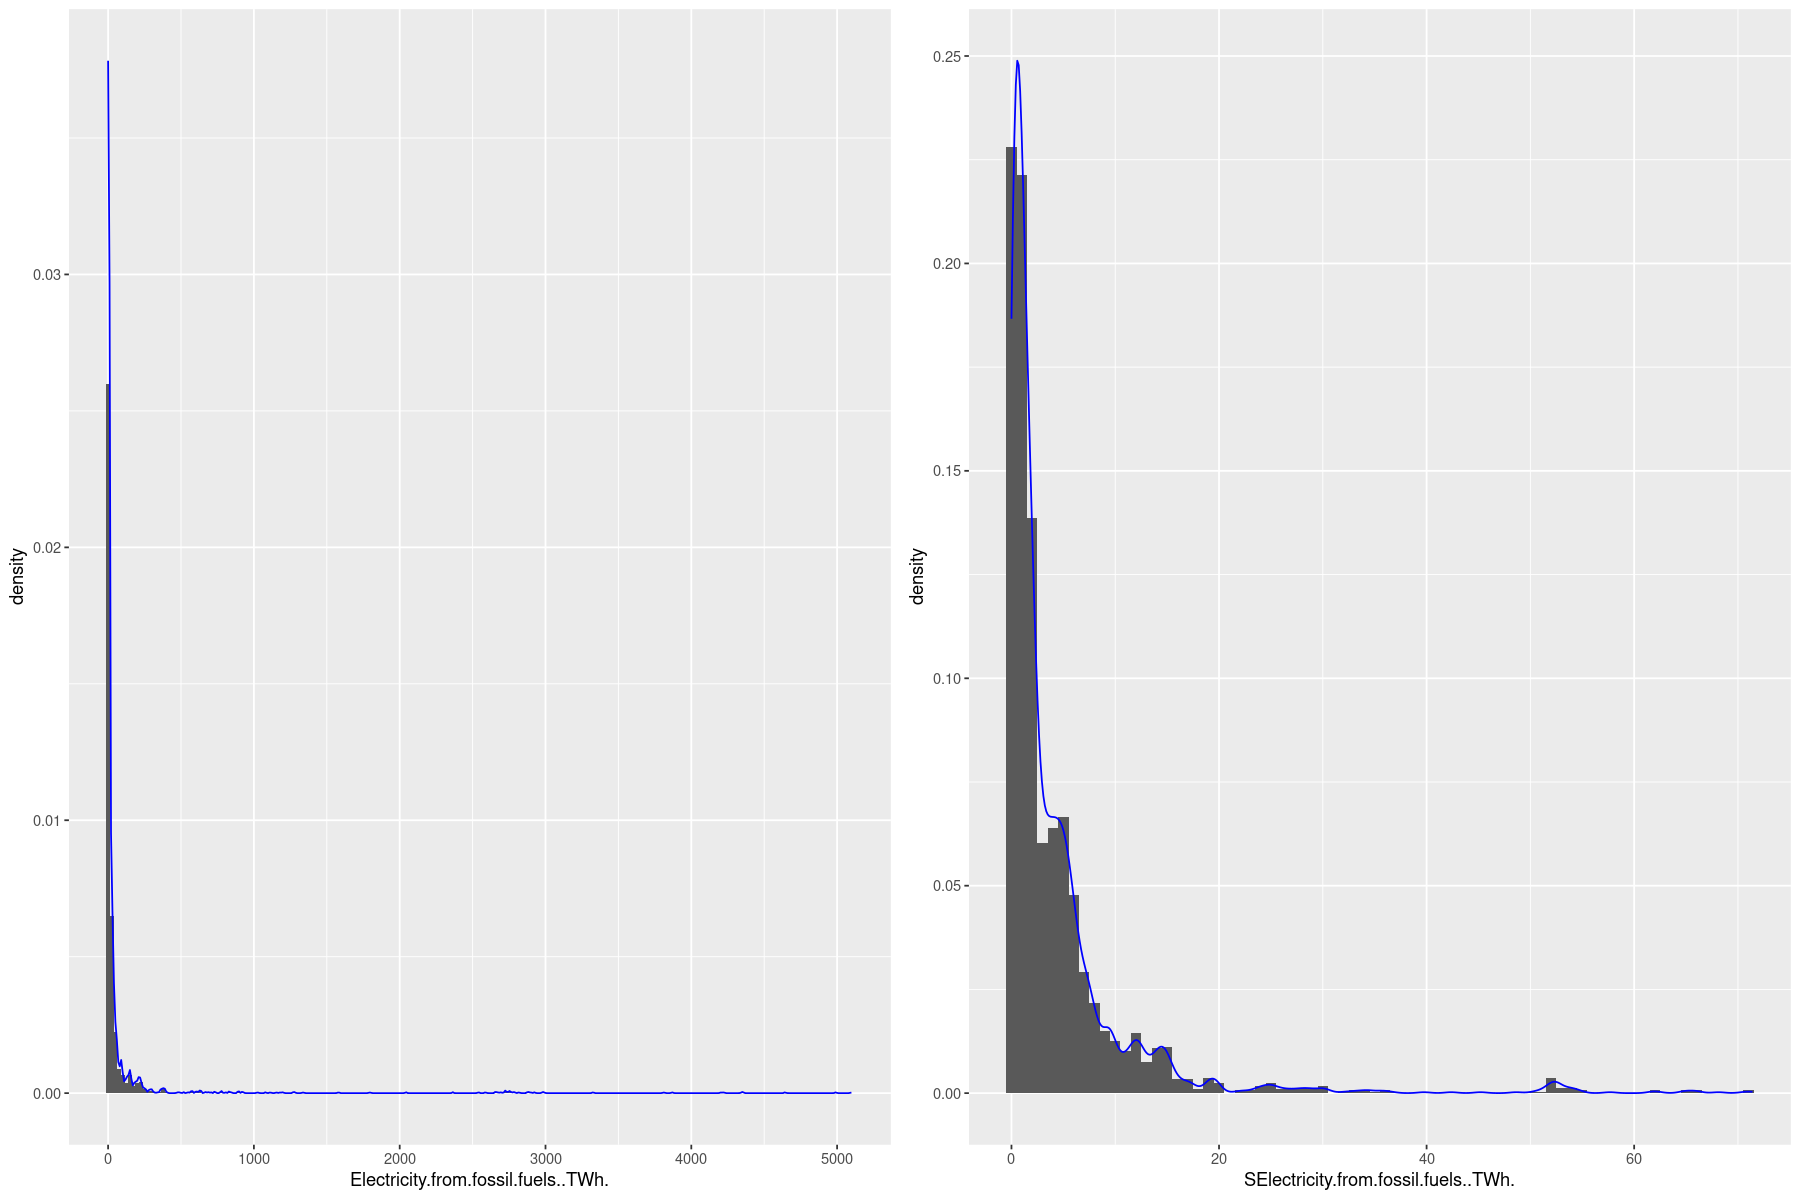

In [190]:
complete_energy[, "SElectricity.from.fossil.fuels..TWh."] = sqrt(complete_energy[, "Electricity.from.fossil.fuels..TWh."])

g1 = ggplot(complete_energy,aes(x=Electricity.from.fossil.fuels..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElectricity.from.fossil.fuels..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

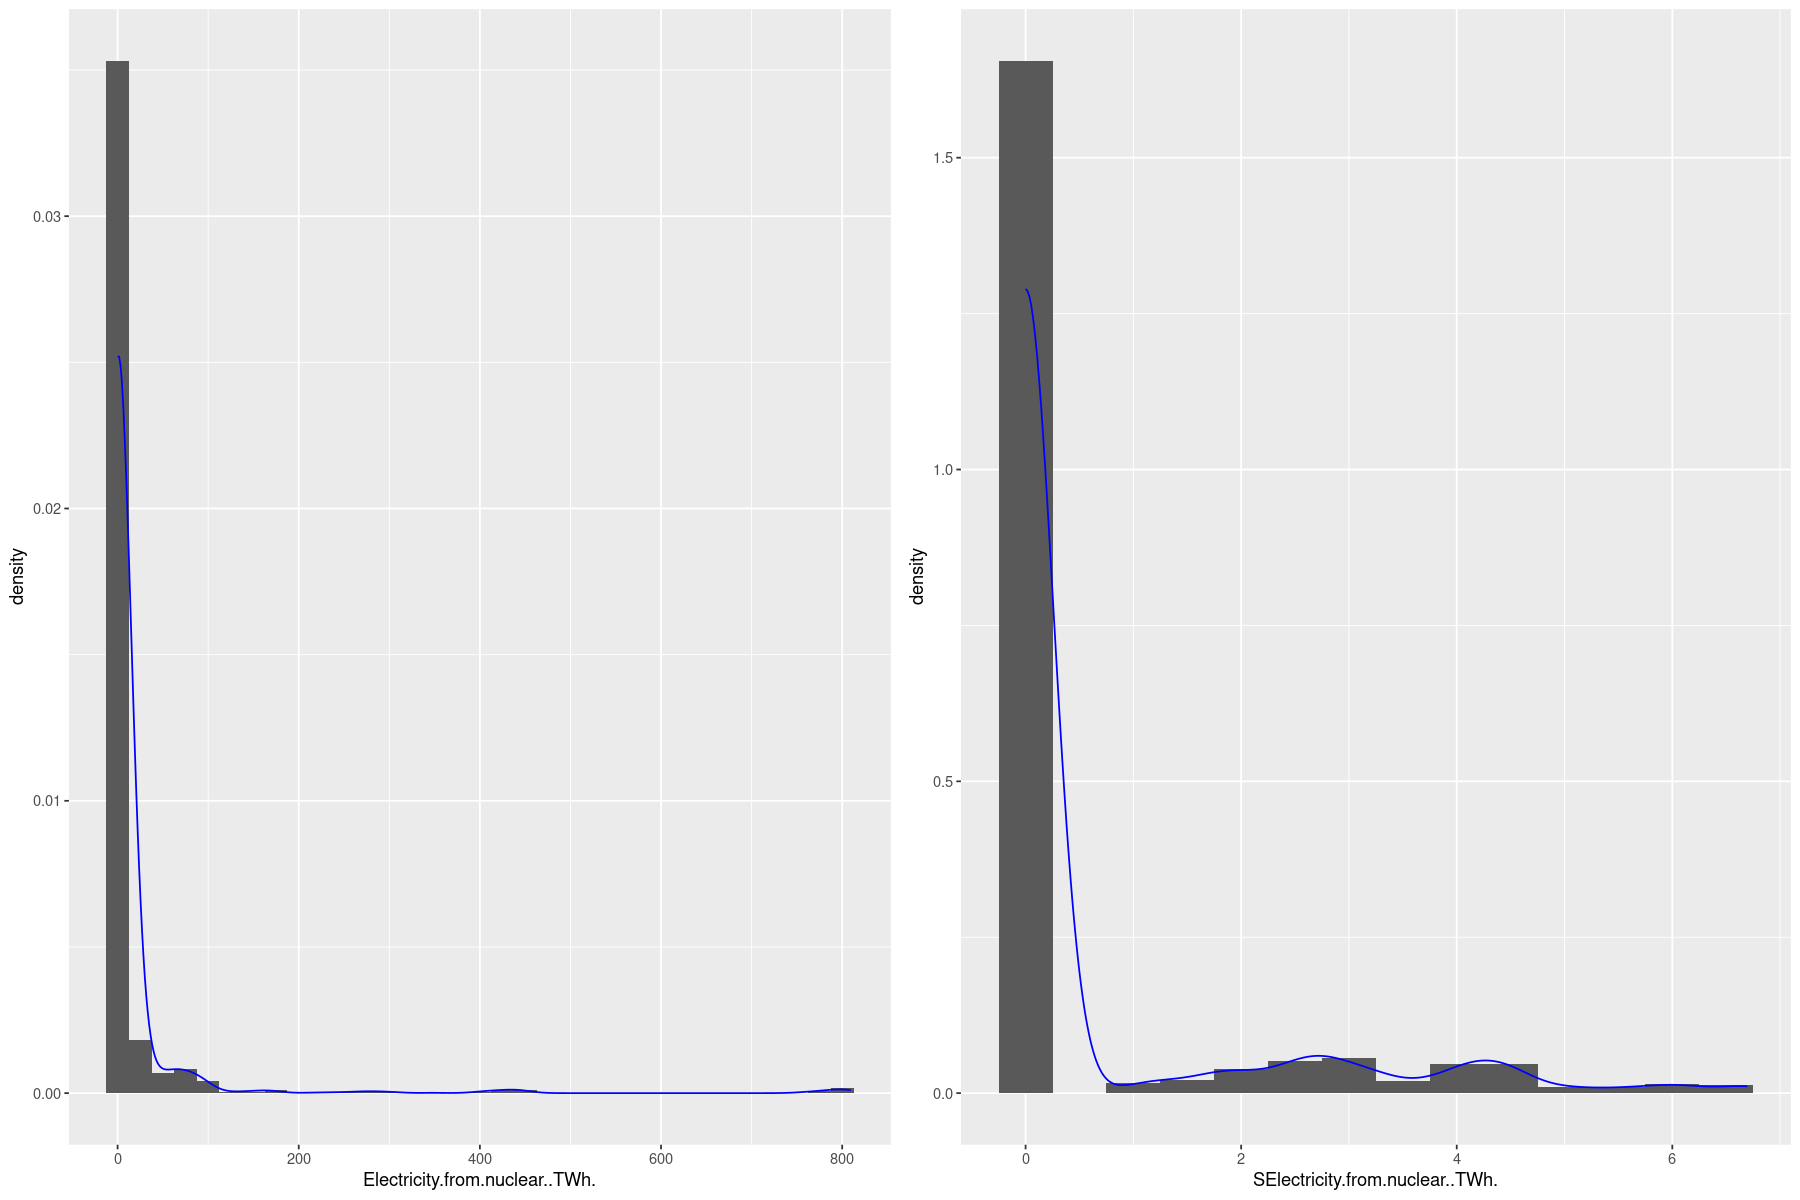

In [191]:
complete_energy[, "SElectricity.from.nuclear..TWh."] = log(1+complete_energy[, "Electricity.from.nuclear..TWh."])

g1 = ggplot(complete_energy,aes(x=Electricity.from.nuclear..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElectricity.from.nuclear..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

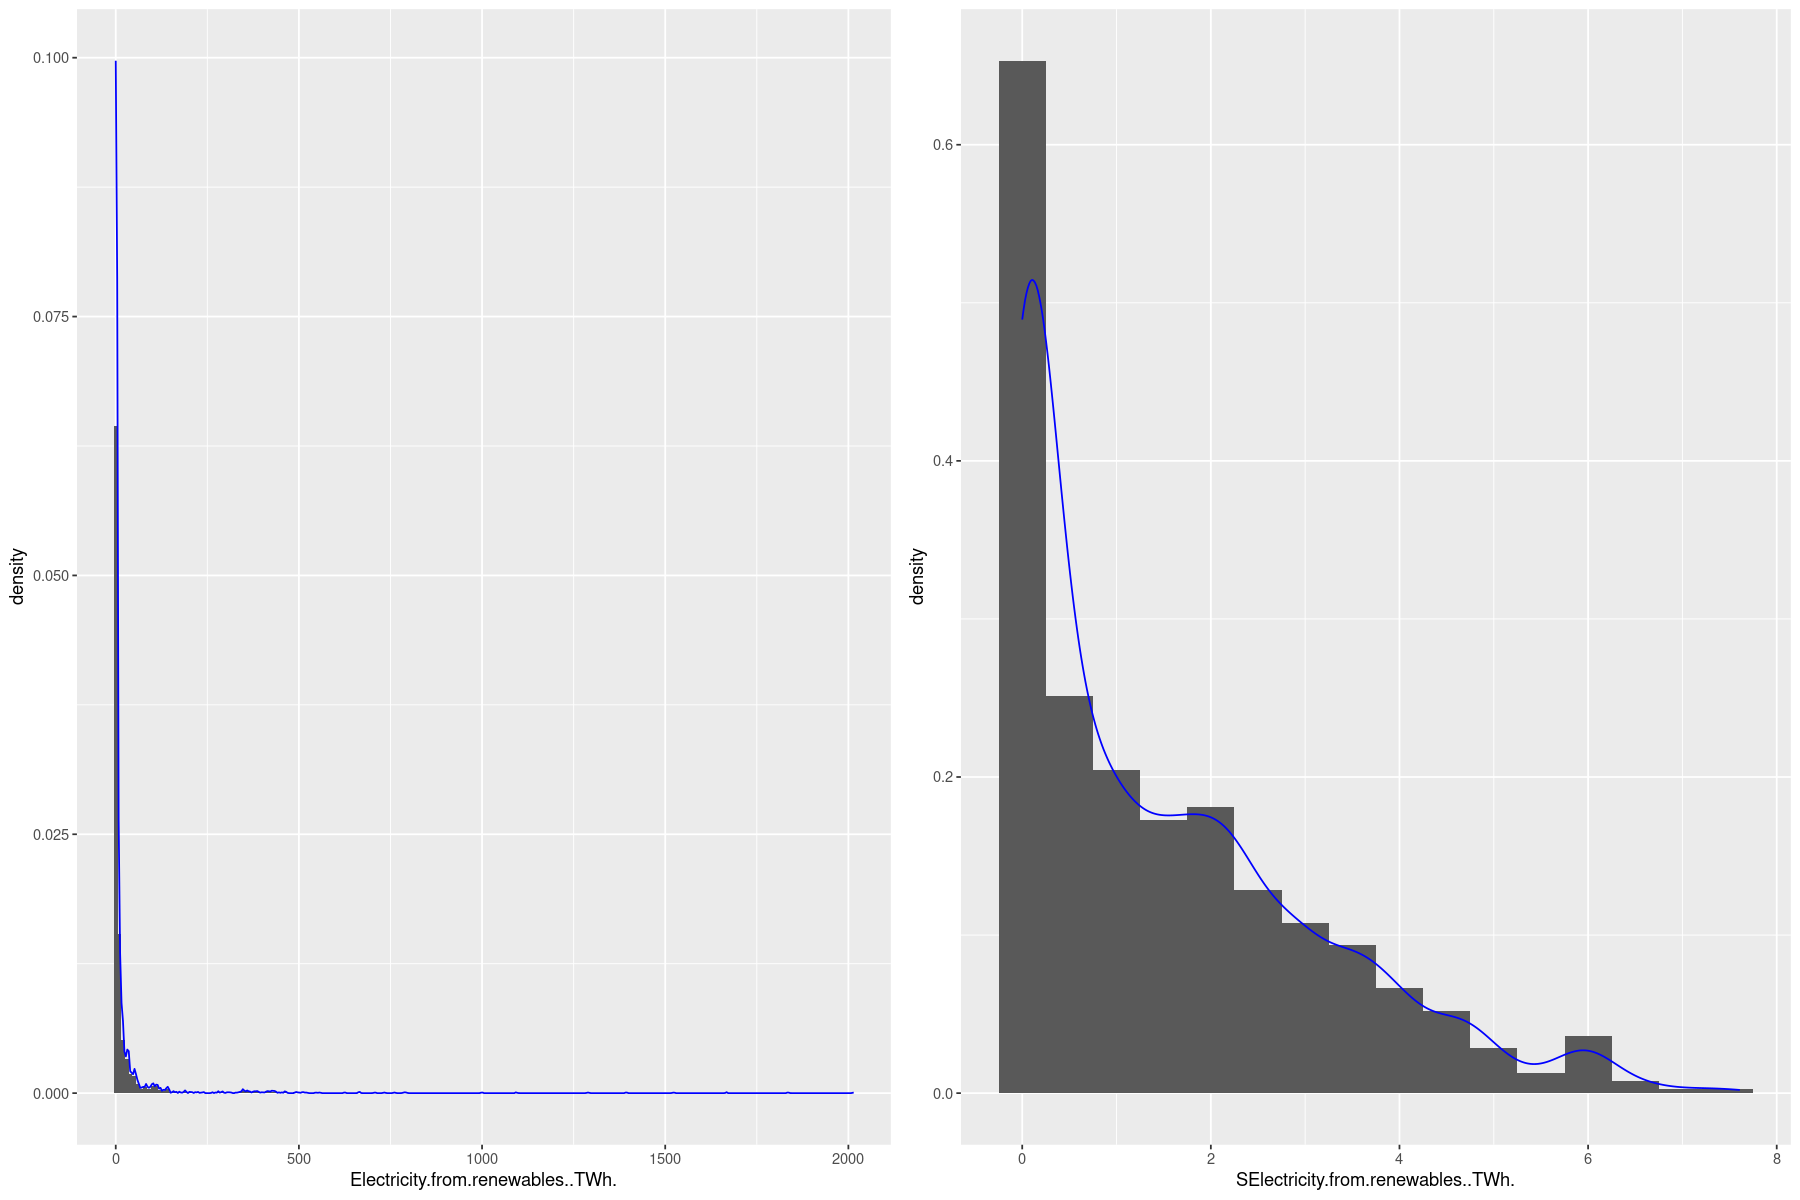

In [192]:
complete_energy[, "SElectricity.from.renewables..TWh."] = log(1+complete_energy[, "Electricity.from.renewables..TWh."])

g1 = ggplot(complete_energy,aes(x=Electricity.from.renewables..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElectricity.from.renewables..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

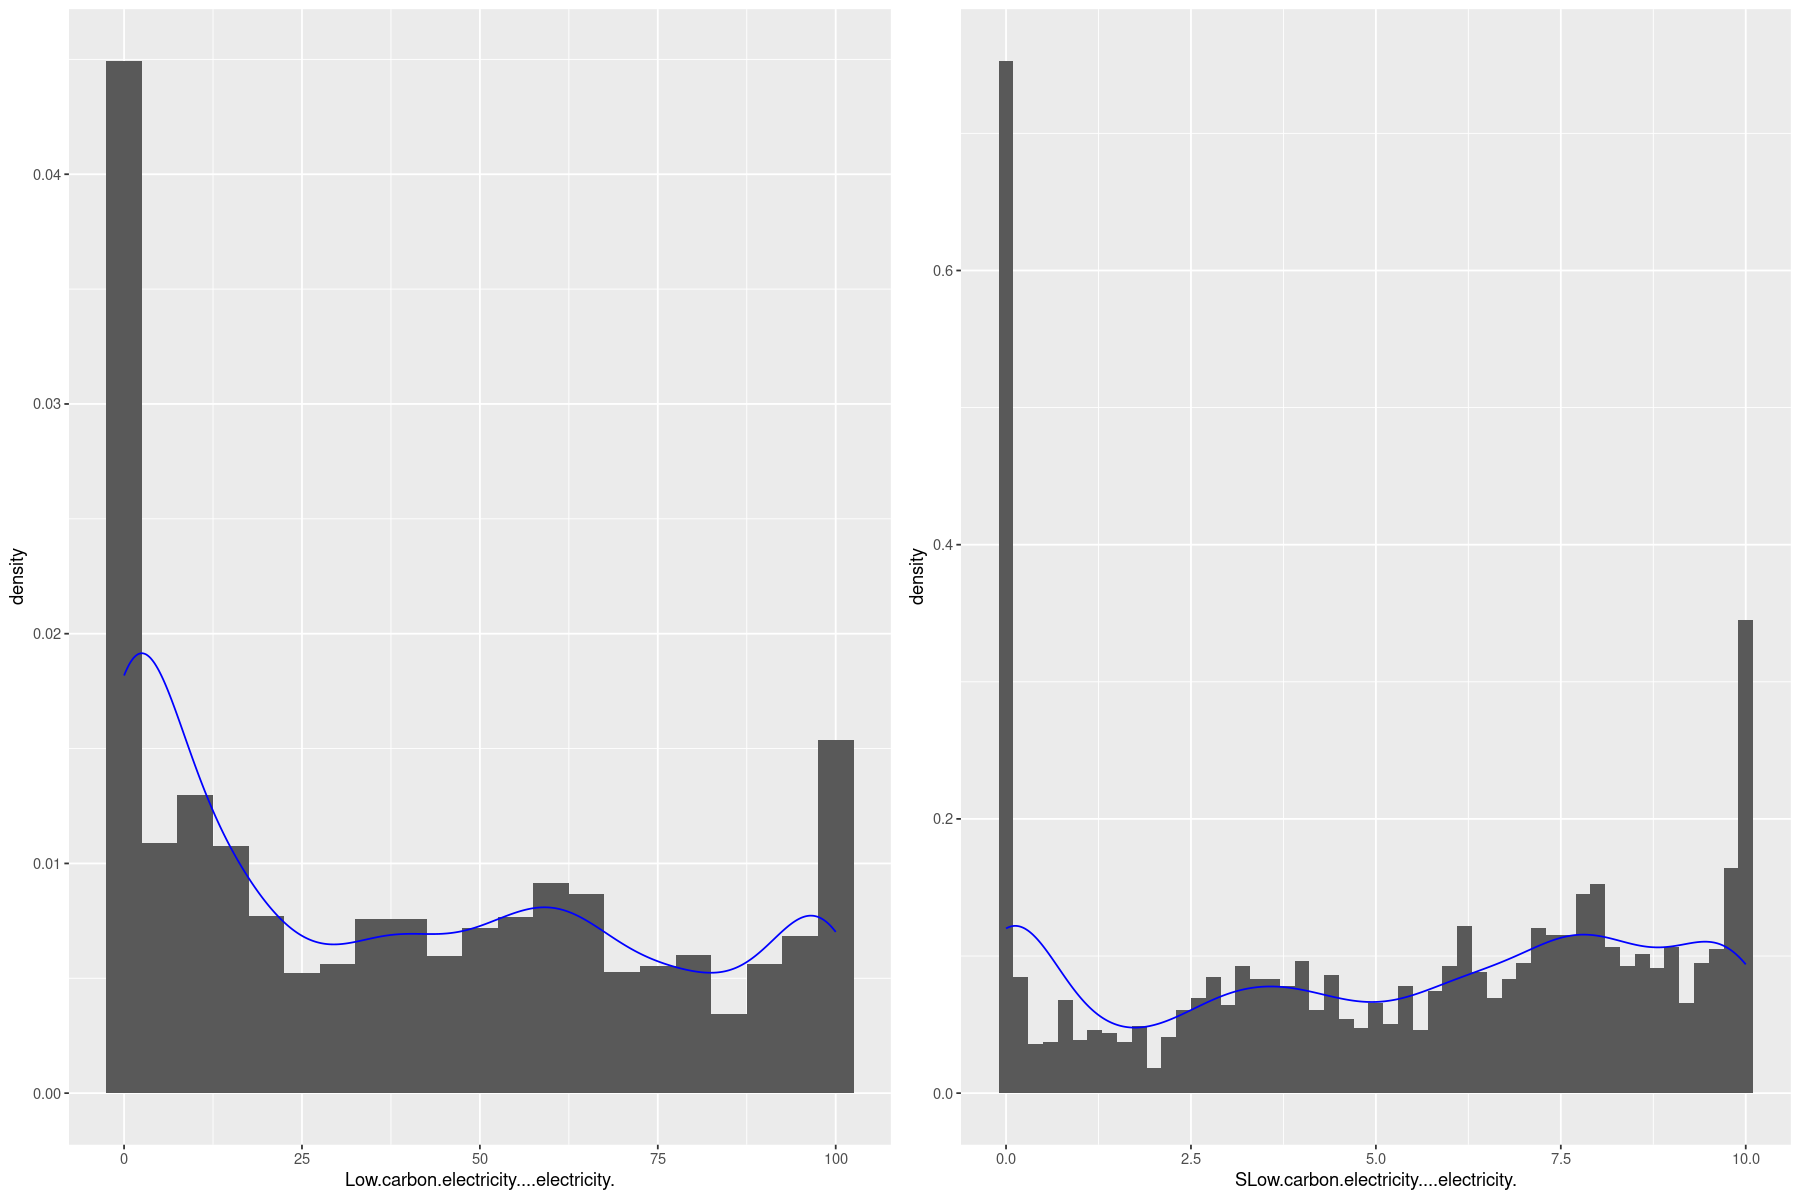

In [193]:
complete_energy[, "SLow.carbon.electricity....electricity."] = sqrt(complete_energy[, "Low.carbon.electricity....electricity."])

g1 = ggplot(complete_energy,aes(x=Low.carbon.electricity....electricity.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow.carbon.electricity....electricity.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

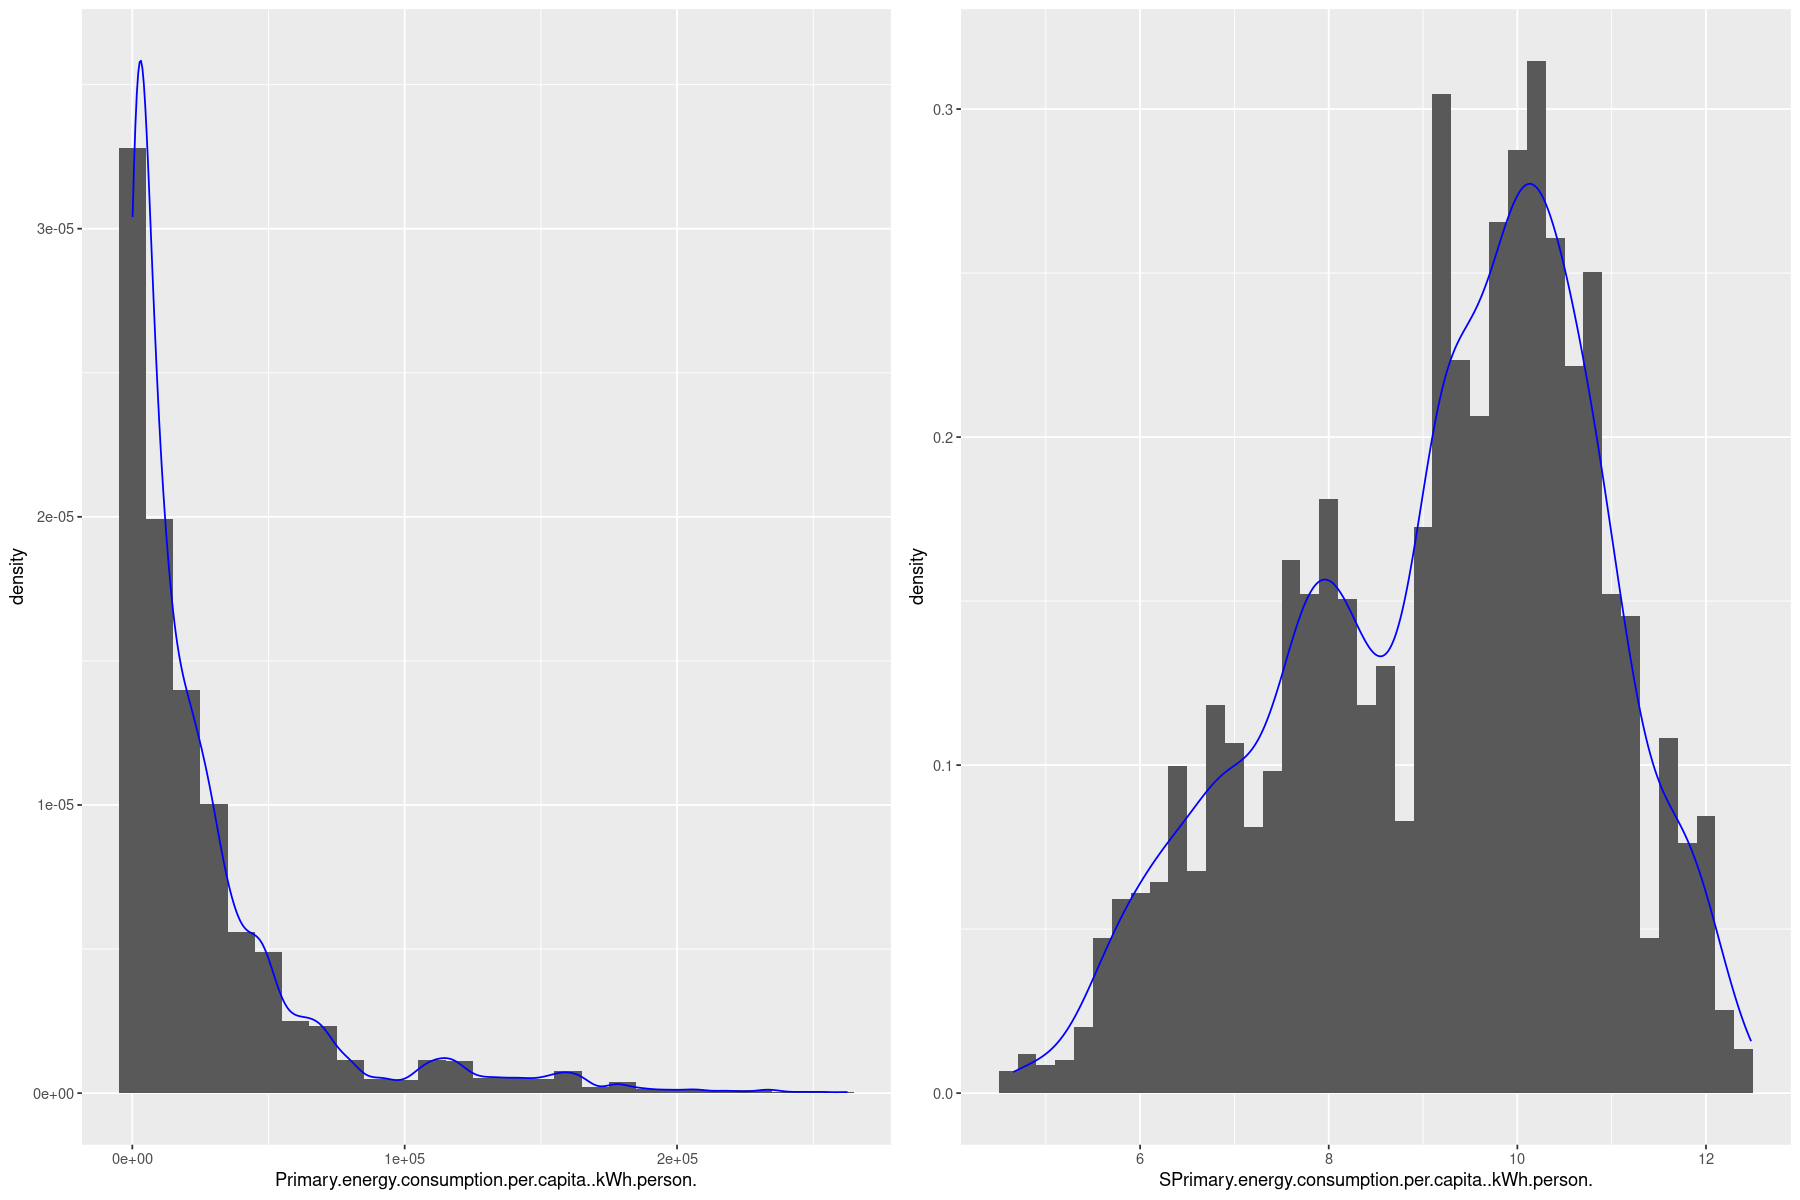

In [194]:
complete_energy[, "SPrimary.energy.consumption.per.capita..kWh.person."] = log(complete_energy[, "Primary.energy.consumption.per.capita..kWh.person."])

g1 = ggplot(complete_energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary.energy.consumption.per.capita..kWh.person.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

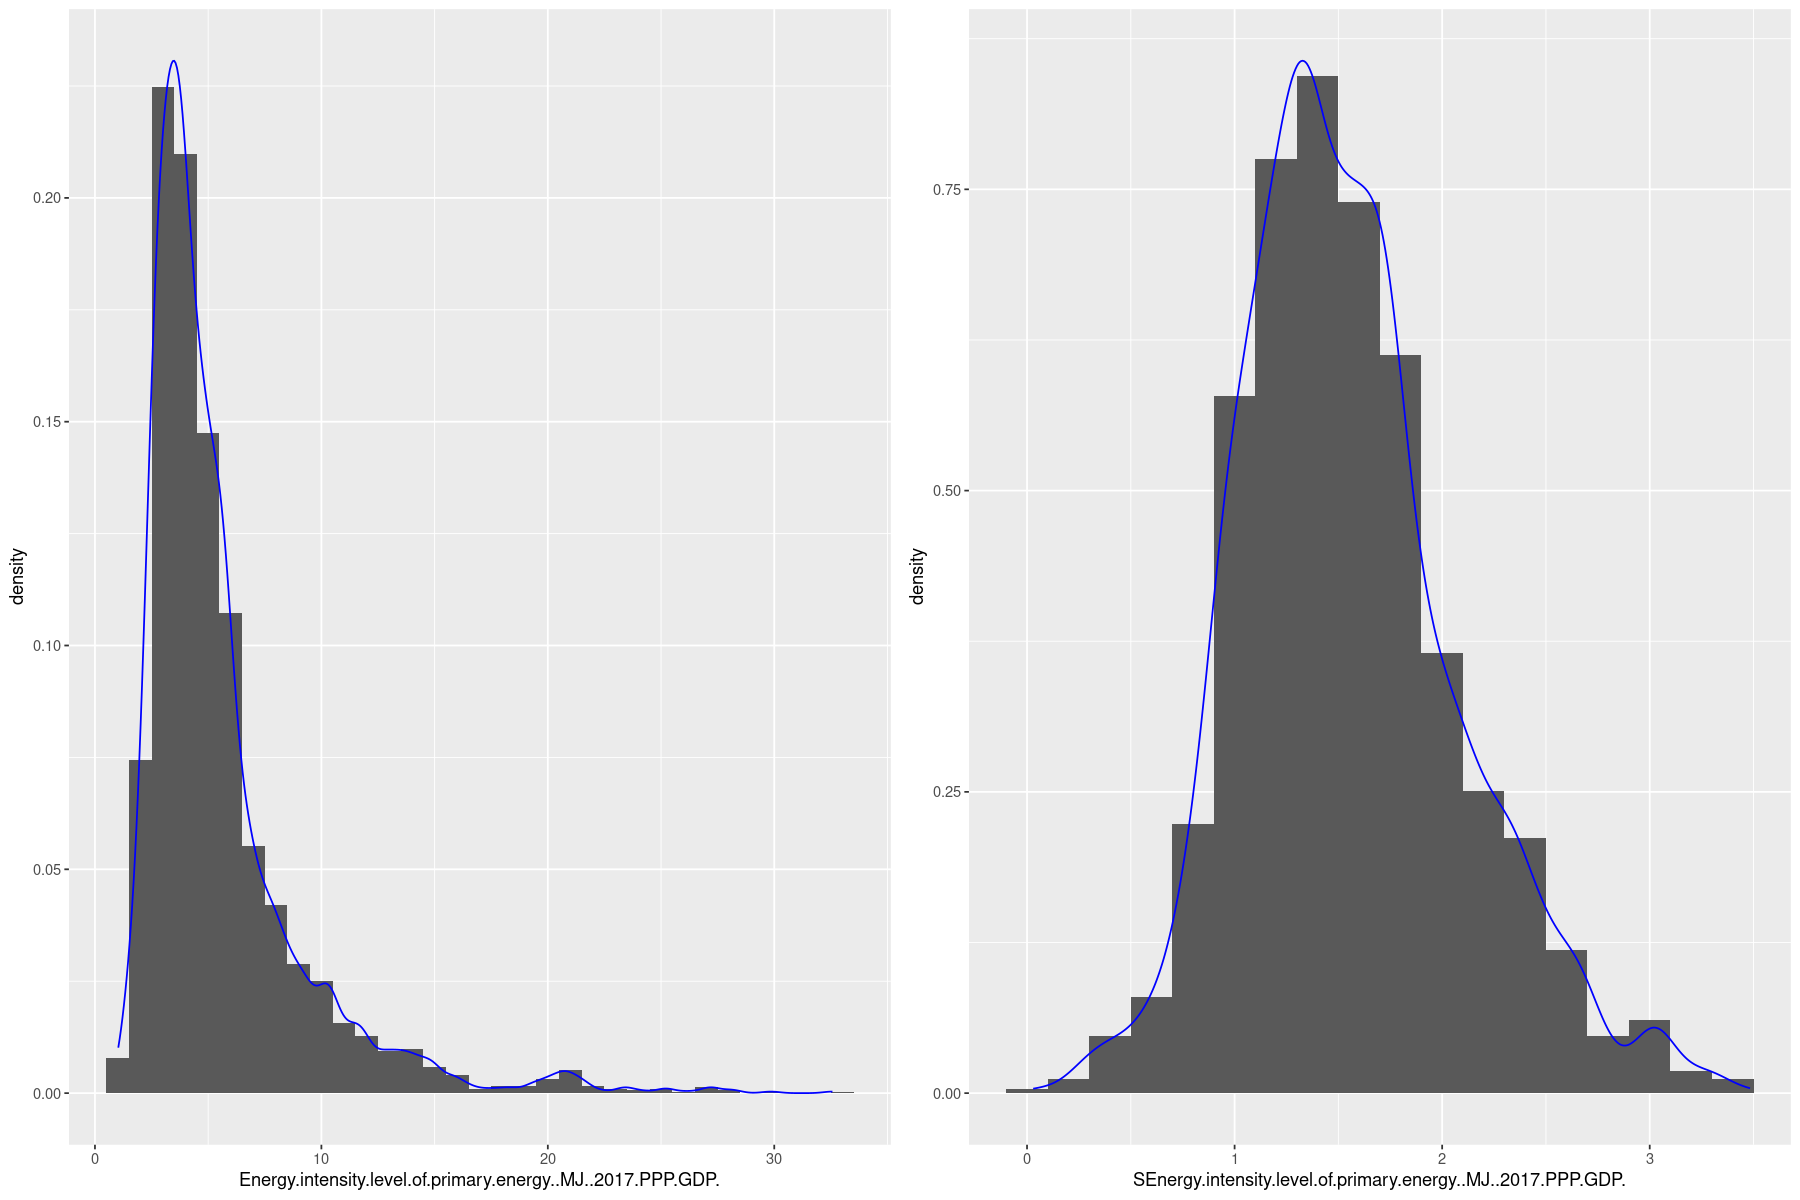

In [195]:
complete_energy[, "SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."] = log(complete_energy[, "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."])

g1 = ggplot(complete_energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

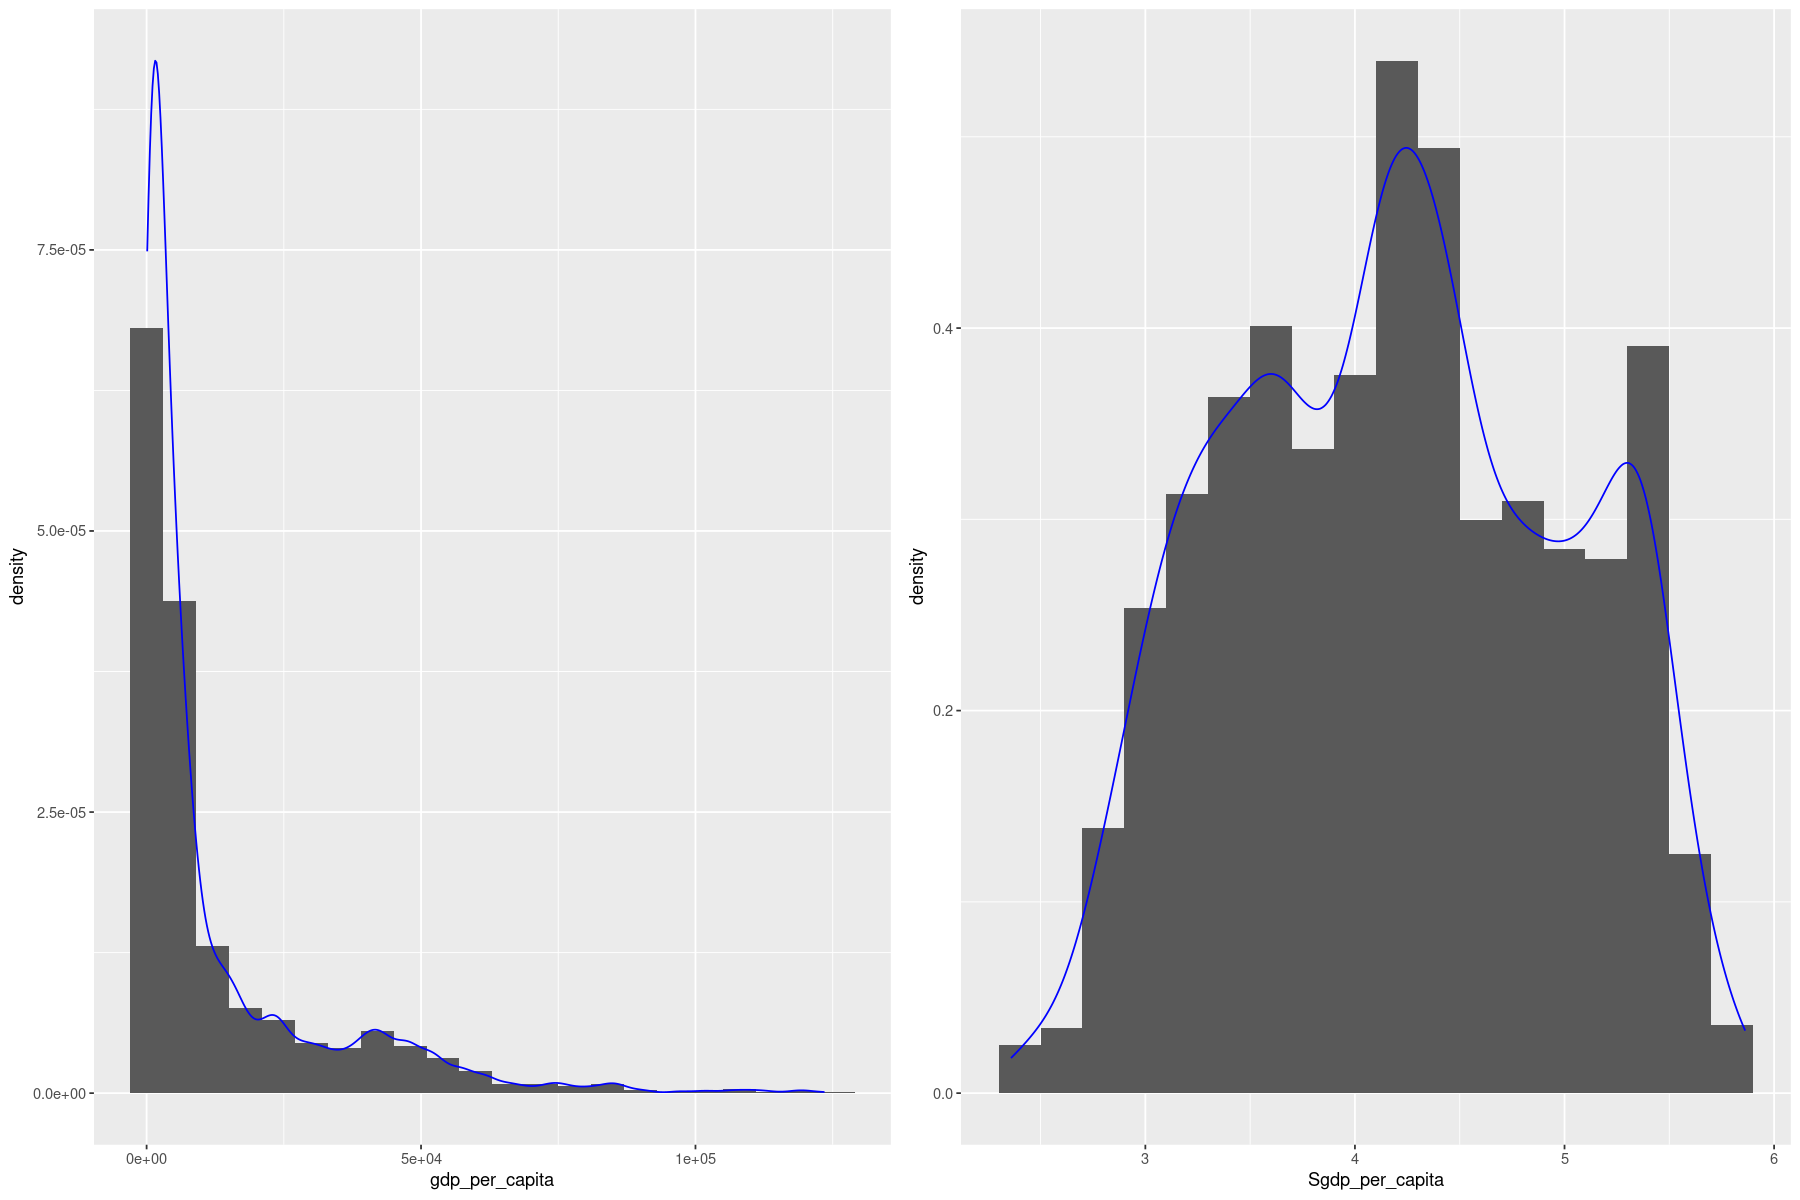

In [196]:
complete_energy[, "Sgdp_per_capita"] = log(sqrt(complete_energy[, "gdp_per_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_per_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_per_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

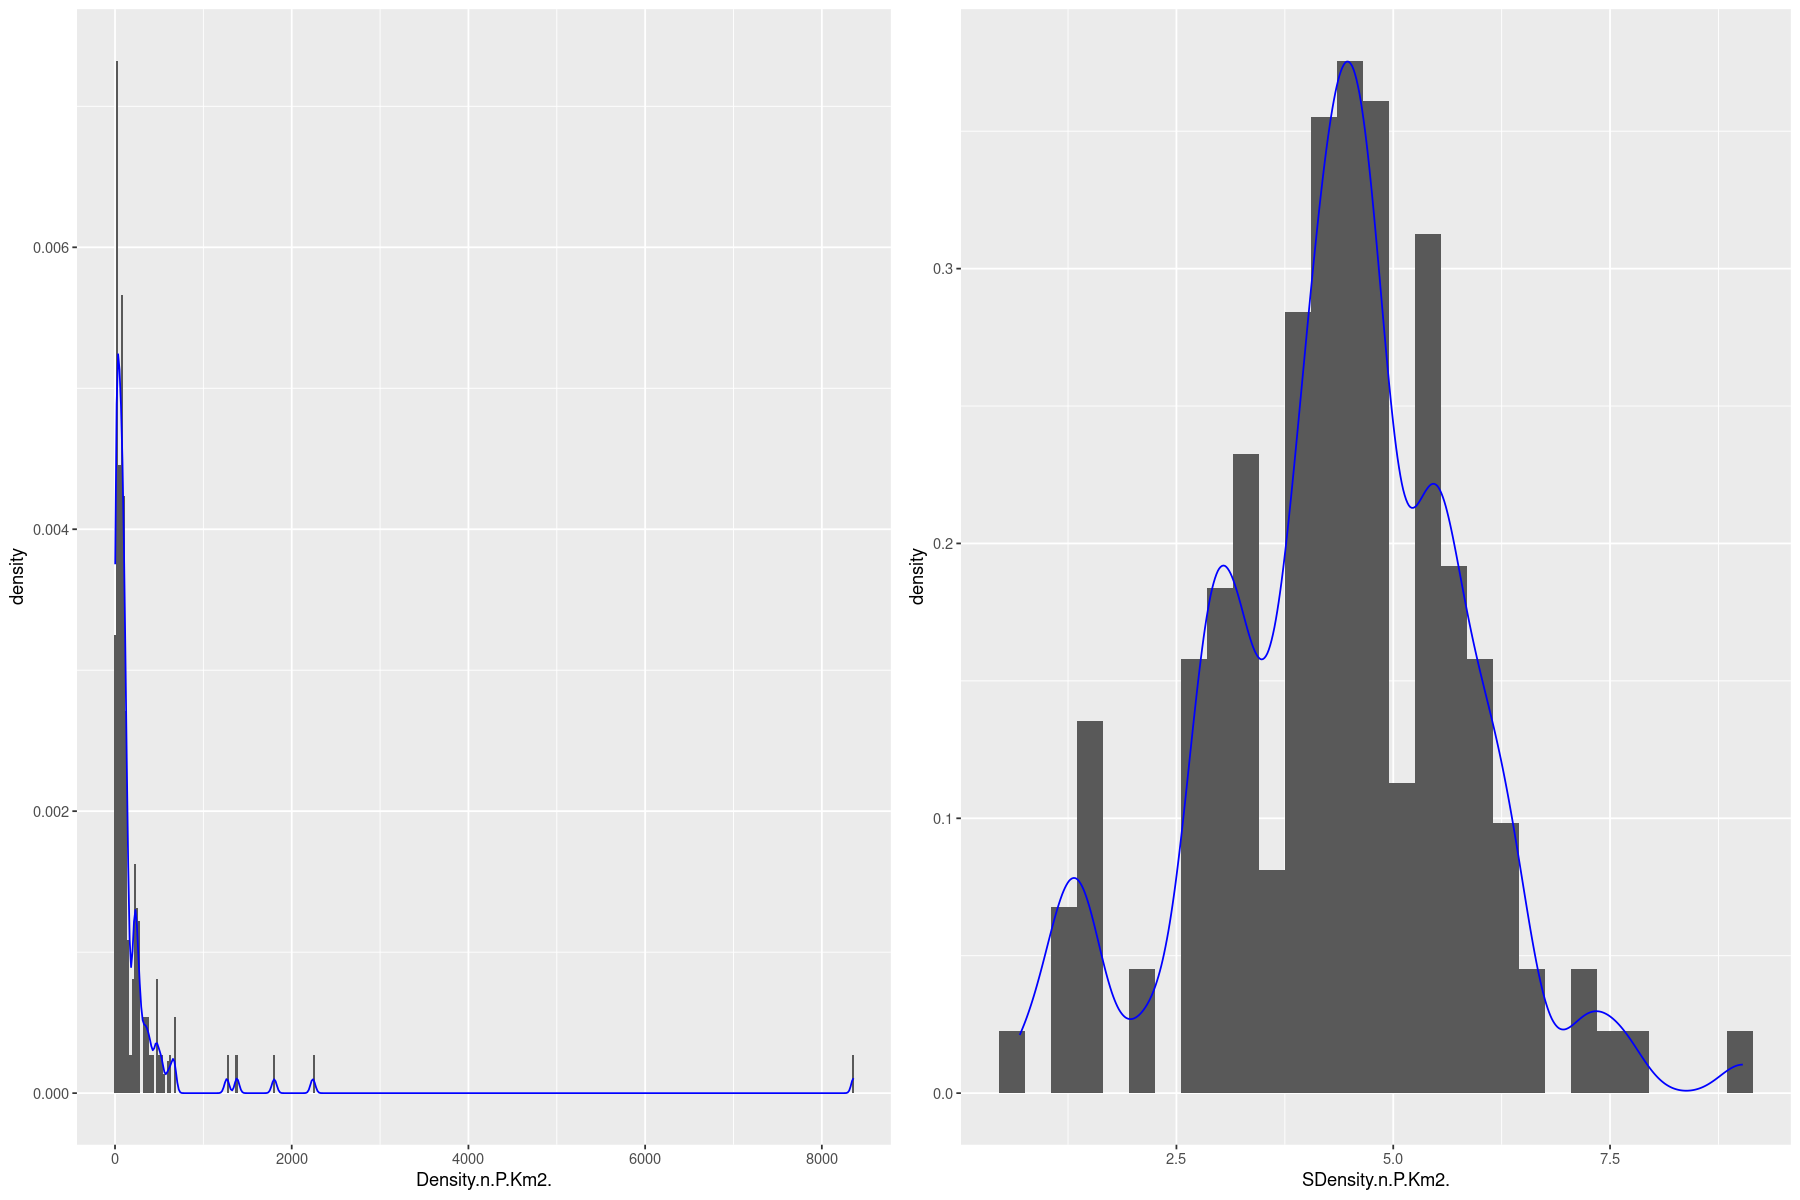

In [197]:
complete_energy[, "SDensity.n.P.Km2."] = log(complete_energy[, "Density.n.P.Km2."])

g1 = ggplot(complete_energy,aes(x=Density.n.P.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity.n.P.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

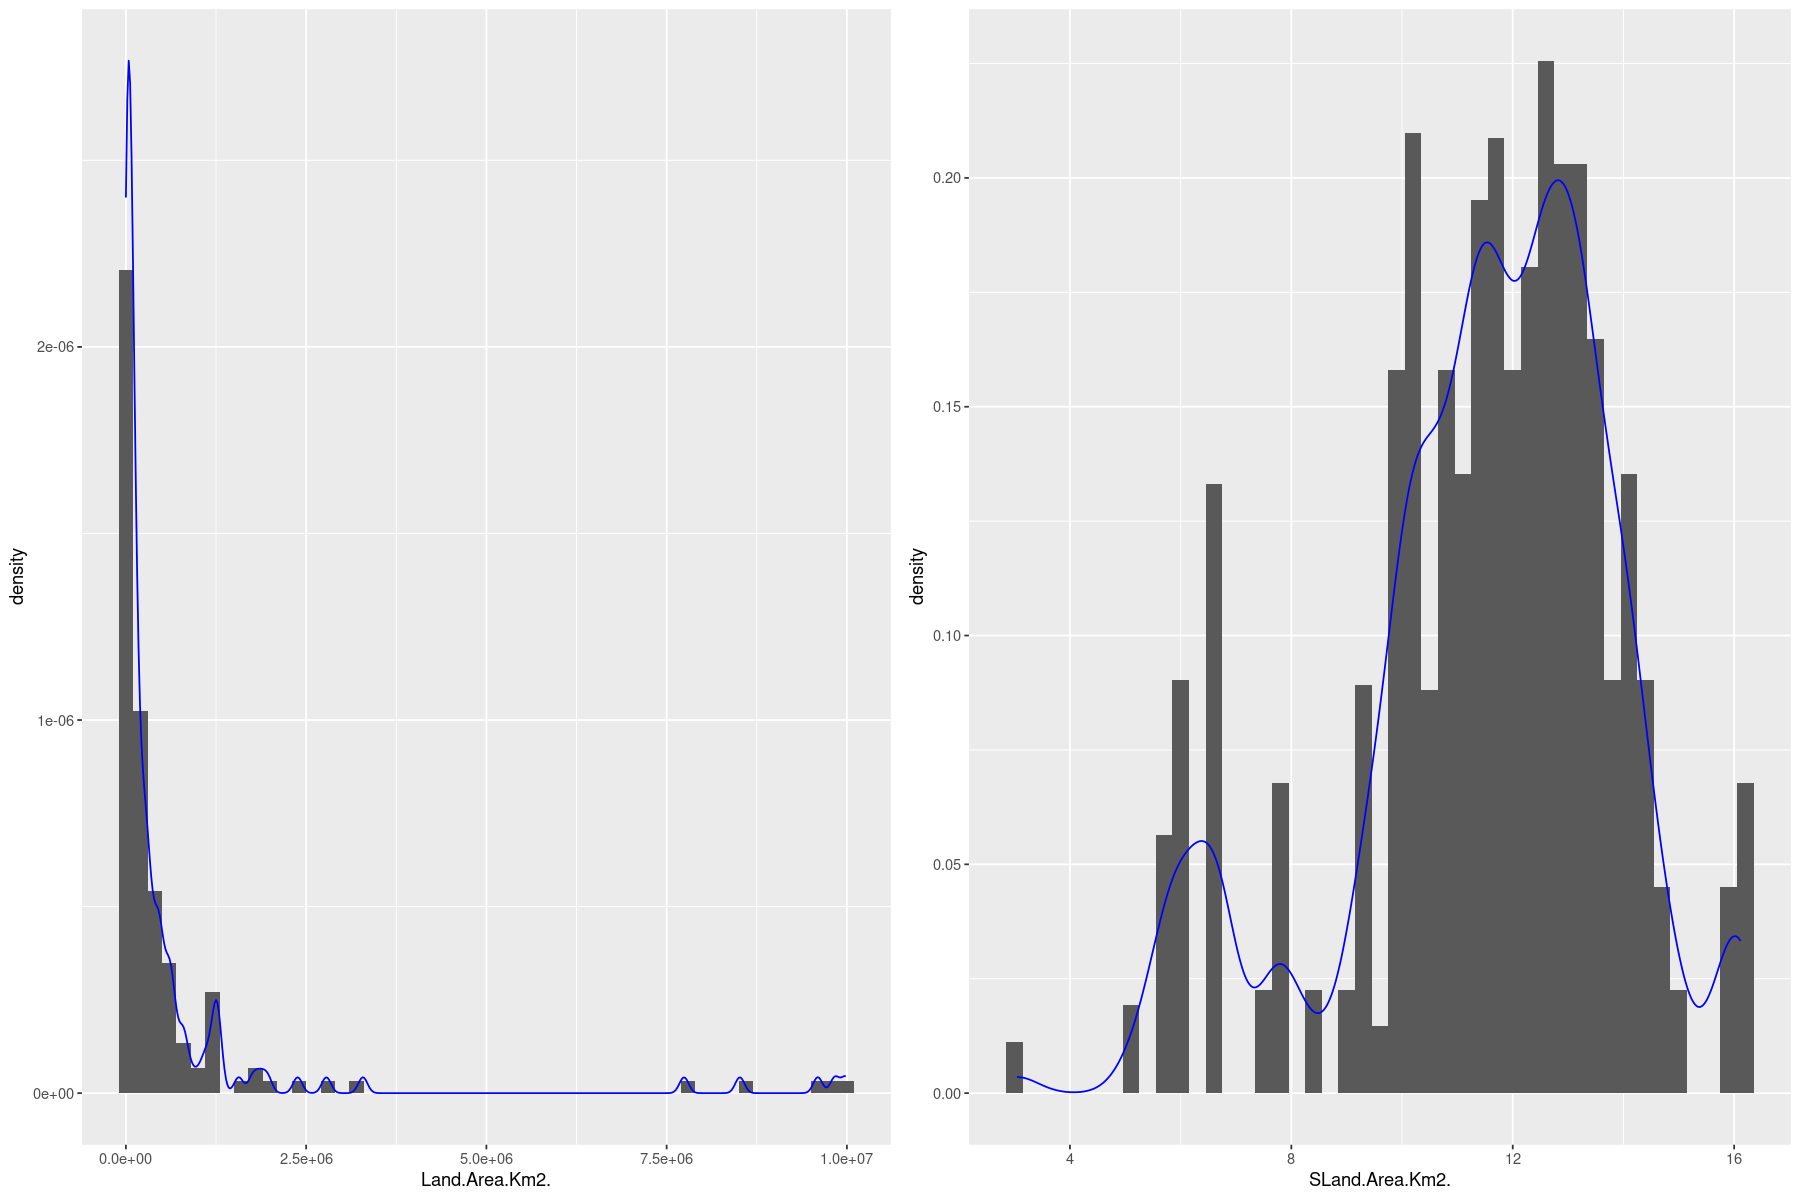

In [198]:
complete_energy[, "SLand.Area.Km2."] = log(complete_energy[, "Land.Area.Km2."])

g1 = ggplot(complete_energy,aes(x=Land.Area.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand.Area.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

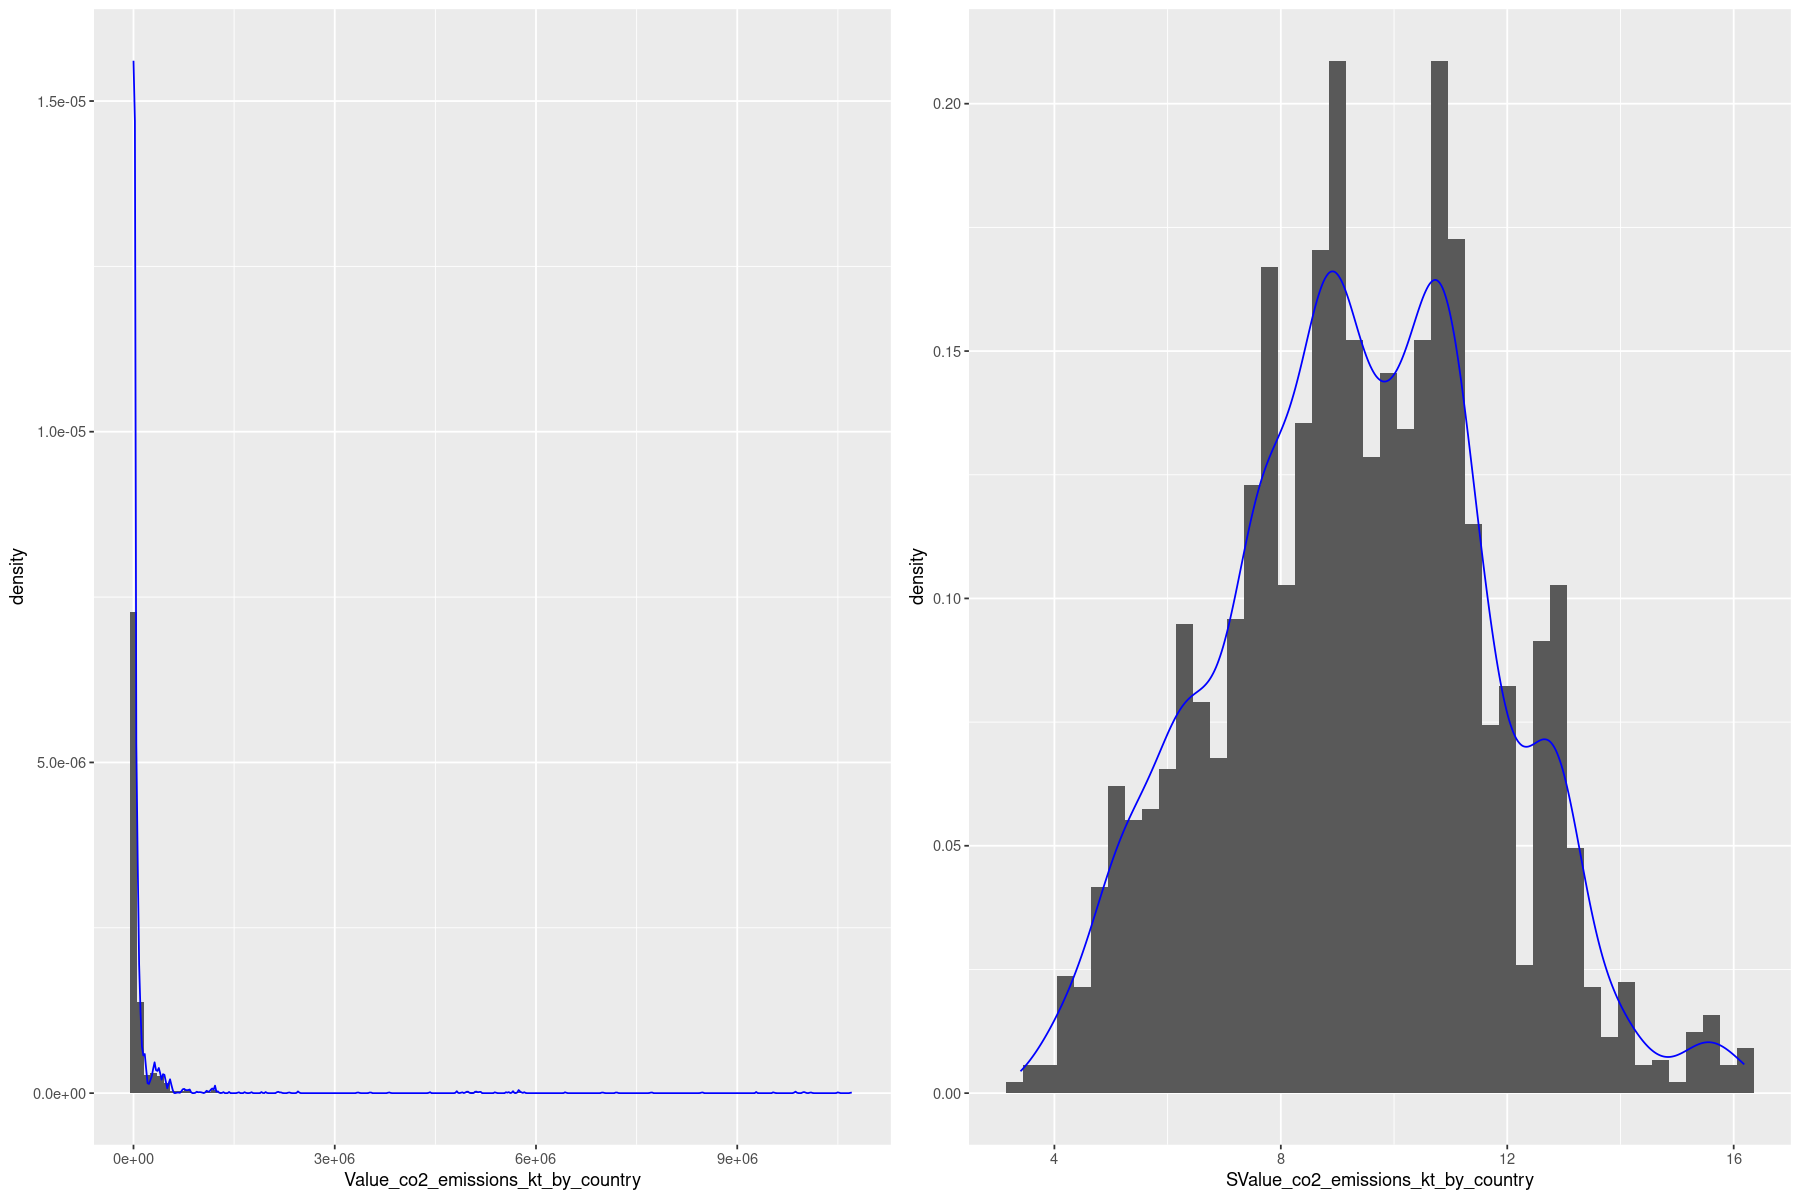

In [199]:
complete_energy[, "SValue_co2_emissions_kt_by_country"] = log(complete_energy[, "Value_co2_emissions_kt_by_country"])

g1 = ggplot(complete_energy,aes(x=Value_co2_emissions_kt_by_country))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2_emissions_kt_by_country))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

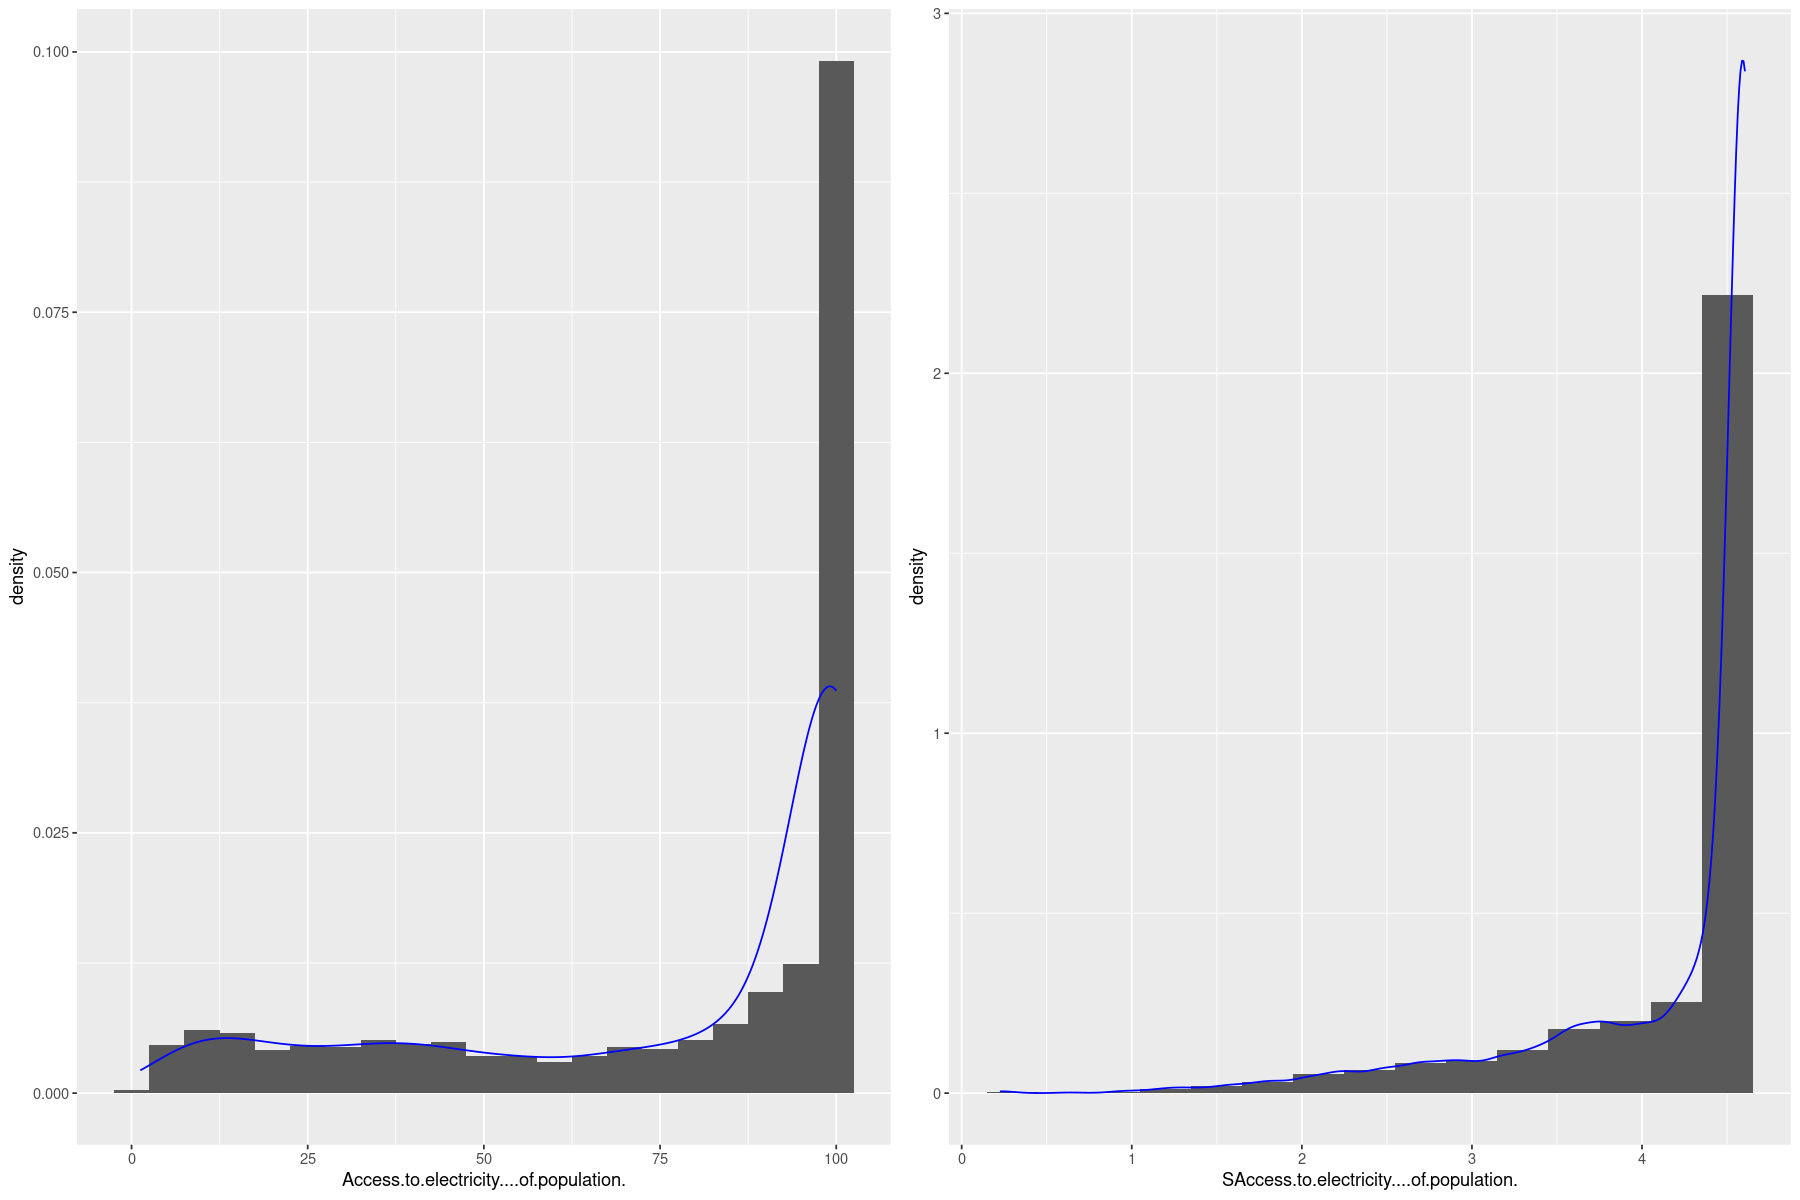

In [200]:
complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [201]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [202]:
#summary(complete_energy)

In [203]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [204]:
summary(complete_energy)

    Entity               Year        gdp_growth      gdp_per_capita    
 Length:2955        2014   : 152   Min.   :-62.076   Min.   :   111.9  
 Class :character   2015   : 152   1st Qu.:  1.714   1st Qu.:  1255.1  
 Mode  :character   2016   : 151   Median :  3.749   Median :  4354.2  
                    2010   : 150   Mean   :  3.869   Mean   : 12744.8  
                    2011   : 150   3rd Qu.:  5.951   3rd Qu.: 15107.5  
                    2013   : 150   Max.   :123.140   Max.   :123514.2  
                    (Other):2050                                       
   Longitude        SAccess.to.electricity....of.population.
 Min.   :-175.198   Min.   :0.225                           
 1st Qu.:  -9.697   1st Qu.:4.013                           
 Median :  18.643   Median :4.578                           
 Mean   :  12.993   Mean   :4.172                           
 3rd Qu.:  43.679   3rd Qu.:4.605                           
 Max.   : 178.065   Max.   :4.605                         

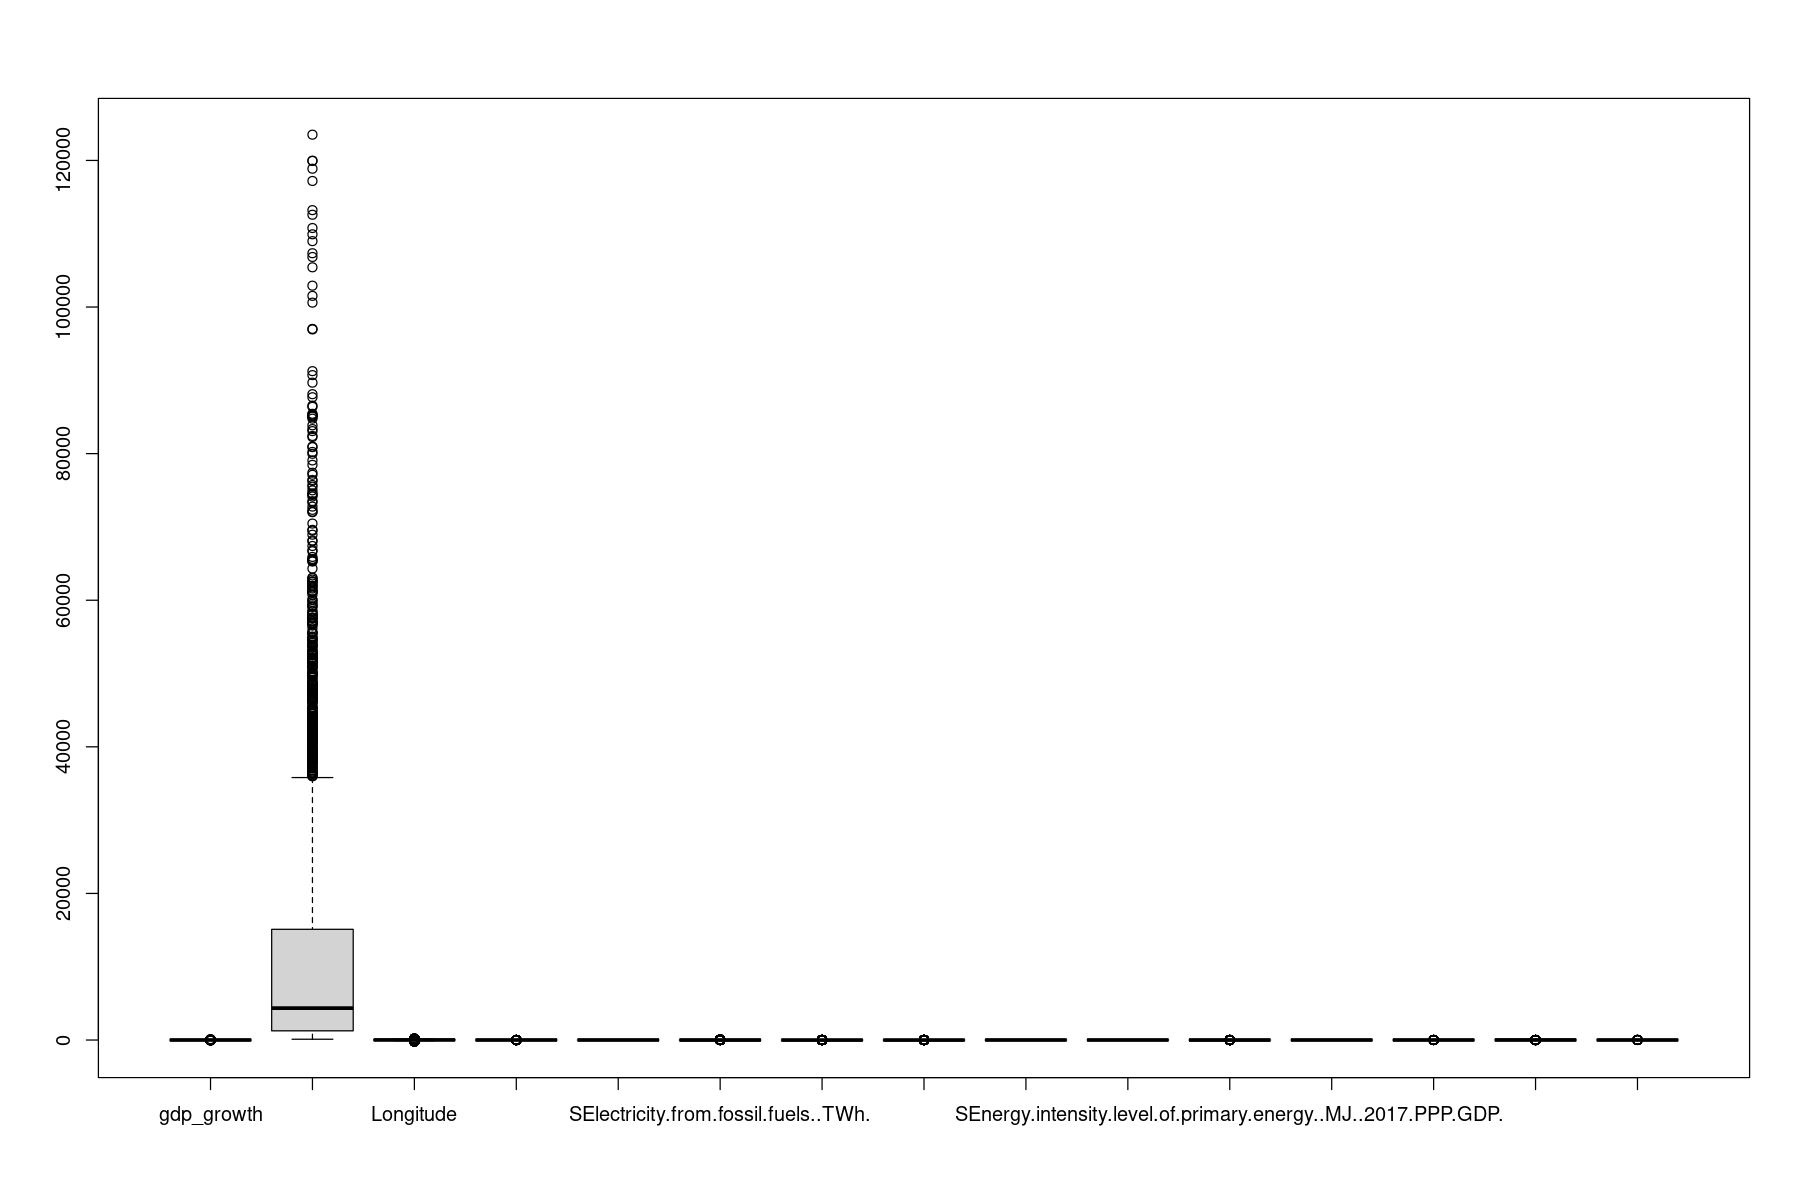

In [205]:
boxplot(complete_energy[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

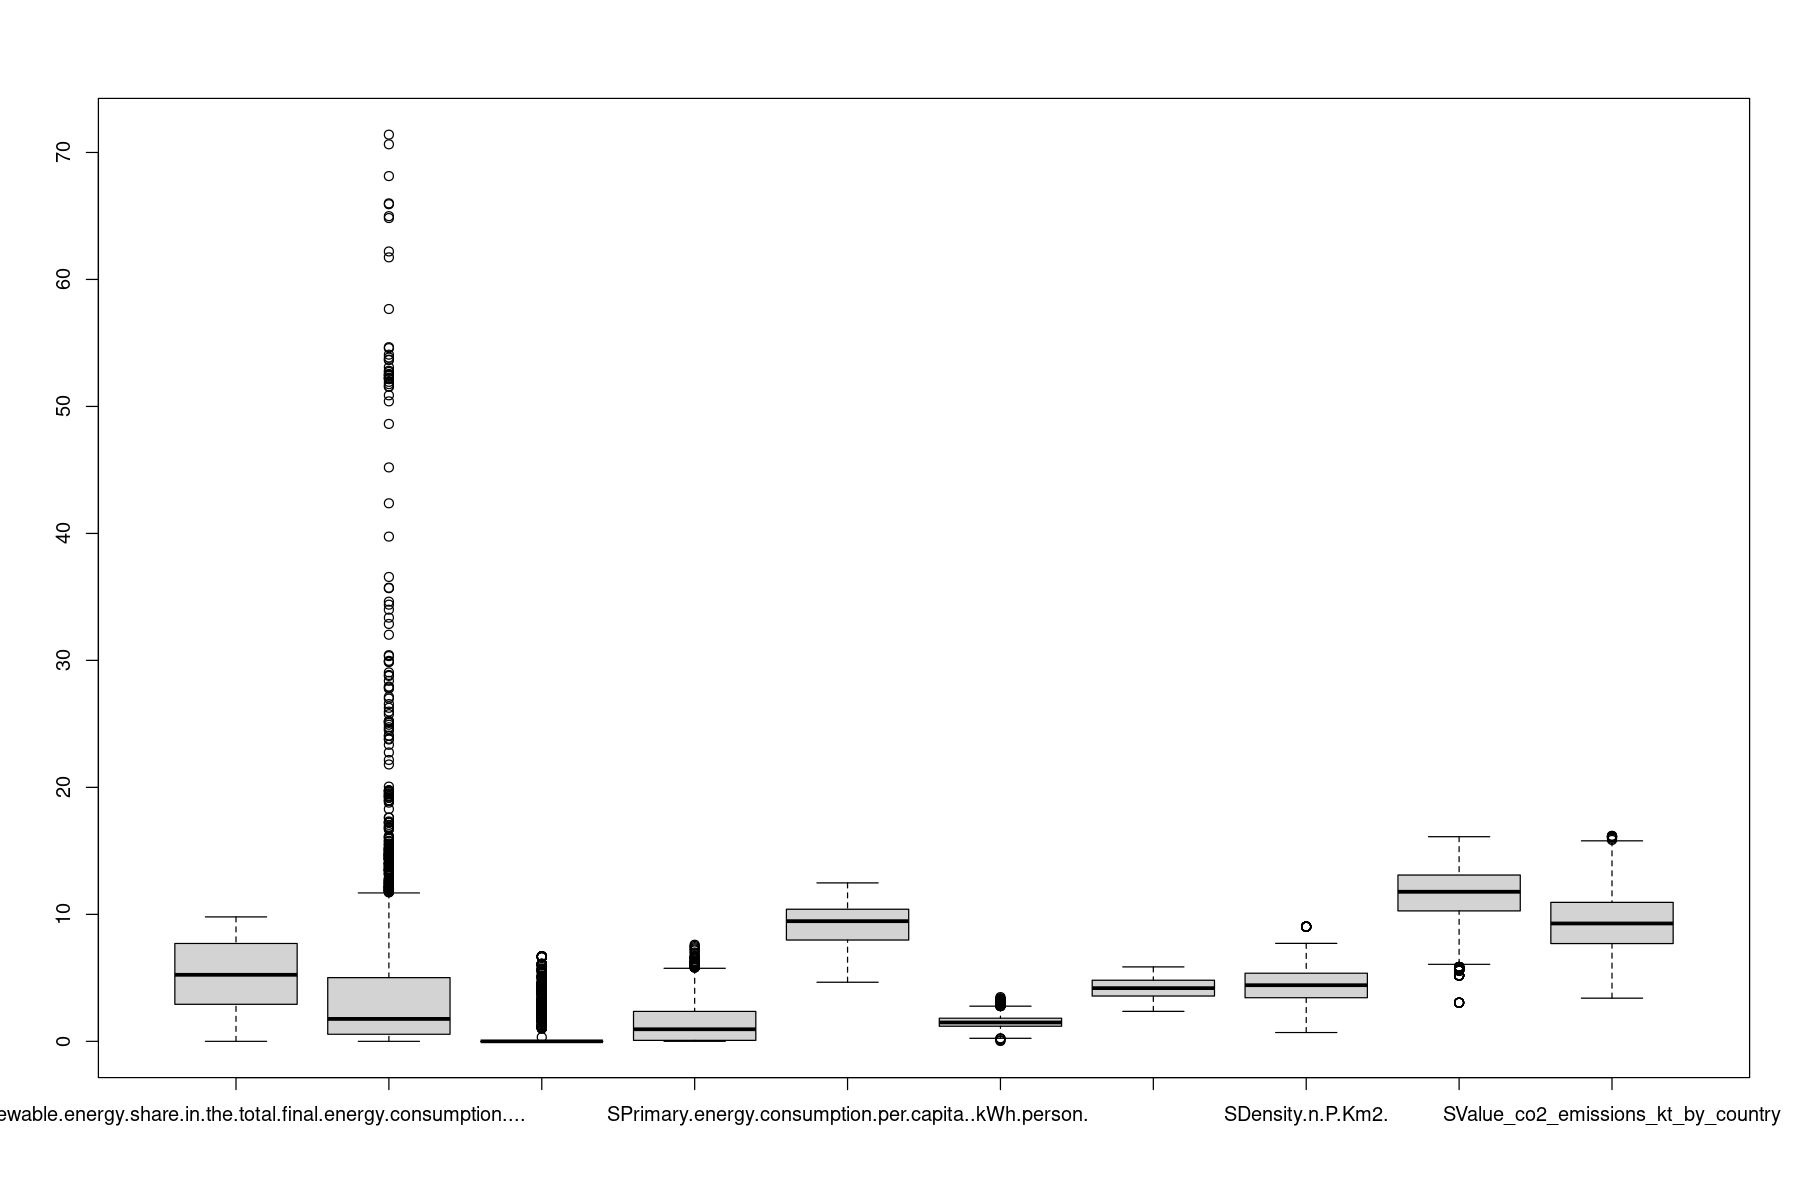

In [206]:
boxplot(complete_energy[,-c(1:6,11)])

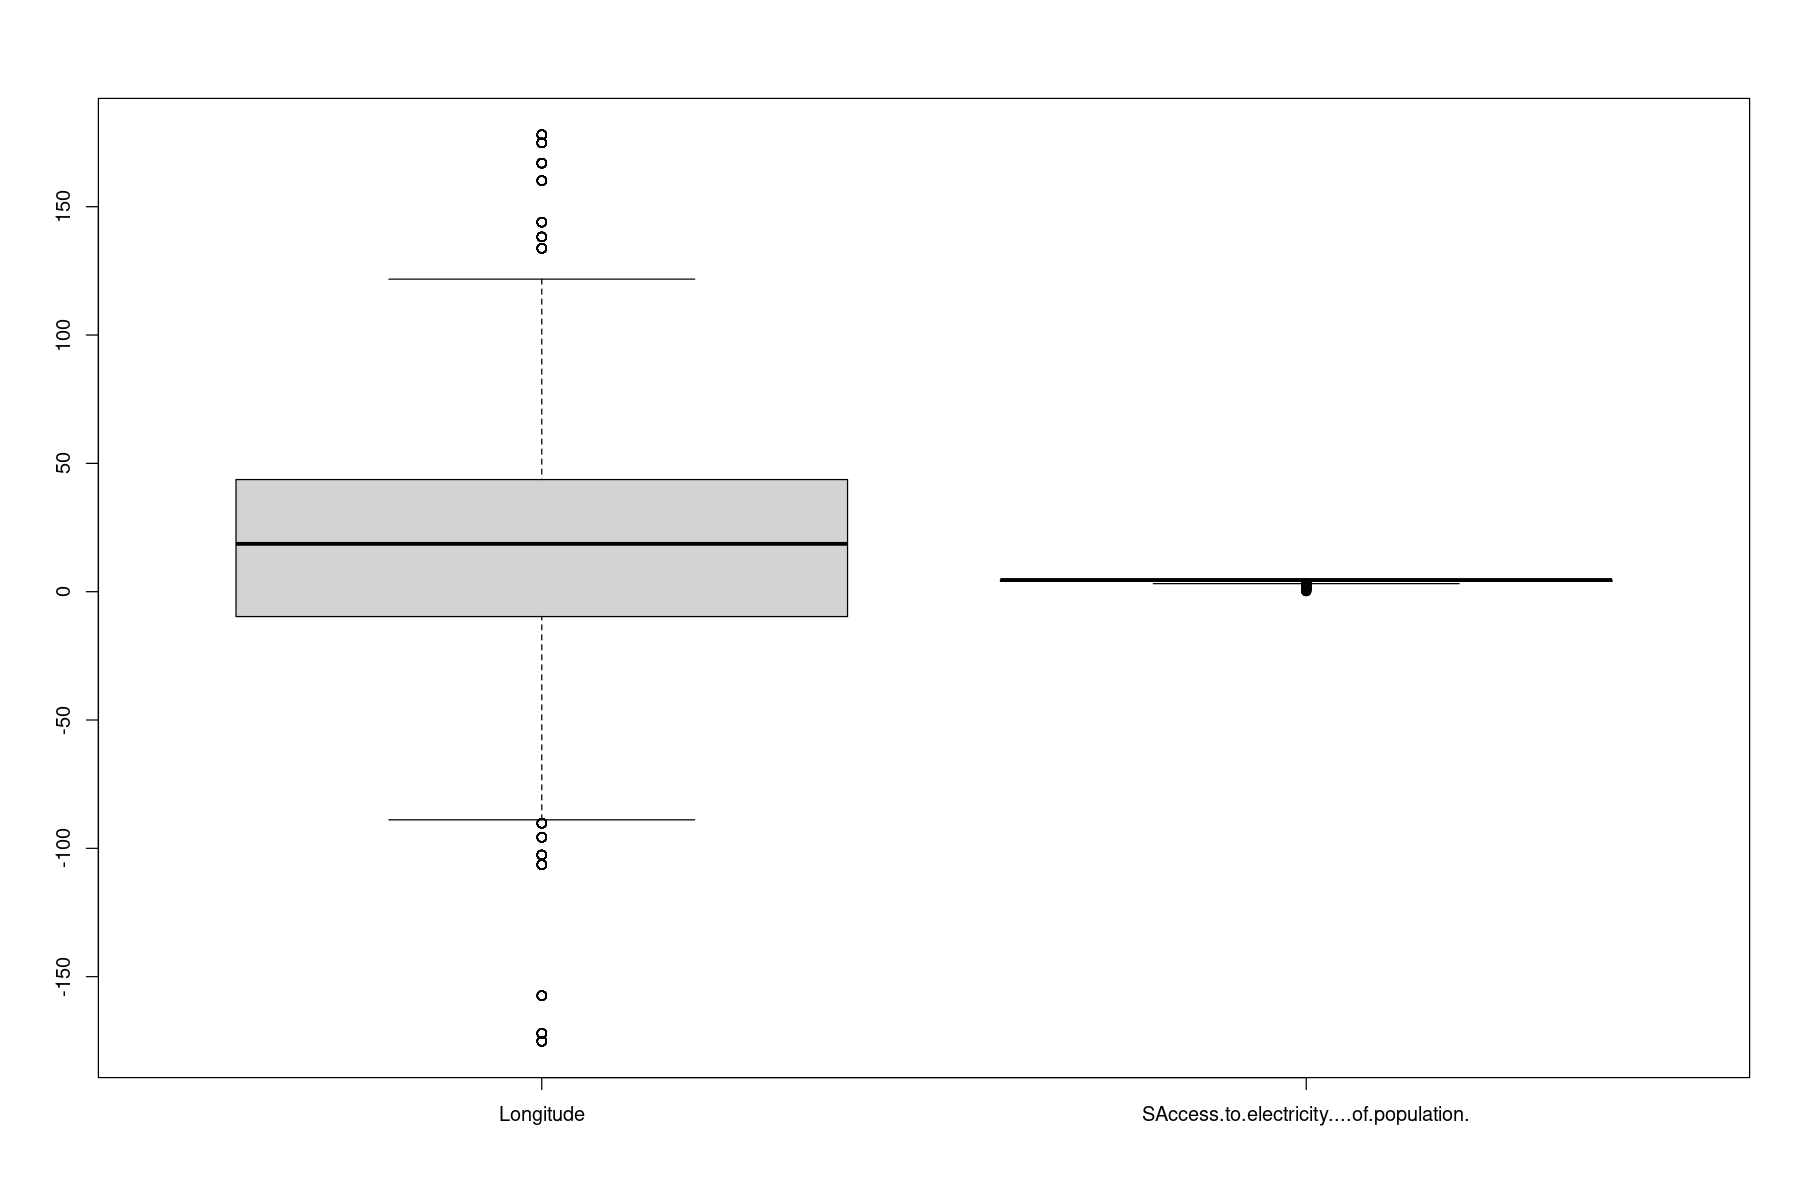

In [207]:
boxplot(complete_energy[,c(5:6)])

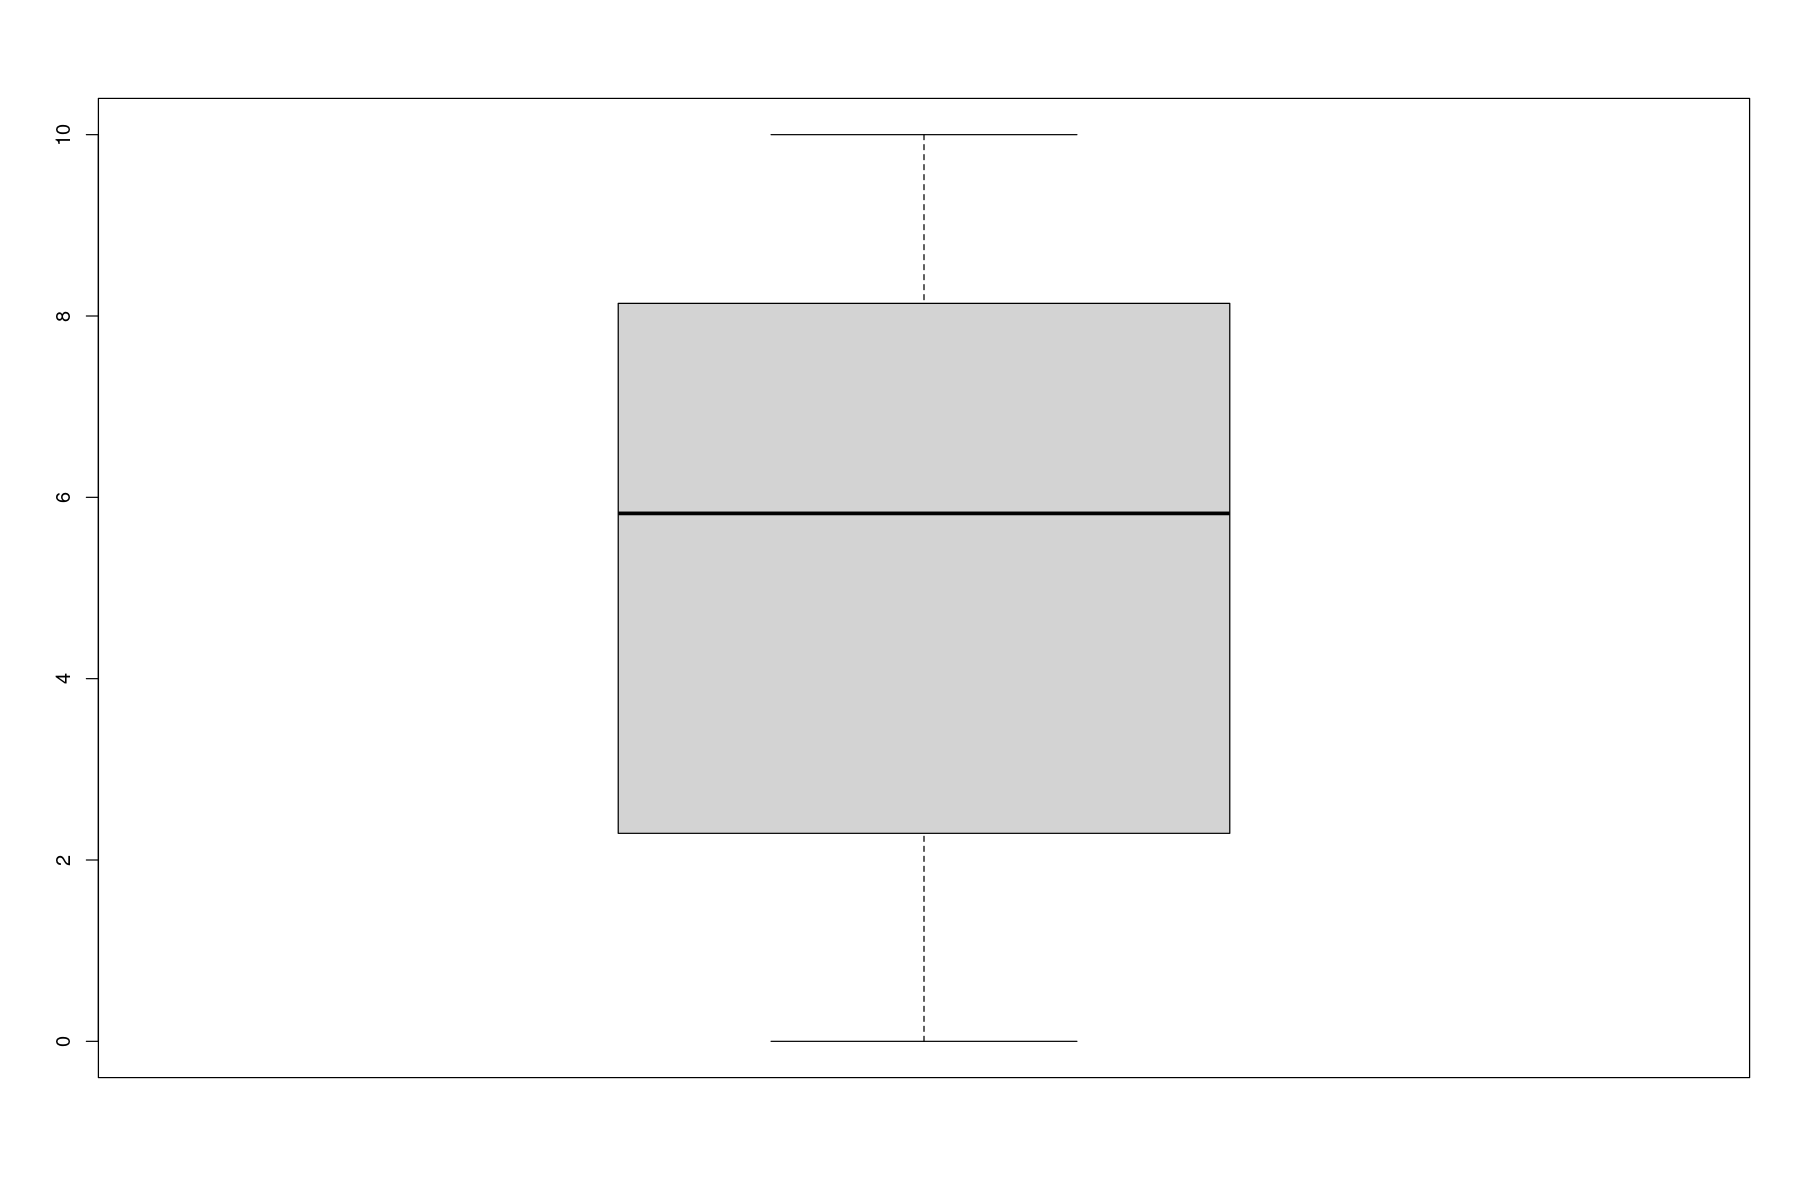

In [208]:
boxplot(complete_energy[,c(11)]) #nuclear

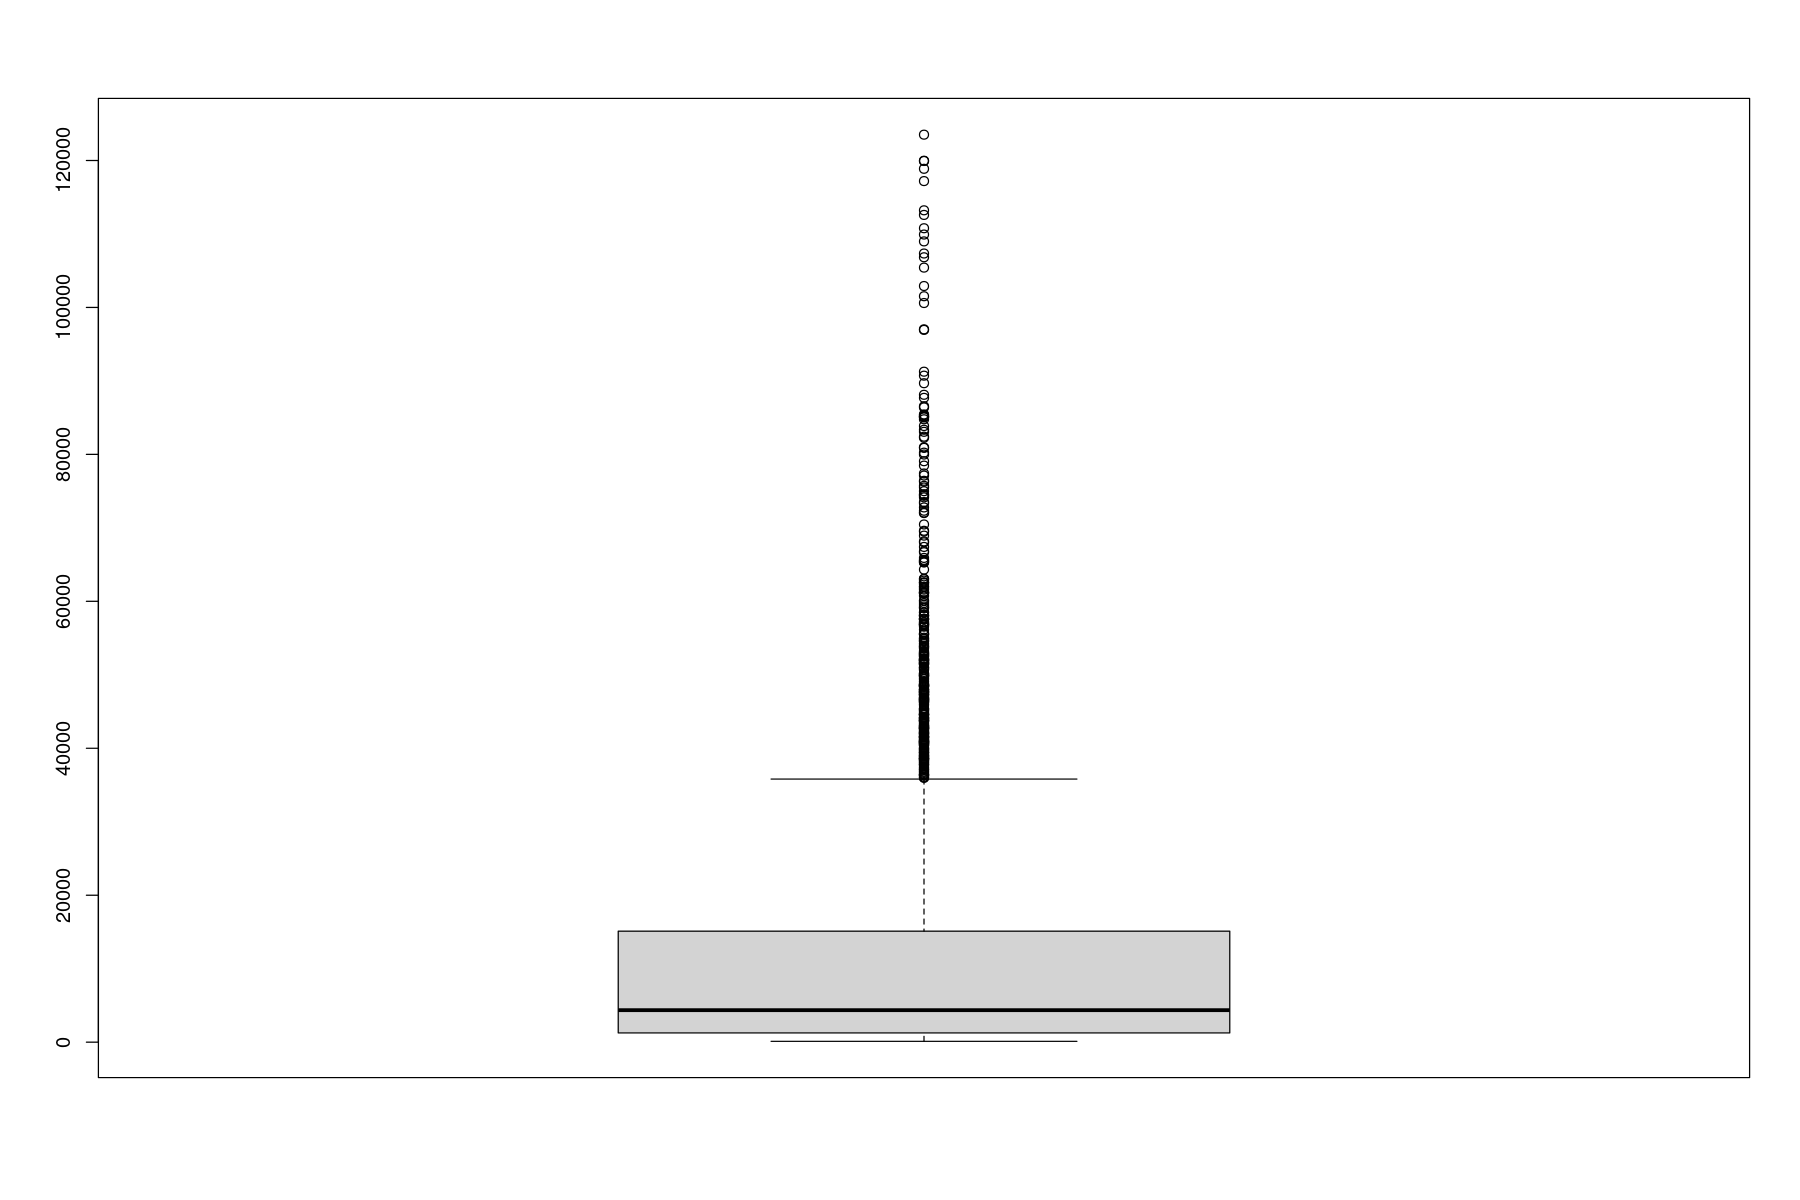

In [209]:
boxplot(complete_energy[,c(4)]) #gdp growth

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 5

### Hétérogénéité d'émission de CO2 de pays

In [210]:
ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2_emissions_kt_by_country, color = Entity, group = Entity) + 
  geom_line() + 
  theme(legend.position = "right")


ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! objet 'Value_co2_emissions_kt_by_country' introuvable

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)


In [211]:
paste('ecart type')
sd(complete_energy$Value_co2_emissions_kt_by_country)
paste('moyenne :')
mean(complete_energy$Value_co2_emissions_kt_by_country)
paste('min')
min(complete_energy$Value_co2_emissions_kt_by_country)
paste('max')
max(complete_energy$Value_co2_emissions_kt_by_country)

[1] "ecart type"

[1] NA

[1] "moyenne :"

Warning message in mean.default(complete_energy$Value_co2_emissions_kt_by_country):
“l'argument n'est ni numérique, ni logique : renvoi de NA”


[1] NA

[1] "min"

Warning message in min(complete_energy$Value_co2_emissions_kt_by_country):
“aucun argument trouvé pour min ; Inf est renvoyé”


[1] Inf

[1] "max"

Warning message in max(complete_energy$Value_co2_emissions_kt_by_country):
“aucun argument pour max ; -Inf est renvoyé”


[1] -Inf

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont :

### Les pays les plus émetteurs de CO2

In [212]:
Moy = aggregate(data=complete_energy,Value_co2_emissions_kt_by_country~Entity,FUN=mean)
index = order(Moy$Value_co2_emissions_kt_by_country, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe)
barplot(Moy[,2])

ERROR: Error in eval(predvars, data, env): objet 'Value_co2_emissions_kt_by_country' introuvable


Grace à ce tableau, nous pouvons observer l'emission moyenne de CO2 emise par pays ( triée par ordre décroissant ).
Ainsi, nous pouvons donc observer que les 5 pays les plus émetteurs sont : Chine / Etats-Unis / Inde / Japon / Allemagne

## Question 6 

### Analyse descriptive multidimensionnelle

#### Variable quantitative

In [ ]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

In [ ]:
ggpairs(numeric_energy)

In [ ]:
#par(mfrow = c(6,3) , mar = c(4,4,2,1))

#for (i in 3:length(names(complete_energy))) {
 #   dfi = complete_energy[,c(2,i)]
   # plot(dfi, main=names(complete_energy)[i],xlab='Values')
#}

#### Variable qualitative

Pour cette étude, nous avons essayé plusieurs techniques pour visualiser nos données. Cependant nous avons pu remarquer que le nombre d'observations par pays n'est pas identique en fonction des années, ce qui ne rend pas forcément fiable nos exploitations.En effet, nous avons également essayé d'afficher des boxplots de l'ensemble des variables en fonction de Year, mais ce n'était pas très pertinent.   

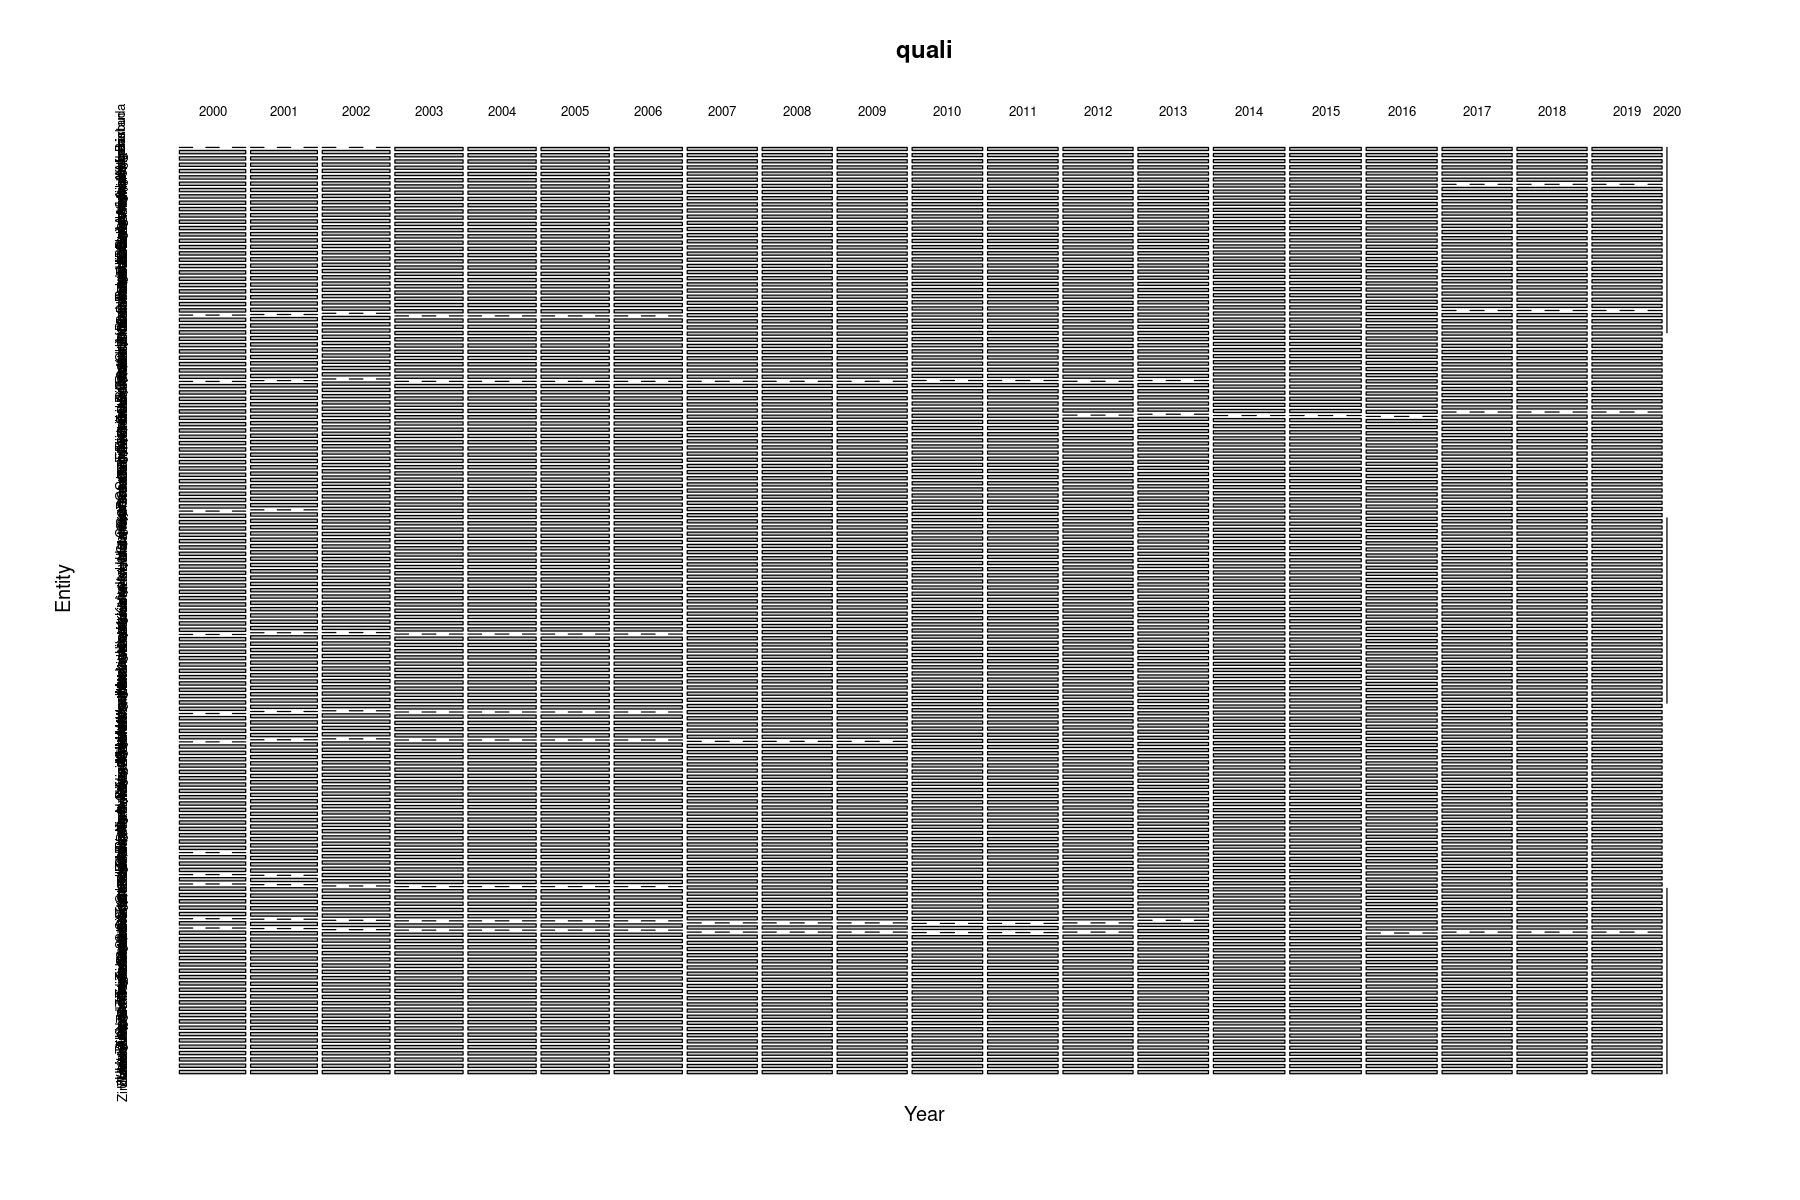

In [213]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

## Question 8

### Dépendance entre Year et la variable à prédire

In [214]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
mcor

gdp_growth  
gdp_growth                                                         1.000000000
gdp_per_capita                                                    -0.126449422
Longitude                                                          0.125644156
SAccess.to.electricity....of.population.                          -0.077828251
SRenewable.energy.share.in.the.total.final.energy.consumption....  0.052955490
SElectricity.from.fossil.fuels..TWh.                              -0.017707474
SElectricity.from.nuclear..TWh.                                   -0.089252106
SElectricity.from.renewables..TWh.                                -0.071049074
SLow.carbon.electricity....electricity.                           -0.027805121
SPrimary.energy.consumption.per.capita..kWh.person.               -0.109573235
SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.061732939
Sgdp_per_capita                                                   -0.163237583
SDensity.n.P.Km2.                                                  0.008869911
SLand.Area.Km2.                                                    0.052740603
SValue_co2_emissions_kt_by_country                                -0.027656946
                                                                  gdp_per_capita
gdp_growth                                                        -0.126449422  
gdp_per_capita                                                     1.000000000  
Longitude                                                          0.023247615  
SAccess.to.electricity....of.population.                           0.362403948  
SRenewable.energy.share.in.the.total.final.energy.consumption.... -0.369855486  
SElectricity.from.fossil.fuels..TWh.                               0.243797153  
SElectricity.from.nuclear..TWh.                                    0.334517502  
SElectricity.from.renewables..TWh.                                 0.336529811  
SLow.carbon.electricity....electricity.                            0.004648974  
SPrimary.energy.consumption.per.capita..kWh.person.                0.644398991  
SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      -0.204318421  
Sgdp_per_capita                                                    0.802037138  
SDensity.n.P.Km2.                                                  0.090746128  
SLand.Area.Km2.                                                   -0.107168434  
SValue_co2_emissions_kt_by_country                                 0.362210252  
                                                                  Longitude   
gdp_growth                                                         0.125644156
gdp_per_capita                                                     0.023247615
Longitude                                                          1.000000000
SAccess.to.electricity....of.population.                          -0.115915271
SRenewable.energy.share.in.the.total.final.energy.consumption....  0.002724477
SElectricity.from.fossil.fuels..TWh.                               0.080655171
SElectricity.from.nuclear..TWh.                                   -0.043047001
SElectricity.from.renewables..TWh.                                -0.021699029
SLow.carbon.electricity....electricity.                           -0.071973755
SPrimary.energy.consumption.per.capita..kWh.person.               -0.025071574
SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.128680227
Sgdp_per_capita                                                   -0.079312941
SDensity.n.P.Km2.                                                  0.054268082
SLand.Area.Km2.                                                    0.096239636
SValue_co2_emissions_kt_by_country                                 0.103293353
                                                                  SAccess.to.electricity....of.population.
gdp_growth                                                        -0.07782825                             
gdp_per_capita              

Ici, nous avons la matrice de corrélation entre toutes les variables de notre energyset. En effet, on peut voir que la corrélation entre la variable Year et Value_co2_emissions_kt_by_country semble faible. Sa valeur faut 0.02055306	

On voit ici que la corrélation entre les variables Year et Value_co2 est très faible. En effet, on obtient un coefficient de corélation proche de 0, ce qui montre que les deux variables ne sont pas coorélées.

In [215]:
correlation_value=cor(as.numeric(complete_energy$Year), complete_energy$Value_co2_emissions_kt_by_country)
print(correlation_value) # méthode pour avoir le coefficient directement 

ERROR: Error in cor(as.numeric(complete_energy$Year), complete_energy$Value_co2_emissions_kt_by_country): fournir 'x' et 'y' ou bien 'x' en matrice


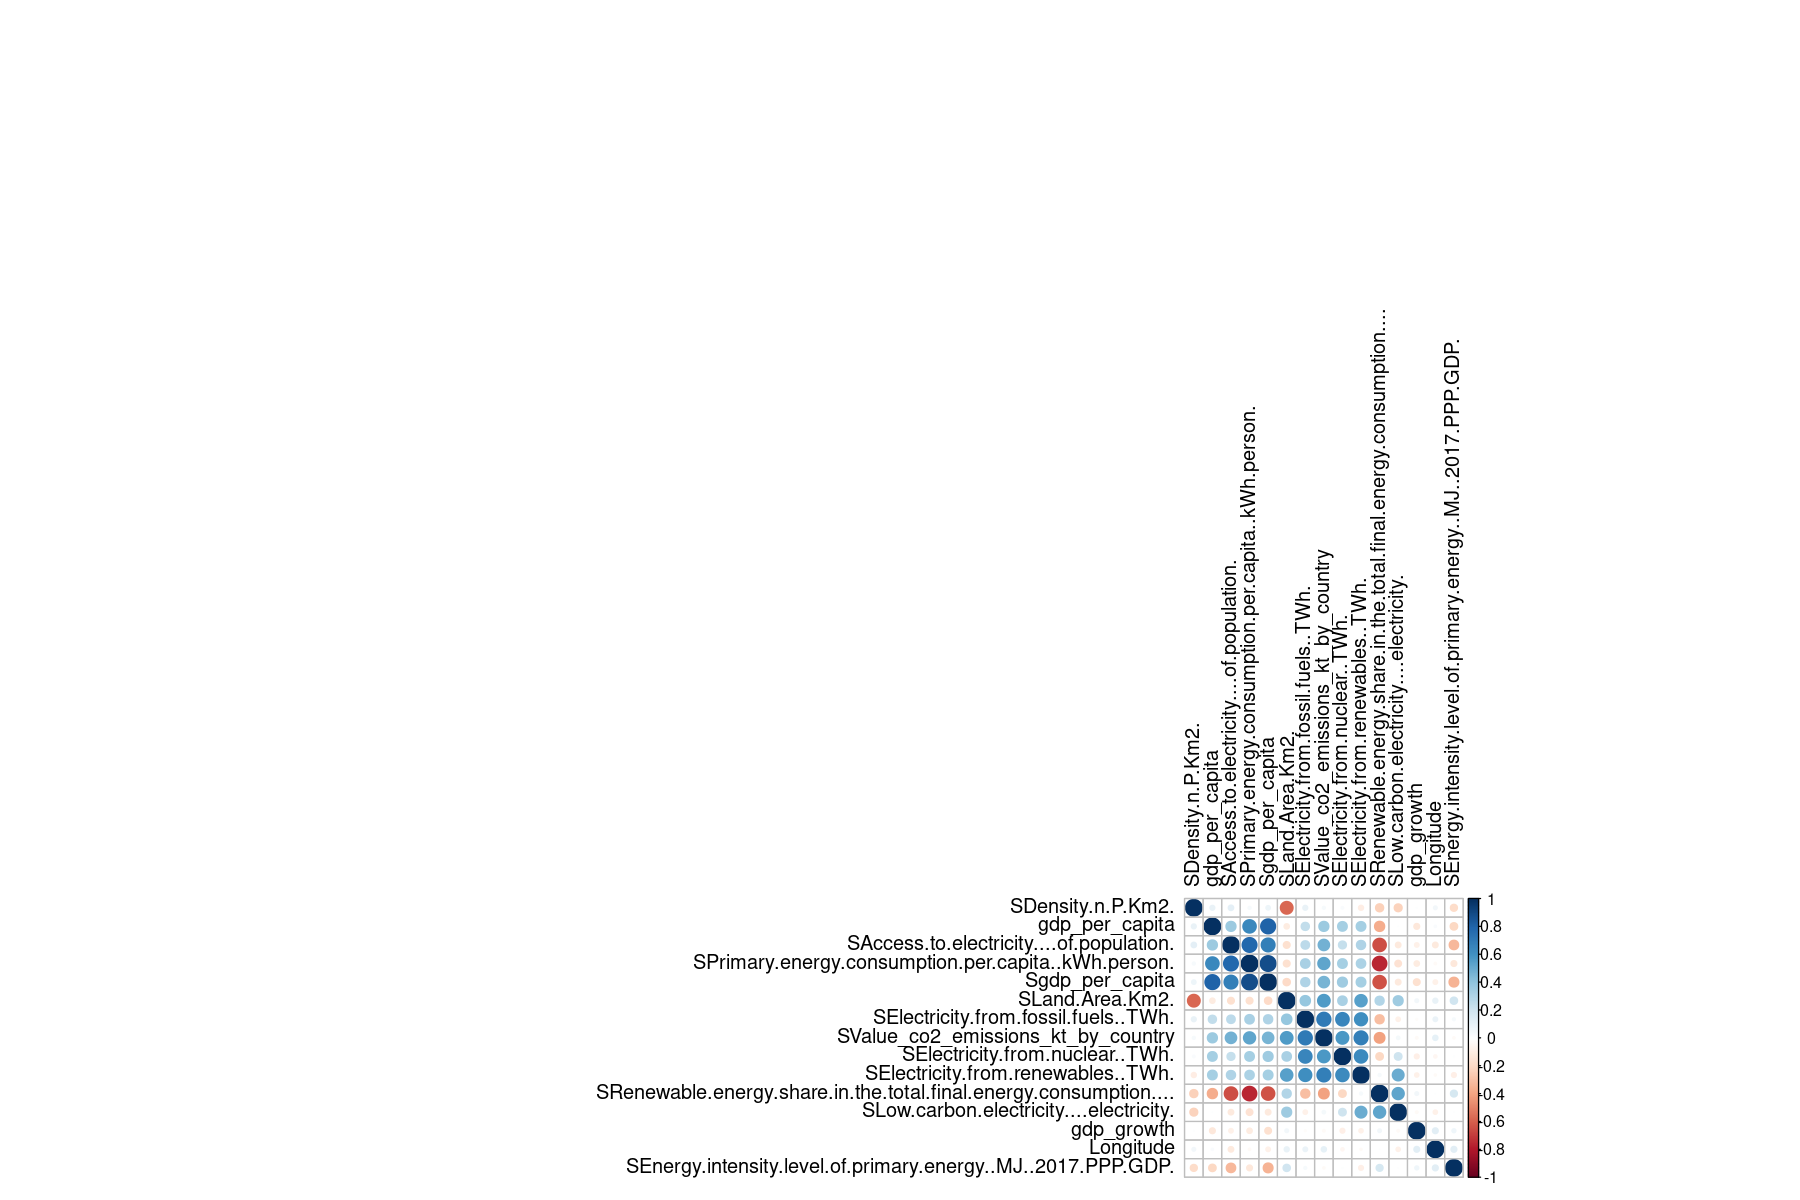

In [216]:
options(corrplot.width = 20, corrplot.height = 20)
corrplot(mcor, order="hclust", tl.col="black")

Ce graphique nous donne la corrélation entre chaque point. En effet, on peut par exemple voir que la variable Value_co2_emissions_kt_by_country est bien corrélée car elle est proche de 1. Au contraire, la longitude n'est pas bine représentée, on peut pas avoir réellement confiance en ses valeurs. 
De plus, si nous comparons les variables Electricity.from.renewables et Value_co2_emissions_kt_by_country, l'angle entre les deux est très faible, ce qui signifie qu'elles sont bien corrélées en elles. A l'inverse, les variables Value_co2_emissions_kt_by_country et Renewable.energy.share.in.the.total.final.energy.consumption ont un angle quasi droit entre elles, ce qui indique qu'elles sont indépendantes.

## Question 7

In [217]:
complete_energy = complete_energy[-c(3)]

### Analyse en composante principale

In [218]:
energy_pca = scale(complete_energy[,-c(1,2)], center = TRUE, scale = TRUE)

In [219]:
resultat_pca = PCA(energy_pca,ncp = 17)
get_eig(resultat_pca)

eigenvalue  variance.percent cumulative.variance.percent
Dim.1  4.881056788 34.86469134       34.86469                  
Dim.2  2.988854959 21.34896399       56.21366                  
Dim.3  1.419253564 10.13752546       66.35118                  
Dim.4  1.139237574  8.13741124       74.48859                  
Dim.5  0.968494427  6.91781734       81.40641                  
Dim.6  0.822019685  5.87156918       87.27798                  
Dim.7  0.625254800  4.46610572       91.74408                  
Dim.8  0.414659351  2.96185251       94.70594                  
Dim.9  0.282595286  2.01853776       96.72447                  
Dim.10 0.182233462  1.30166759       98.02614                  
Dim.11 0.129955672  0.92825480       98.95440                  
Dim.12 0.100163089  0.71545063       99.66985                  
Dim.13 0.039418847  0.28156319       99.95141                  
Dim.14 0.006802495  0.04858925      100.00000

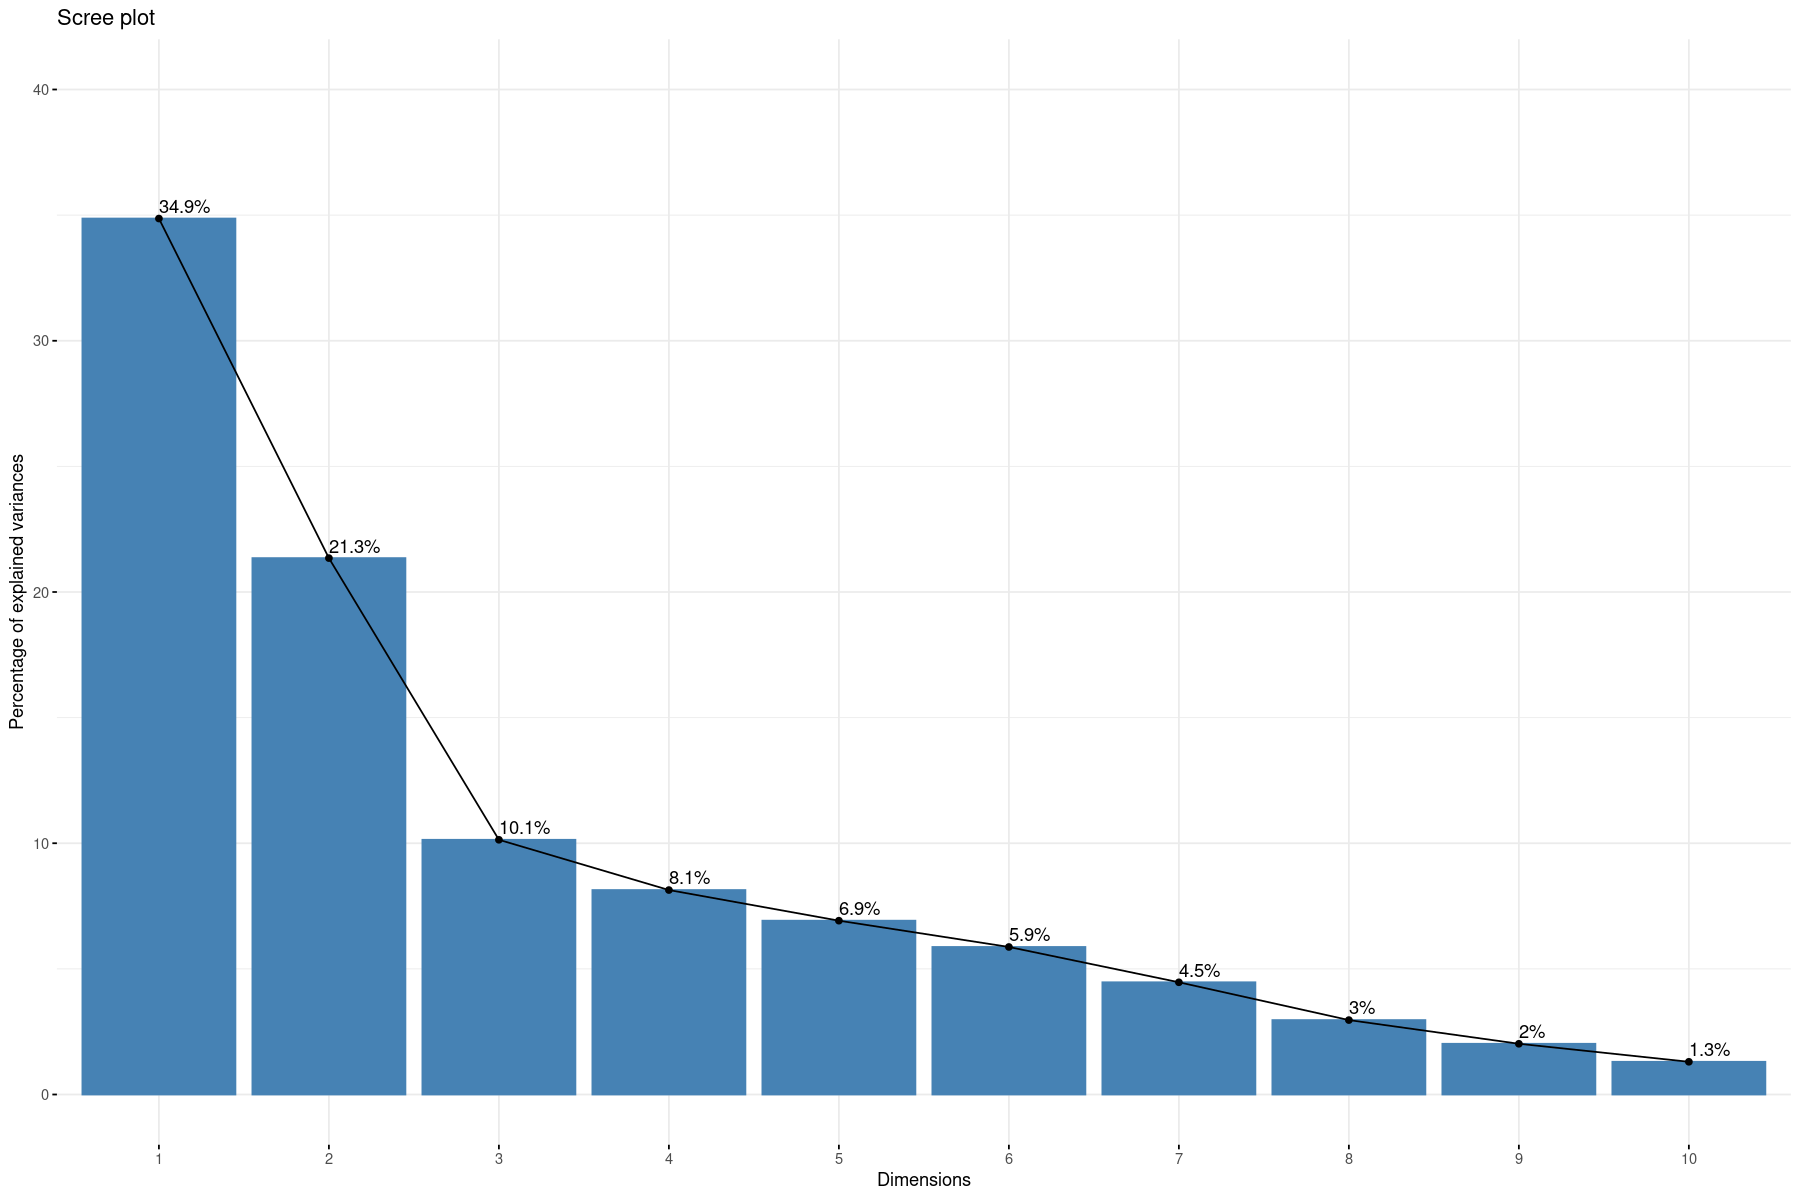

In [220]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

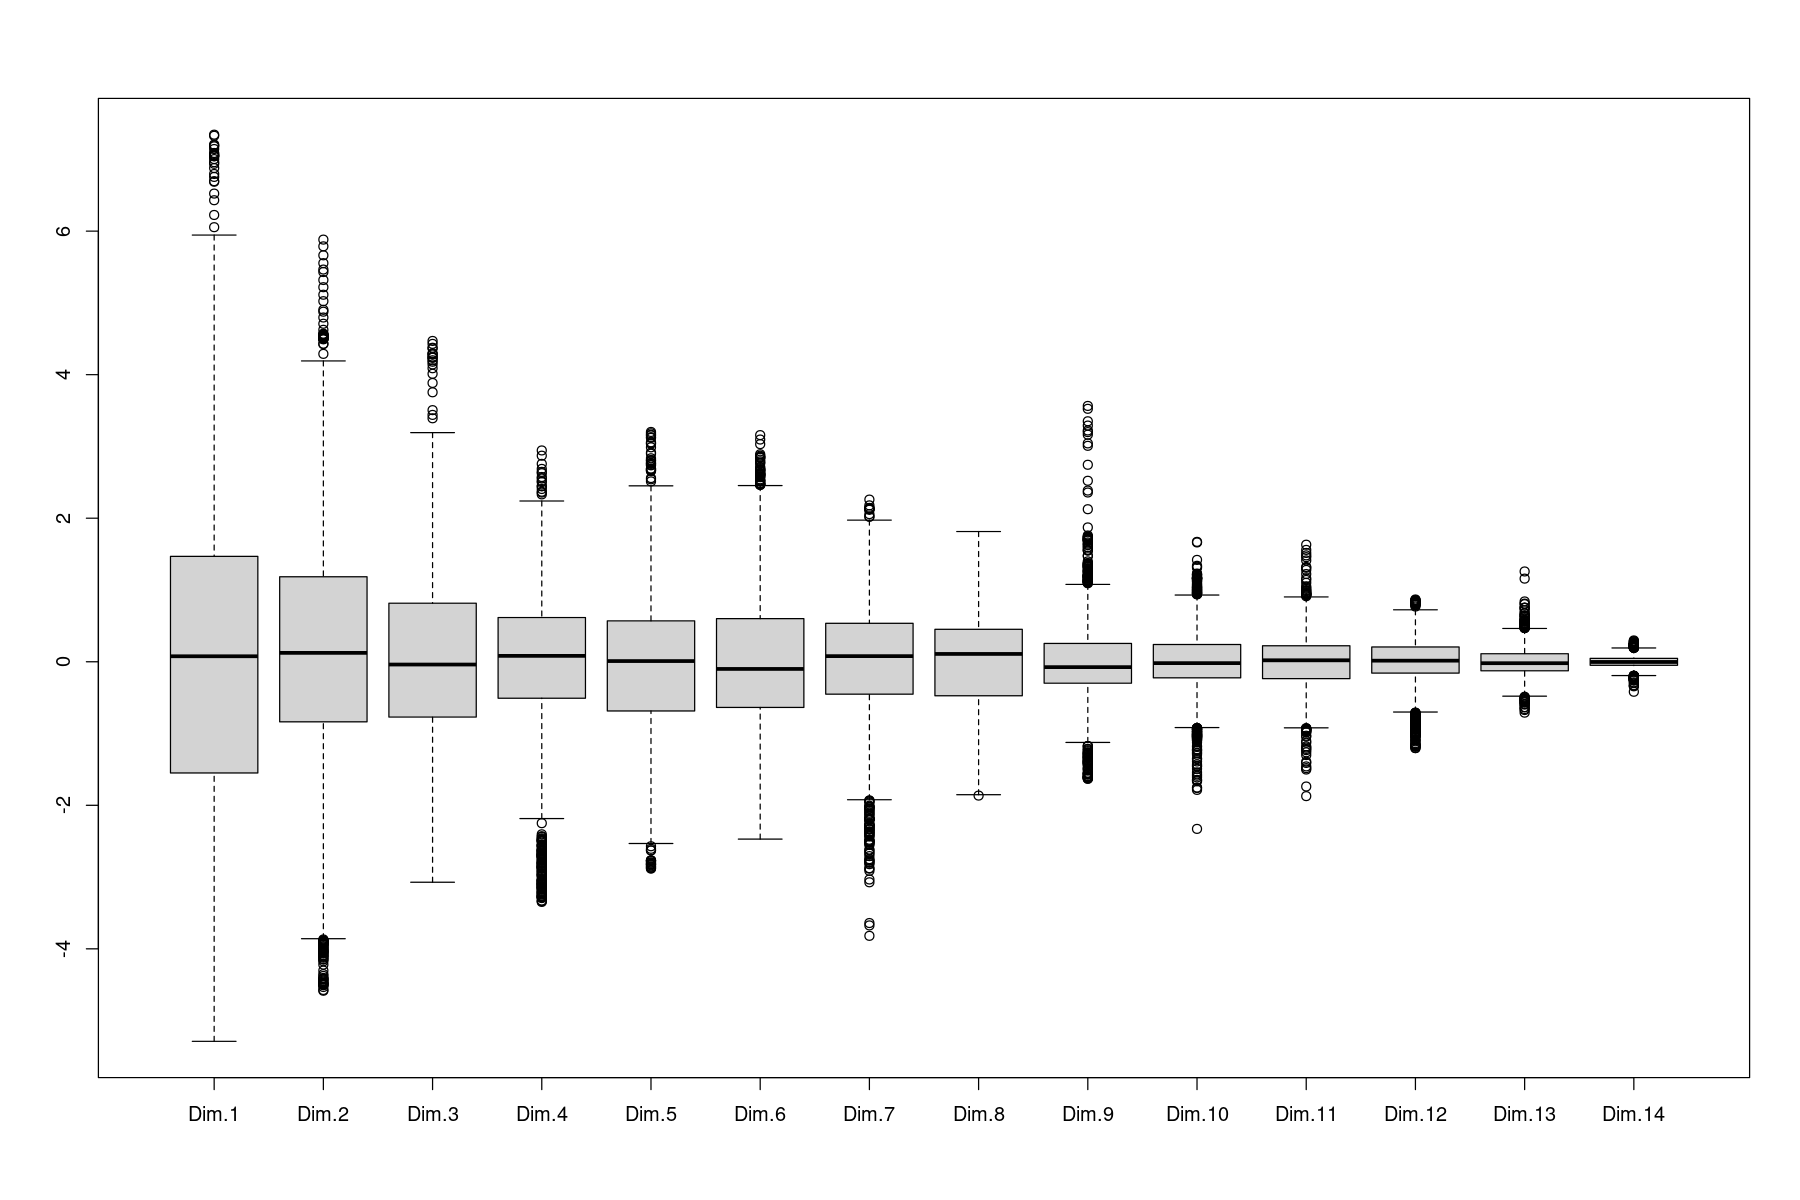

In [221]:
boxplot(resultat_pca$ind$coord)

Nous pouvons en effet voir par cette ACP, que la première composante explique 33.3% des valeurs du energy set.La deuxième composante, elle représente 18.9%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 4 dimensions pour avoir 80% des valeurs expliquées. 

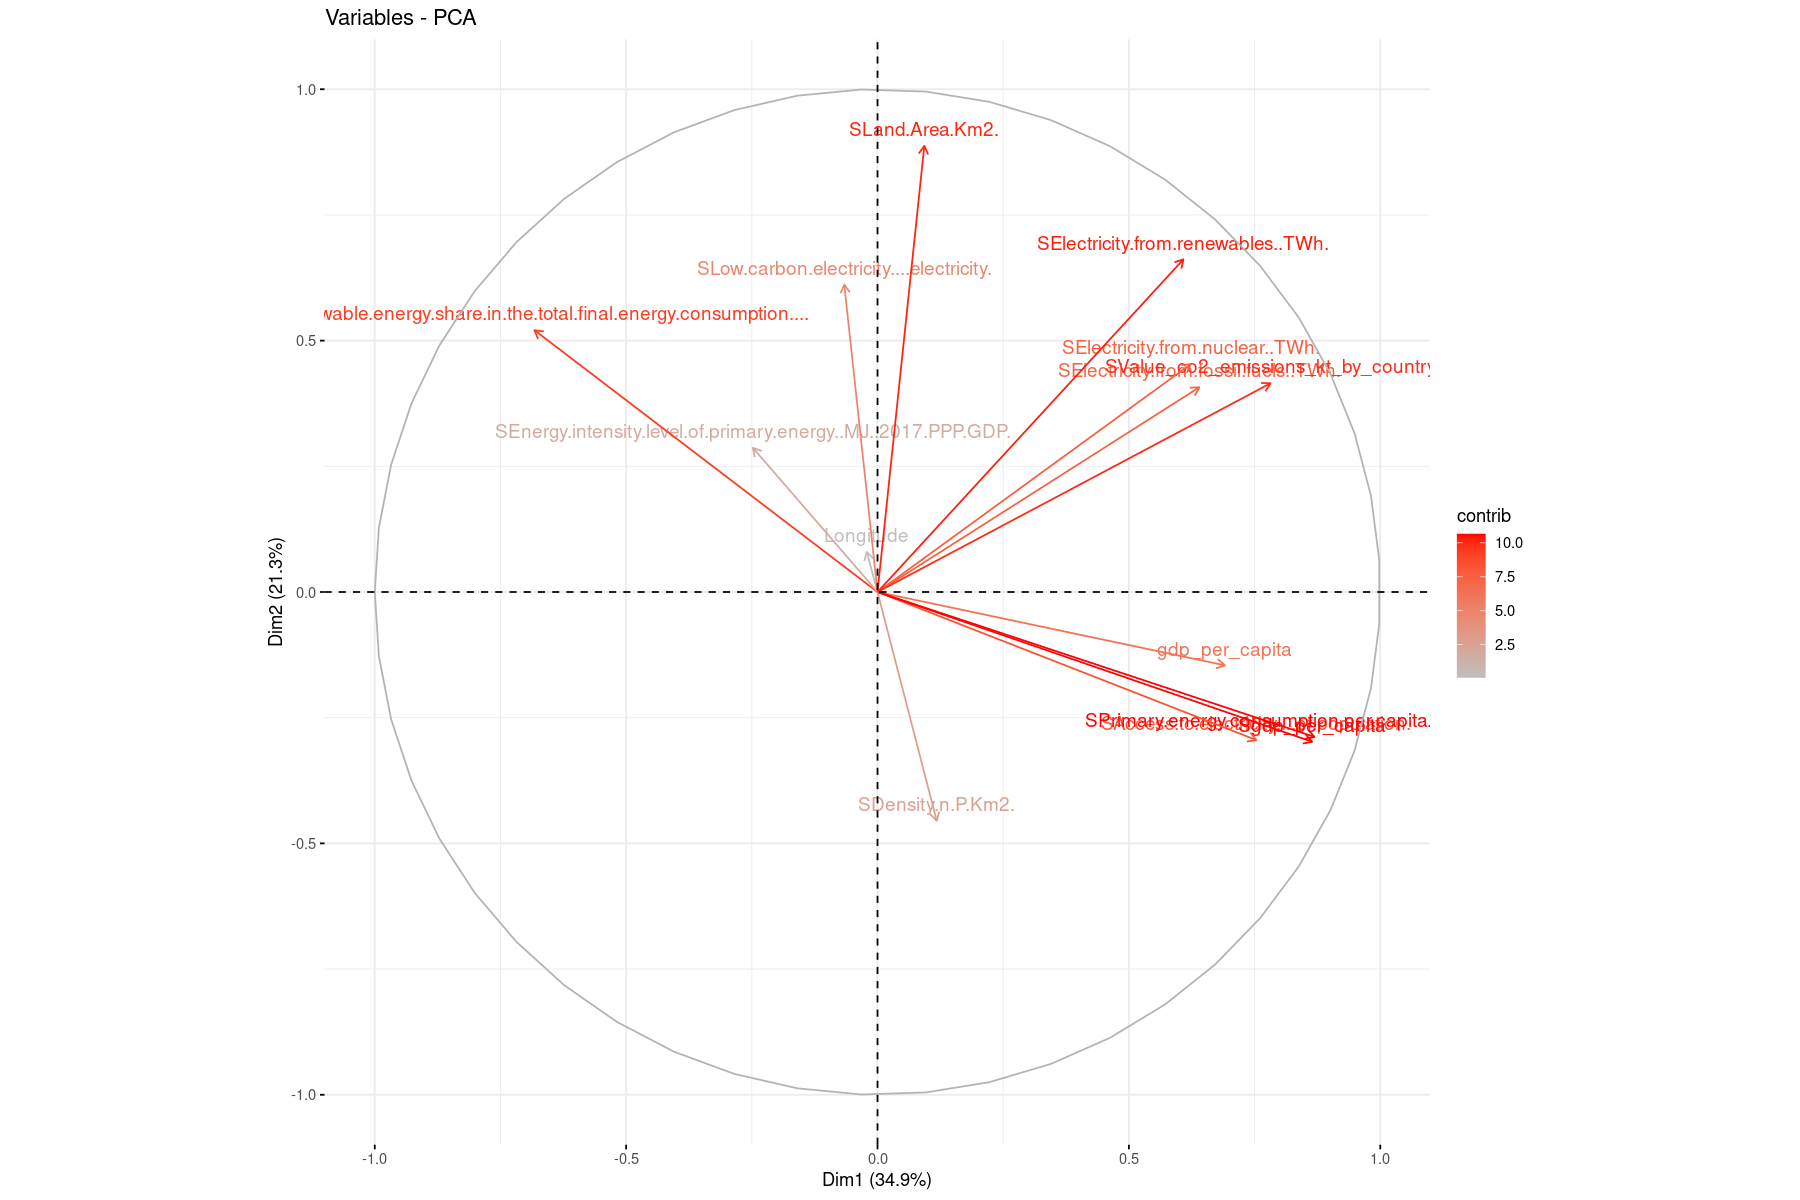

In [222]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

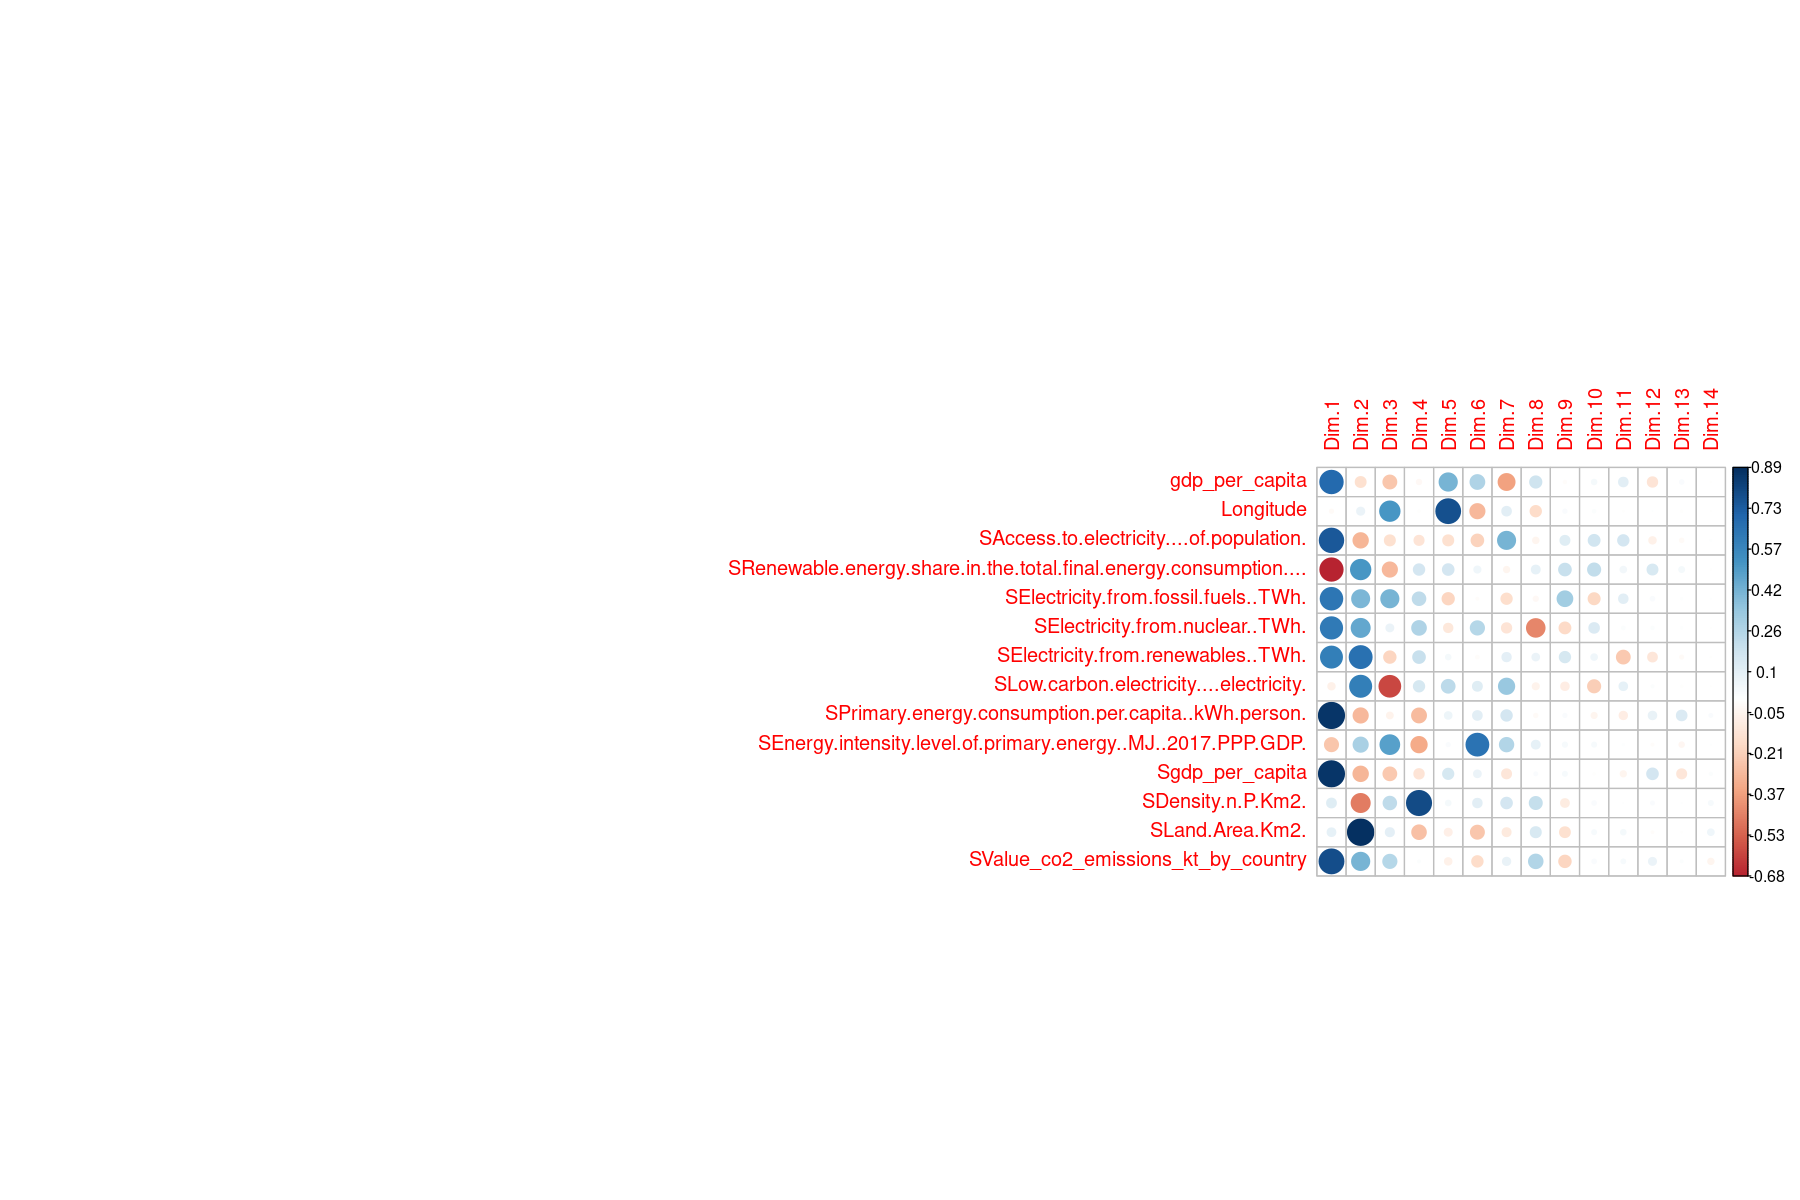

In [223]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

Dim 1 : Corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita / Négativement avec Renewable_share

Dim 2 : Corrélée positivement Land_Area, Electricity_renewables

Dim 4 : Corrélée positivement Density

Dim 5 : Corrélée positivement gdp_growth

Dim 6 Corrélée positivement Latitude

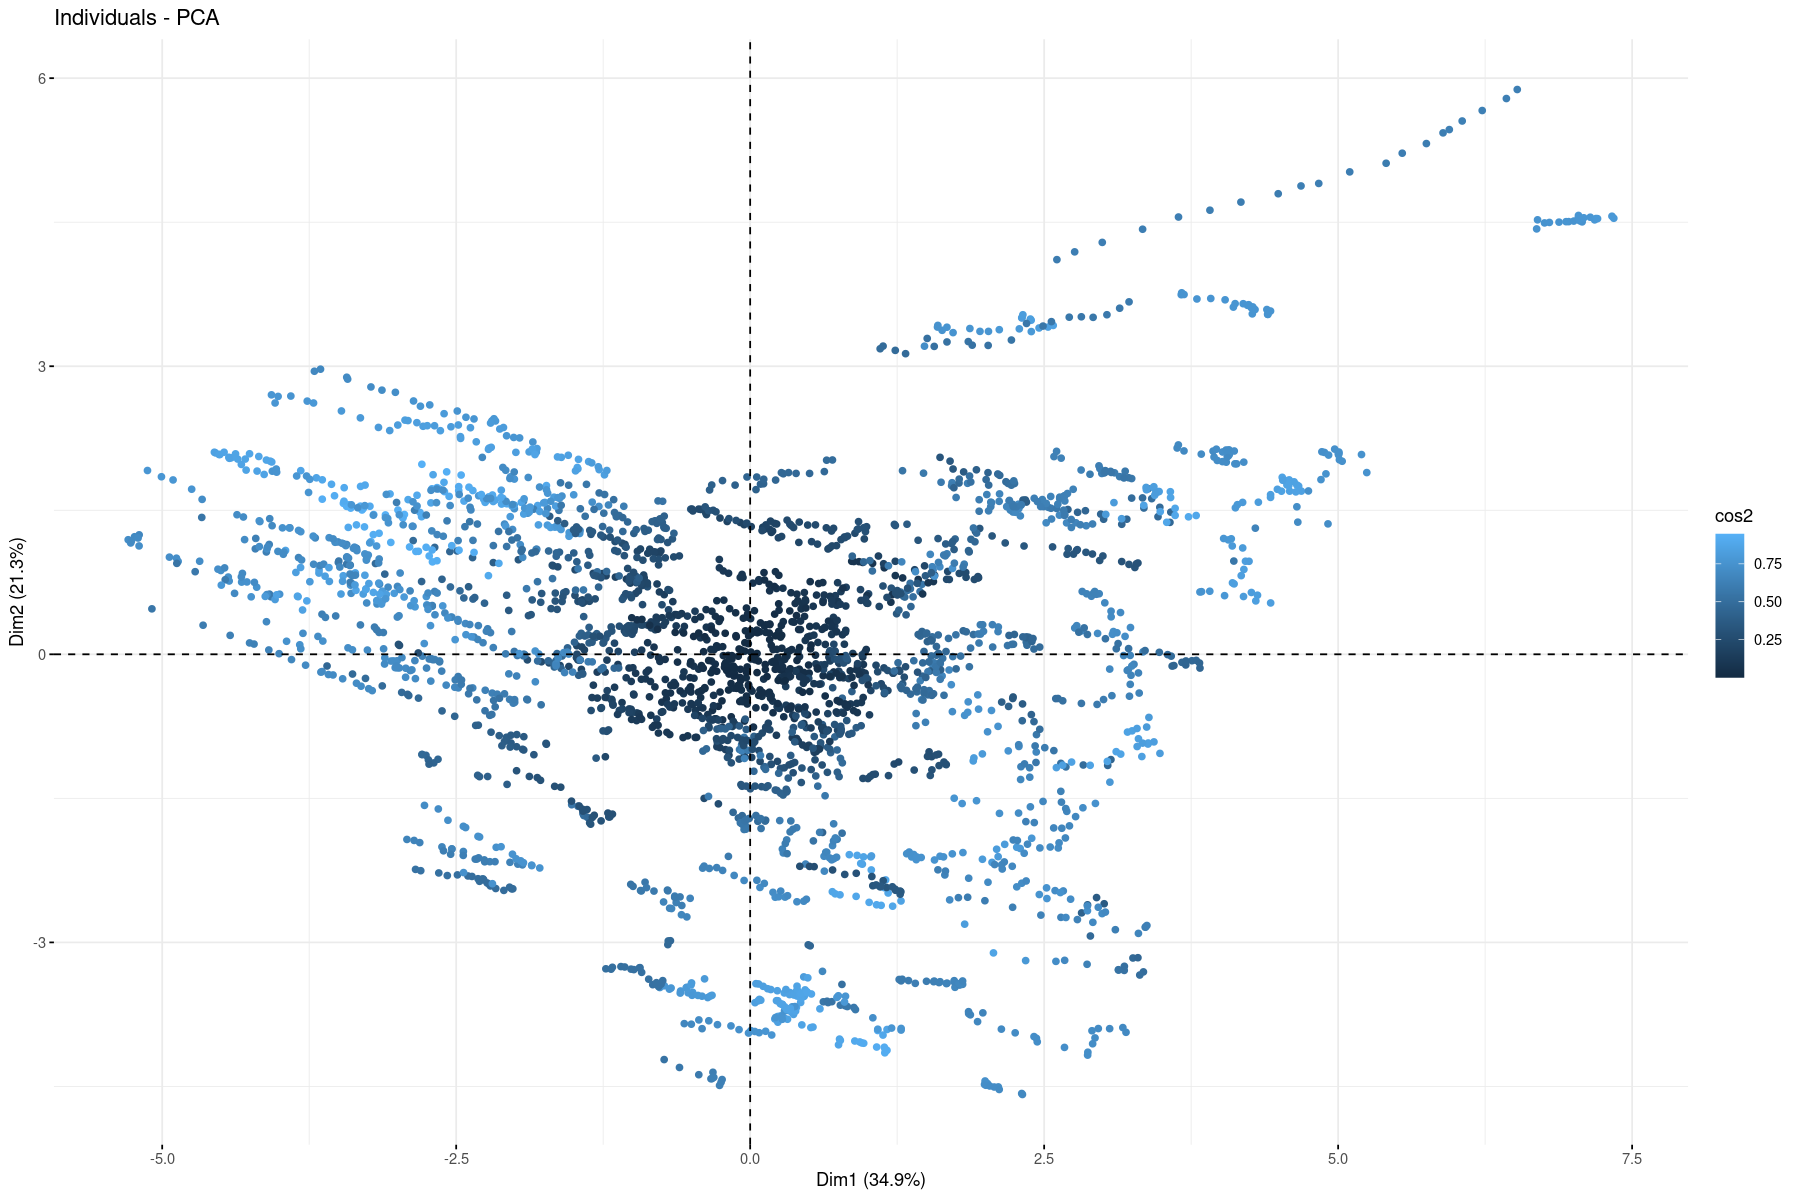

In [224]:
fviz_pca_ind(resultat_pca, label= "none", col.ind="cos2")

# Modélisation

## Question 1

### Diviser échantillon d'apprentissage / de test

In [225]:
complete_energy$Entity = as.factor(complete_energy$Entity)
complete_energy$Year = as.factor(complete_energy$Year)

MEntity <- model.matrix(~ Entity -1, data = complete_energy)
MYear <- model.matrix(~ Year-1, data = complete_energy)

data <- cbind(complete_energy[,-c(1,2)], MEntity, MYear)

complete_energy$Entity

[1] Afghanistan              Afghanistan             
   [3] Afghanistan              Afghanistan             
   [5] Afghanistan              Afghanistan             
   [7] Afghanistan              Afghanistan             
   [9] Afghanistan              Afghanistan             
  [11] Afghanistan              Afghanistan             
  [13] Afghanistan              Afghanistan             
  [15] Afghanistan              Afghanistan             
  [17] Afghanistan              Algeria                 
  [19] Algeria                  Algeria                 
  [21] Algeria                  Algeria                 
  [23] Algeria                  Algeria                 
  [25] Algeria                  Algeria                 
  [27] Algeria                  Algeria                 
  [29] Algeria                  Algeria                 
  [31] Algeria                  Algeria                 
  [33] Algeria                  Algeria                 
  [35] Algeria                  Algeria                 
  [37] Algeria                  Angola                  
  [39] Angola                   Angola                  
  [41] Angola                   Angola                  
  [43] Angola                   Angola                  
  [45] Angola                   Angola                  
  [47] Angola                   Angola                  
  [49] Angola                   Angola                  
  [51] Angola                   Angola                  
  [53] Angola                   Angola                  
  [55] Angola                   Angola                  
  [57] Angola                   Antigua and Barbuda     
  [59] Antigua and Barbuda      Antigua and Barbuda     
  [61] Antigua and Barbuda      Antigua and Barbuda     
  [63] Antigua and Barbuda      Antigua and Barbuda     
  [65] Antigua and Barbuda      Antigua and Barbuda     
  [67] Antigua and Barbuda      Antigua and Barbuda     
  [69] Antigua and Barbuda      Antigua and Barbuda     
  [71] Antigua and Barbuda      Antigua and Barbuda     
  [73] Antigua and Barbuda      Antigua and Barbuda     
  [75] Antigua and Barbuda      Antigua and Barbuda     
  [77] Antigua and Barbuda      Argentina               
  [79] Argentina                Argentina               
  [81] Argentina                Argentina               
  [83] Argentina                Argentina               
  [85] Argentina                Argentina               
  [87] Argentina                Argentina               
  [89] Argentina                Argentina               
  [91] Argentina                Argentina               
  [93] Argentina                Argentina               
  [95] Argentina                Argentina               
  [97] Argentina                Armenia                 
  [99] Armenia                  Armenia                 
 [101] Armenia                  Armenia                 
 [103] Armenia                  Armenia                 
 [105] Armenia                  Armenia                 
 [107] Armenia                  Armenia                 
 [109] Armenia                  Armenia                 
 [111] Armenia                  Armenia                 
 [113] Armenia                  Armenia                 
 [115] Armenia                  Armenia                 
 [117] Armenia                  Aruba                   
 [119] Aruba                    Aruba                   
 [121] Aruba                    Aruba                   
 [123] Aruba                    Aruba                   
 [125] Aruba                    Aruba                   
 [127] Aruba                    Aruba                   
 [129] Aruba                    Aruba                   
 [131] Aruba                    Aruba                   
 [133] Aruba                    Aruba                   
 [135] Australia                Australia               
 [137] Australia                Australia               
 [139] Australia                Australia               
 [141] Austra

In [85]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(complete_energy) # nombre de lignes dans les données
nvar <- ncol(complete_energy) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <- data[appri,] 
# construction de l'échantillon test
datestr <- data[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	2294 obs. of  185 variables:
 $ gdp_growth                                                       : num  8.83 1.41 5.36 3.92 21.39 ...
 $ Latitude                                                         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude                                                        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess.to.electricity....of.population.                         : num  2.69 3 3.42 3.75 3.84 ...
 $ SAccess.to.clean.fuels.for.cooking                               : num  2.35 2.48 2.7 2.87 2.97 ...
 $ SRenewable.energy.share.in.the.total.final.energy.consumption....: num  6.05 6.65 5.65 4.6 4.07 ...
 $ SElectricity.from.fossil.fuels..TWh.                             : num  0.557 0.574 0.447 0.436 0.4 ...
 $ SElectricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElectricity.from.renewables..TWh.                               : num  0.489 0.445 0.495 0.432 0.577 ...
 $ SLow.carbon.electri

Permet de tester notre modèle sur des données encore non traitées Eviter le sur ajustement. 

## Question 2

### Modèle linéaire

#### Sans sélection de variable

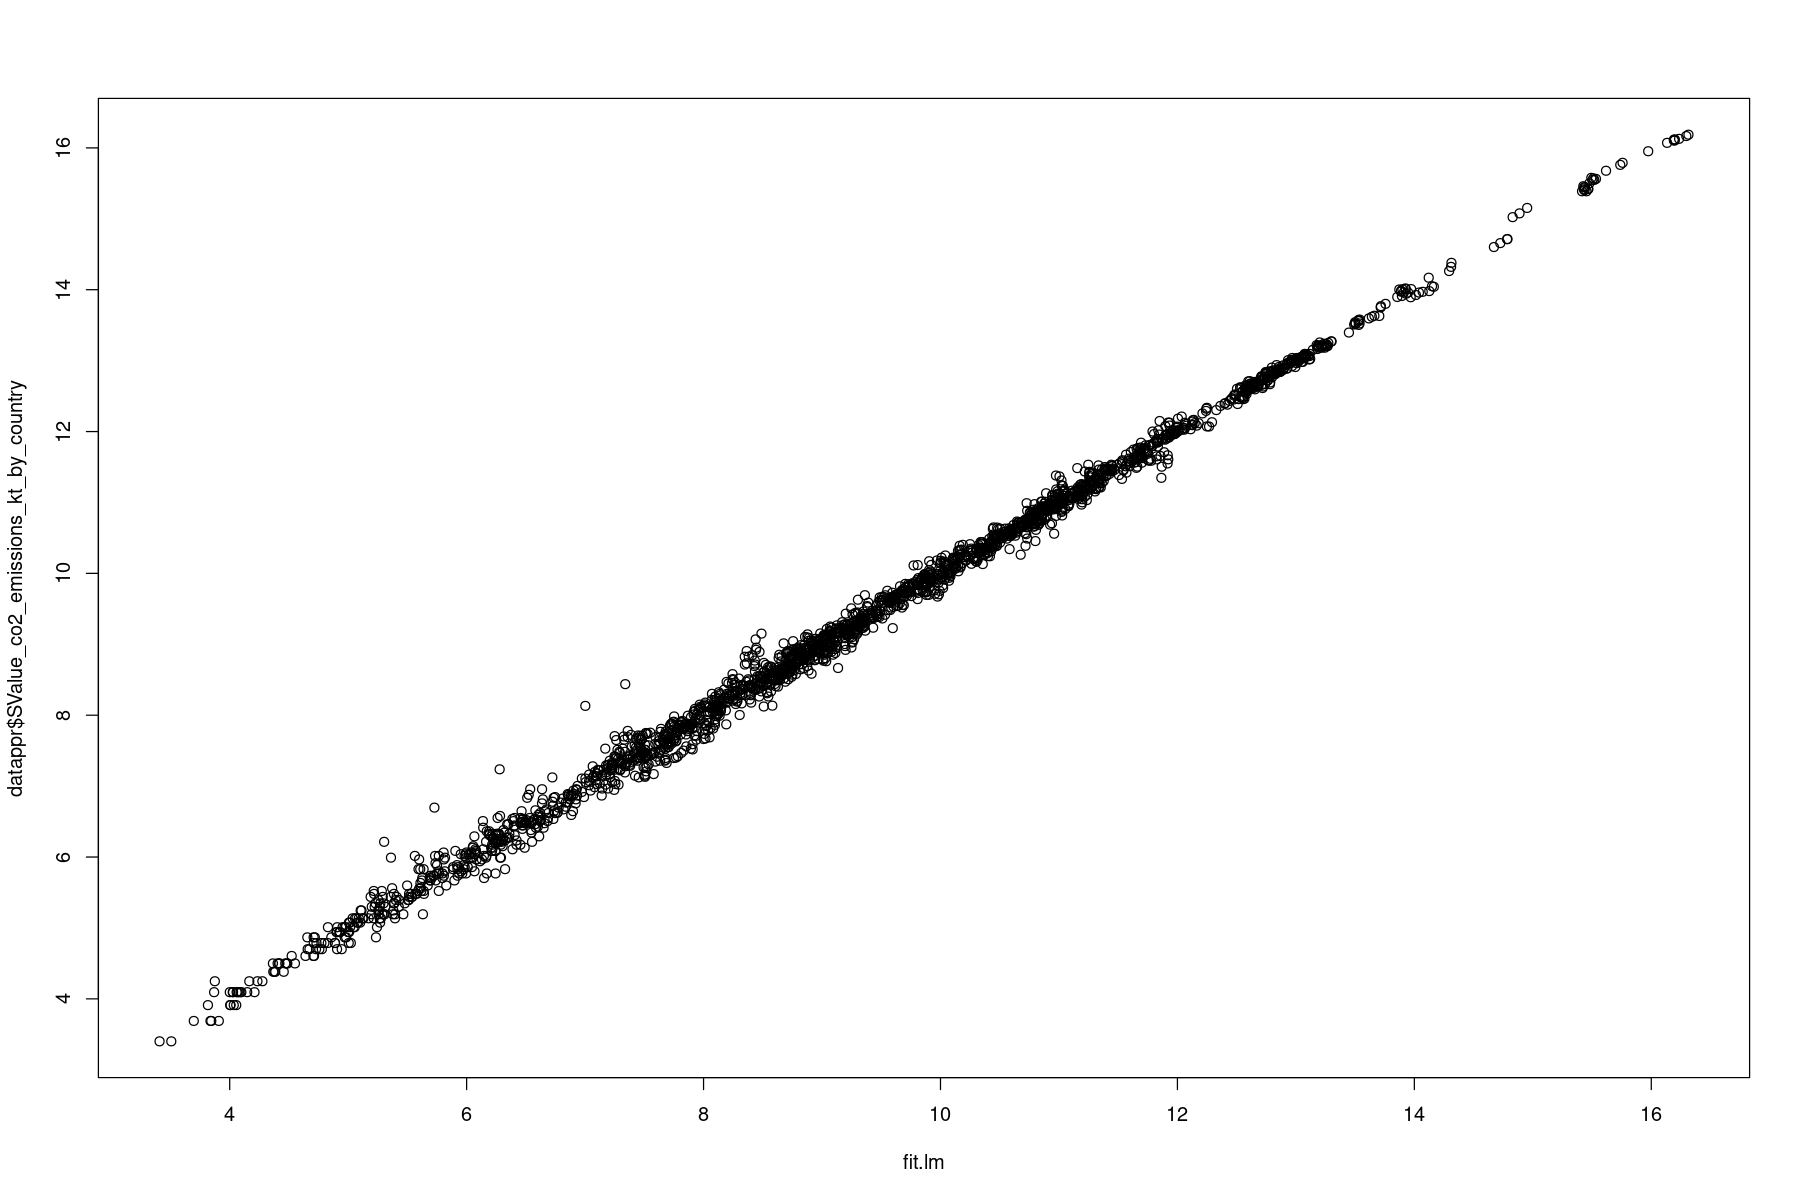

In [86]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2_emissions_kt_by_country ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

plot(fit.lm,datappr$SValue_co2_emissions_kt_by_country)

##### MSE et R²

In [87]:
MSE = mean((datappr$SValue_co2_emissions_kt_by_country - fit.lm)^2)
paste("MSE =", MSE)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2_emissions_kt_by_country - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2_emissions_kt_by_country - mean(datappr$SValue_co2_emissions_kt_by_country))^2)
R2 <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2)


[1] "MSE = 0.0179276575194949"

[1] "R2 = 0.996815626869896"

##### Graphe des résidus

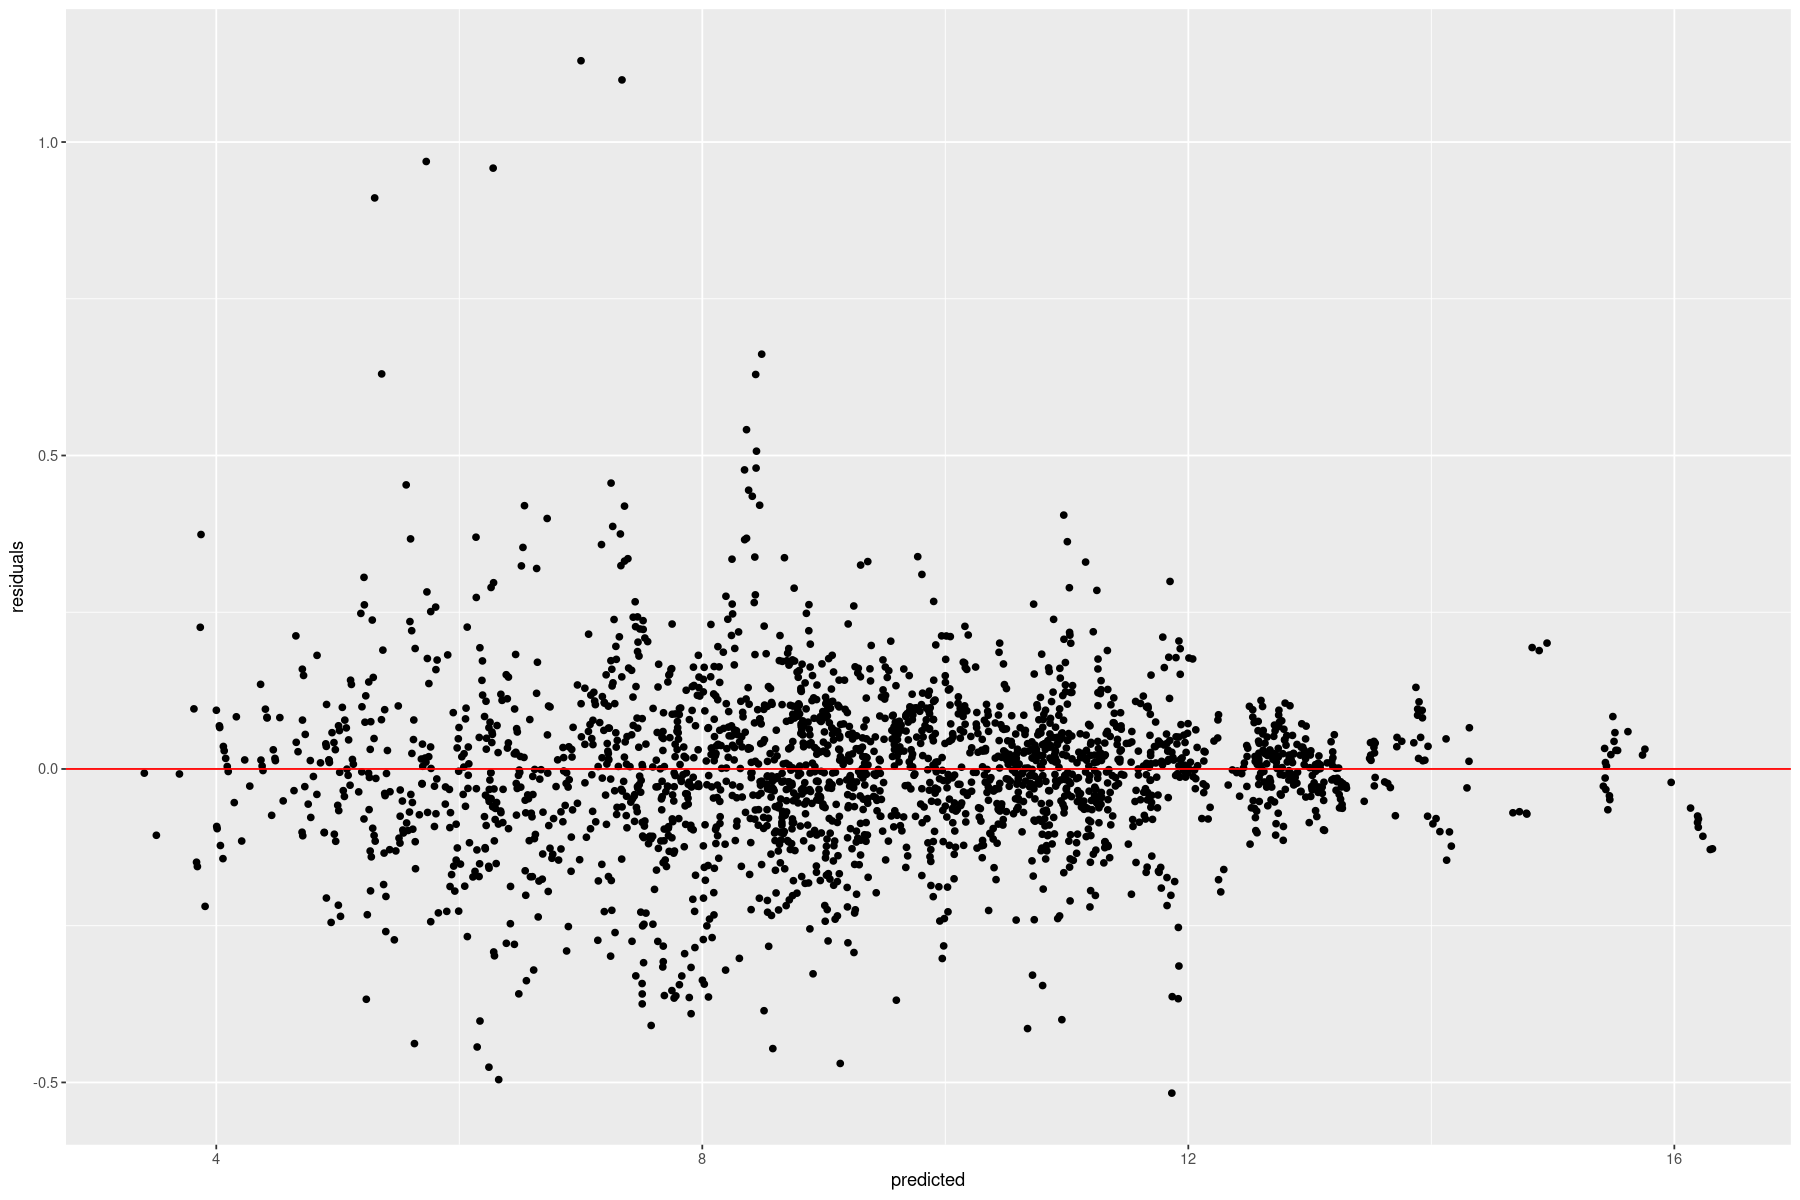

In [88]:
ggplot(data.frame(residuals = res.lm, predicted = fitted(reg.lm)), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") 

In [67]:
#summary(reg.lm)
#coef(reg.lm)

#### Avec sélection de variable (AIC)

In [68]:
reg.glm <- glm(SValue_co2_emissions_kt_by_country ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

#### Avec sélection de variable (LASSO)

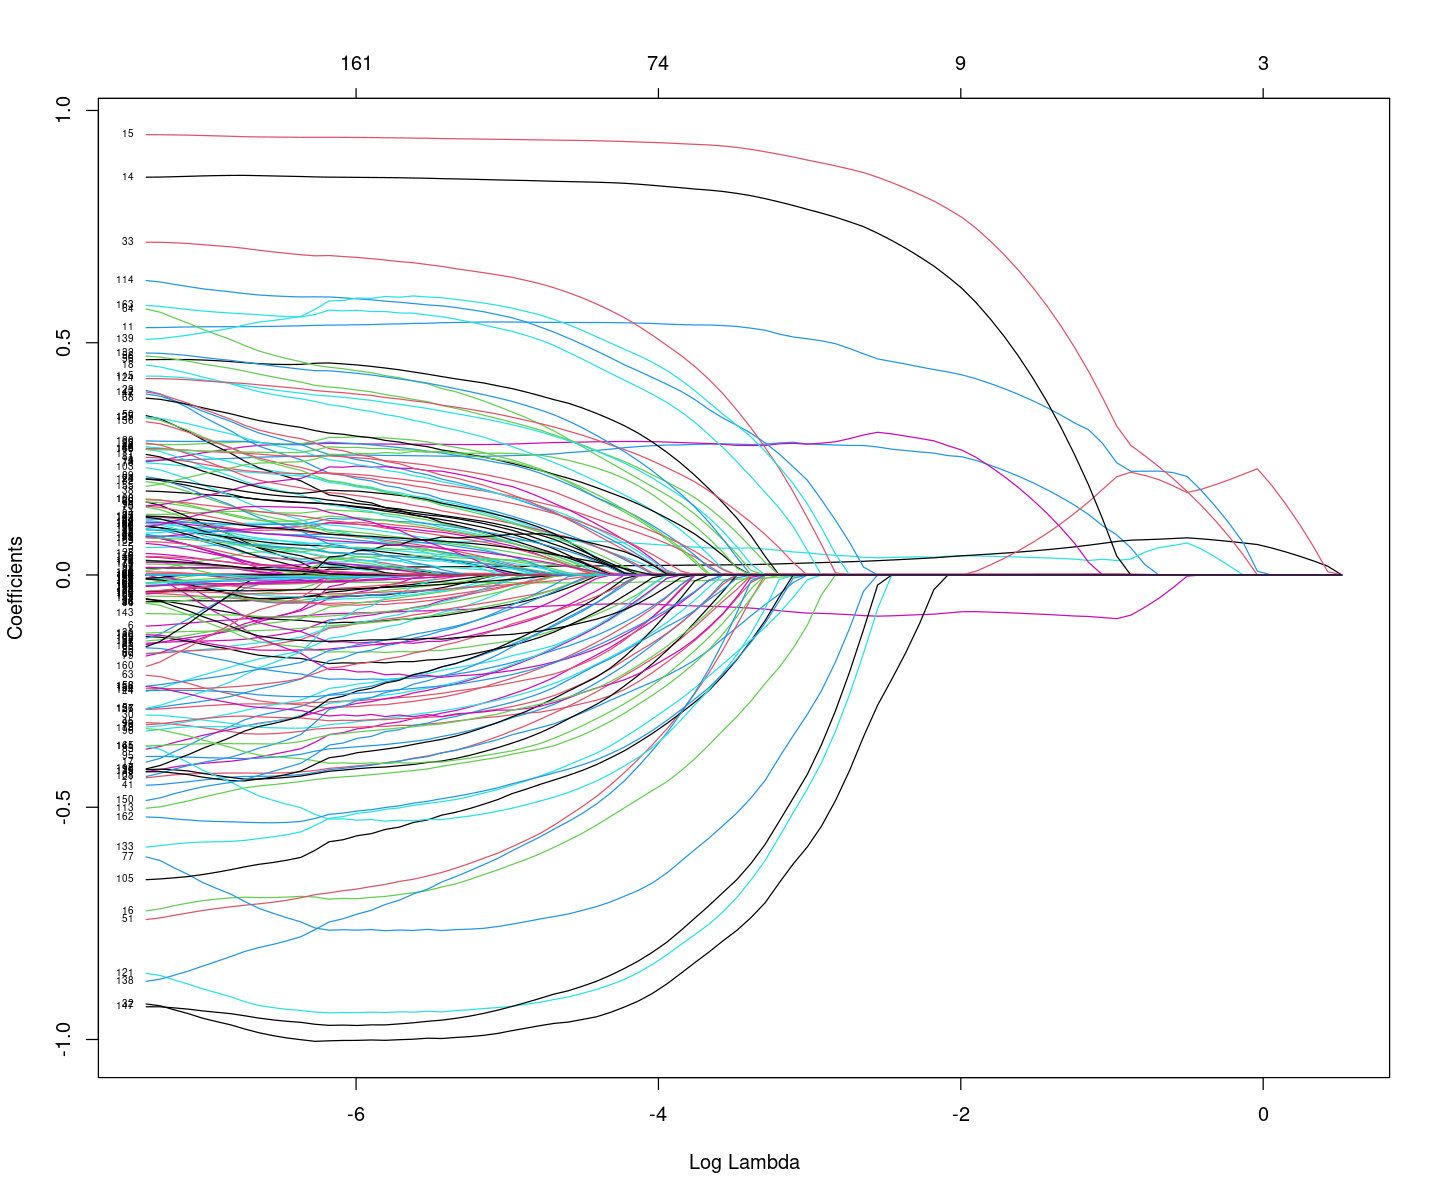

In [89]:
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 16],
                           x = as.matrix(datappr[,-16]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2_emissions_kt_by_country ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2_emissions_kt_by_country, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)

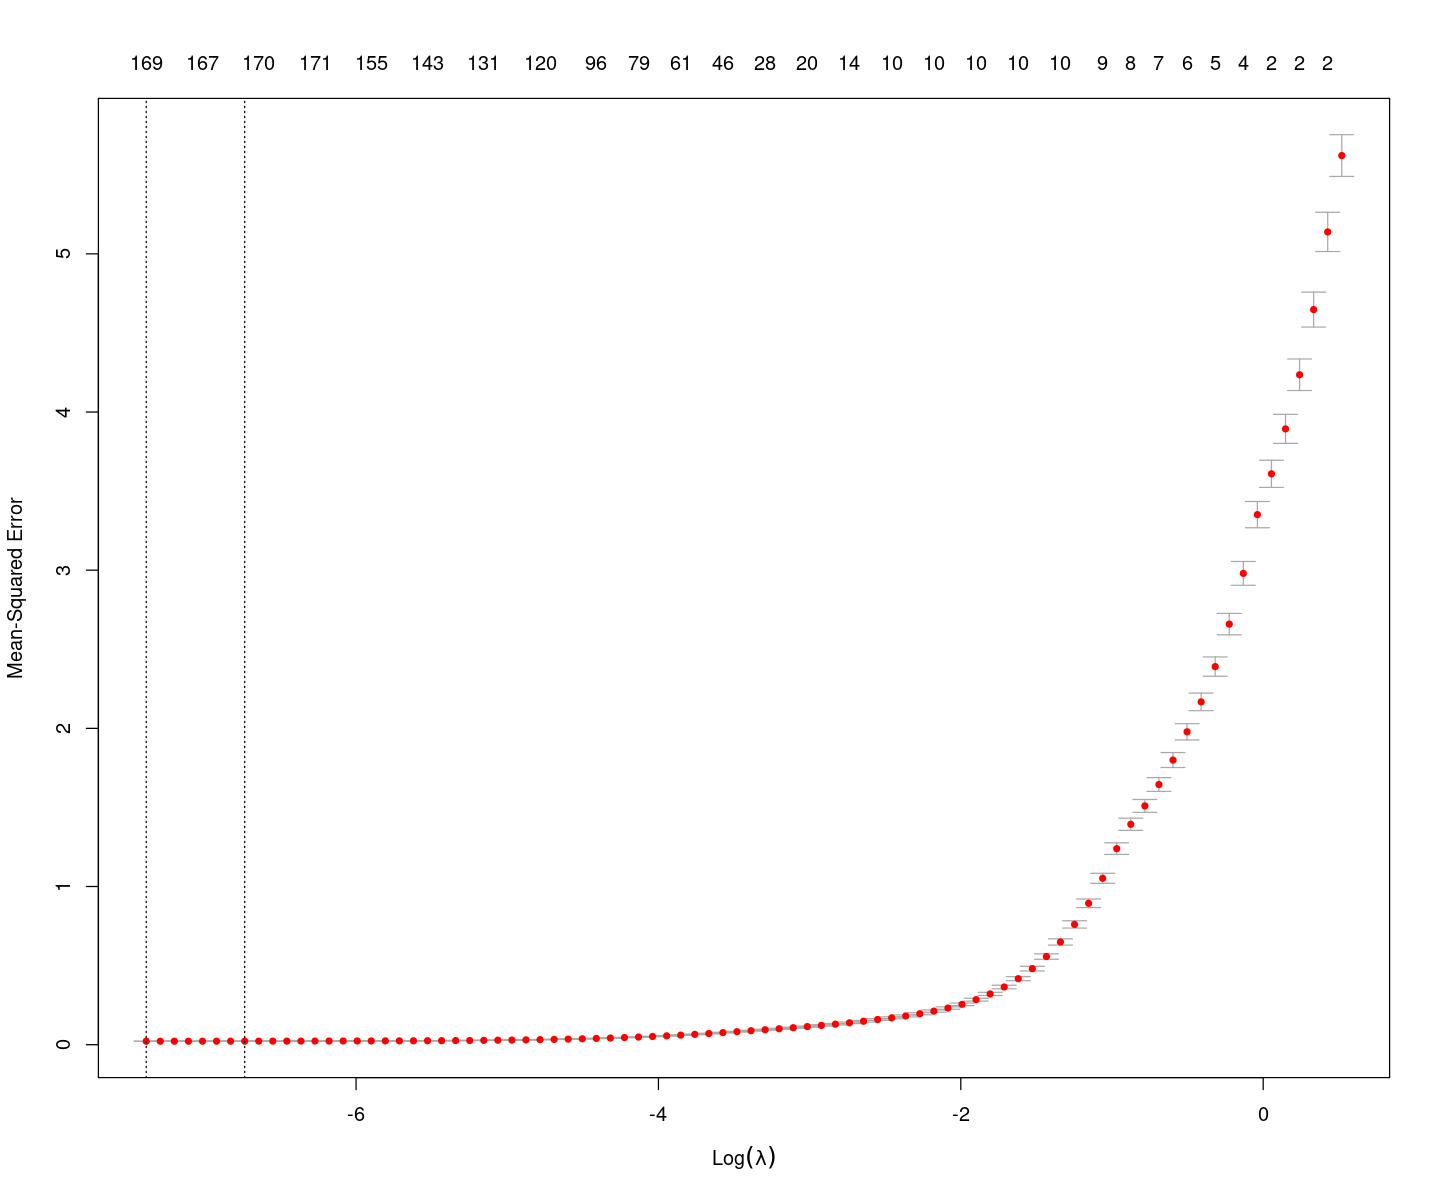

In [90]:
reg.lasso.cv = cv.glmnet(y = datappr[, 16], x = x.mat)
#plot(reg.lasso.cv)
plot(reg.lasso.cv)

In [91]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
#coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.001"

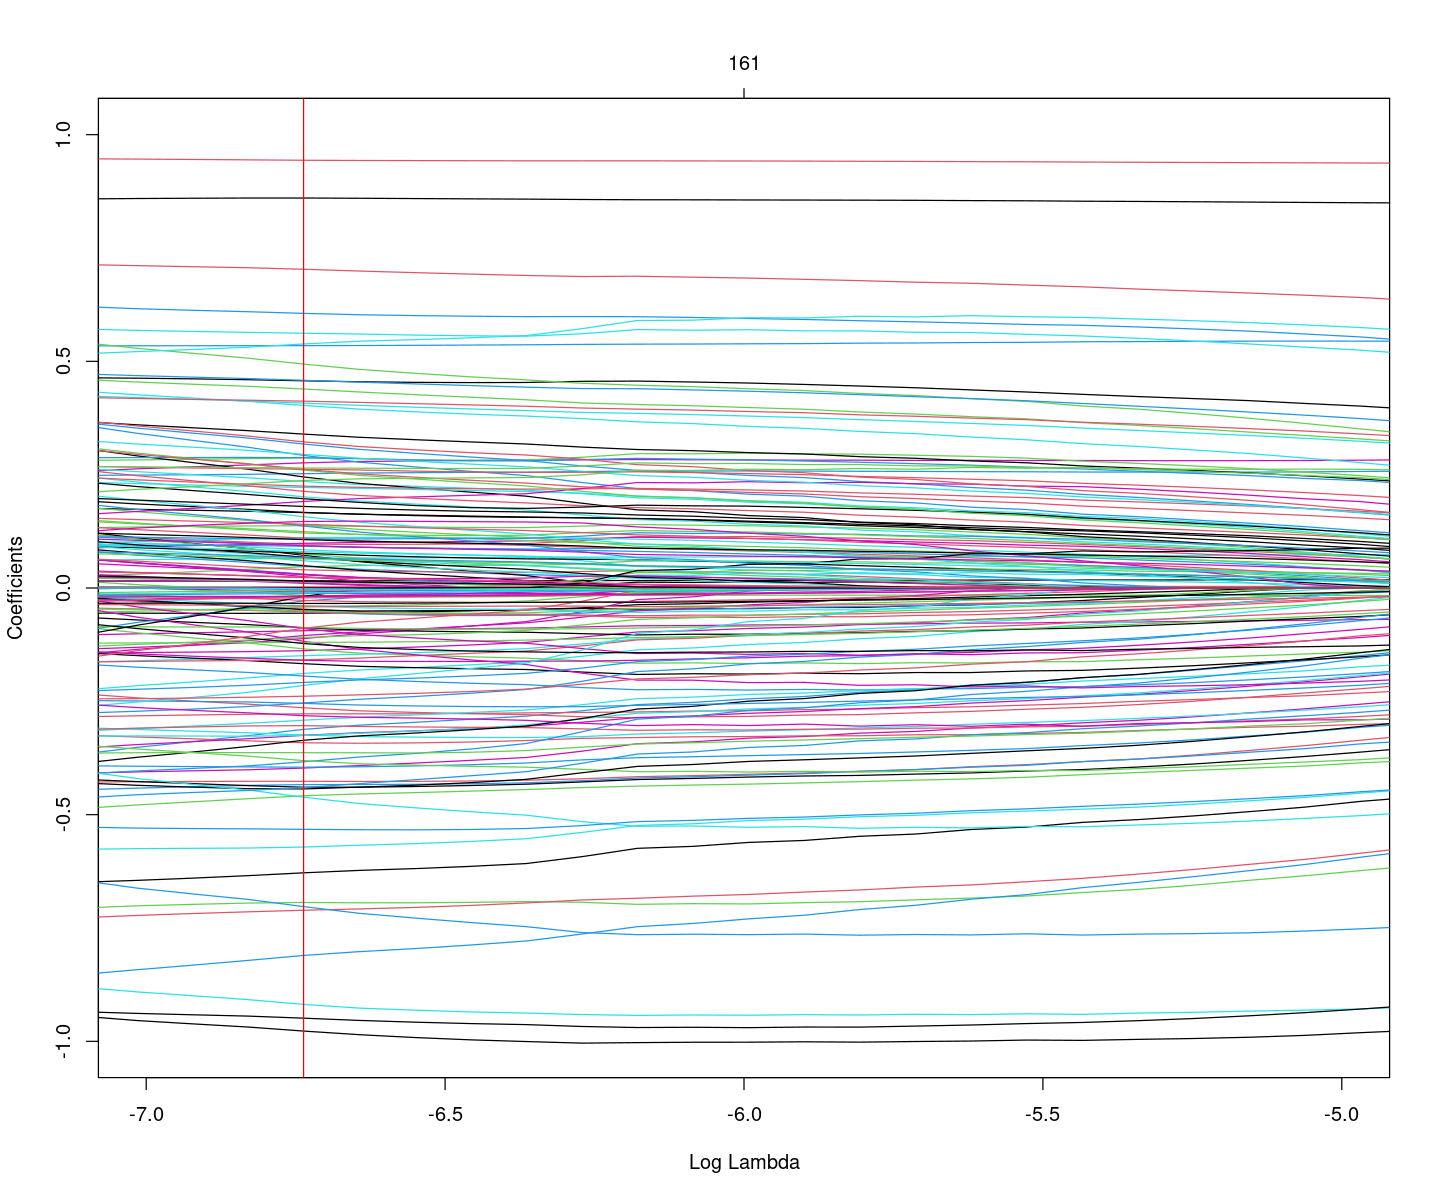

In [92]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7,-5),ylim=c(-1,1))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [93]:
# Extraction des valeurs ajustées et des résidus

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2_emissions_kt_by_country - fit.lasso.1se 

##### MSE et R²

In [94]:
MSE = mean((datappr$SValue_co2_emissions_kt_by_country - fit.lasso.1se)^2)
paste("MSE =", MSE)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2_emissions_kt_by_country - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2_emissions_kt_by_country - mean(datappr$SValue_co2_emissions_kt_by_country))^2)
R2 <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2)

[1] "MSE = 0.0191421926847727"

[1] "R2 = 0.996599896892811"

##### Graphe des résidus

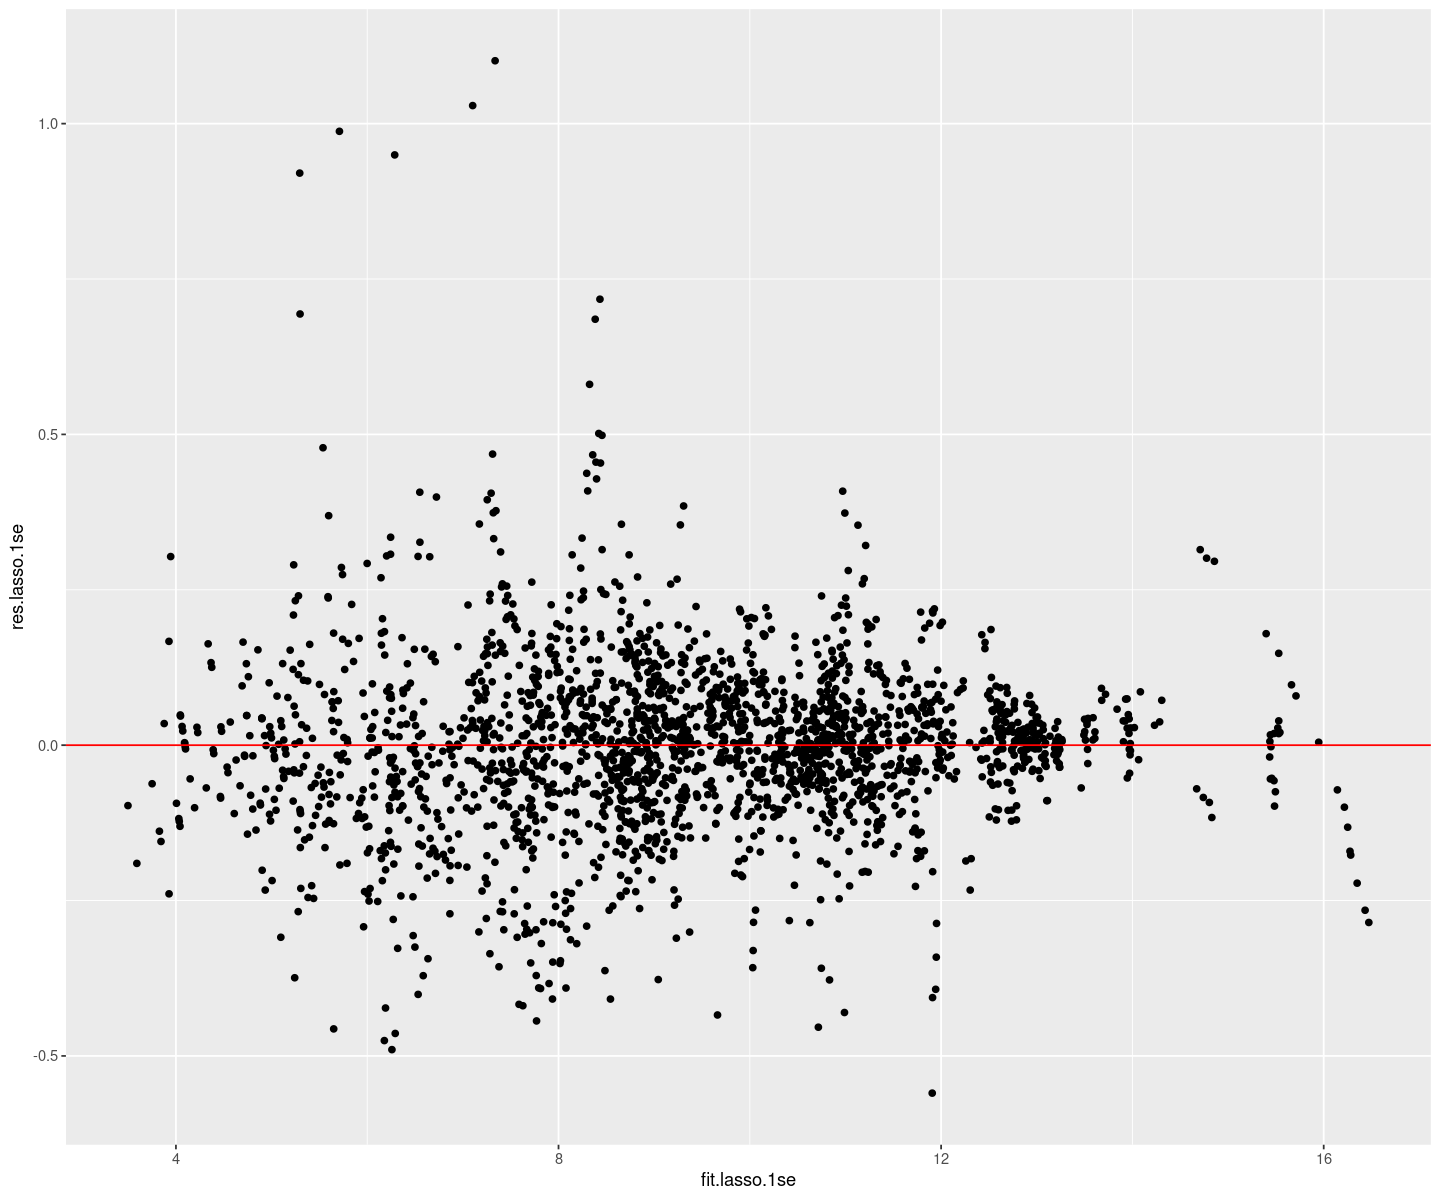

In [95]:

ggplot(data.frame(residuals = res.lasso.1se, predicted = fit.lasso.1se), aes(x = fit.lasso.1se, y = res.lasso.1se)) + geom_point()+
  geom_hline(yintercept = 0 ,color = "red")

### SVM

On enlève l'année 2020 parce qu'il n'y a jamais aucune donnée dedans

In [76]:
datappr <- datappr[, !names(data) %in% "Year2020"]

In [77]:
svm.reg0 = svm(SValue_co2_emissions_kt_by_country ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = SValue_co2_emissions_kt_by_country ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.005464481 
    epsilon:  0.1 


Number of Support Vectors:  532






#### Choix du meilleur noyau SVM

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Year2020’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ...

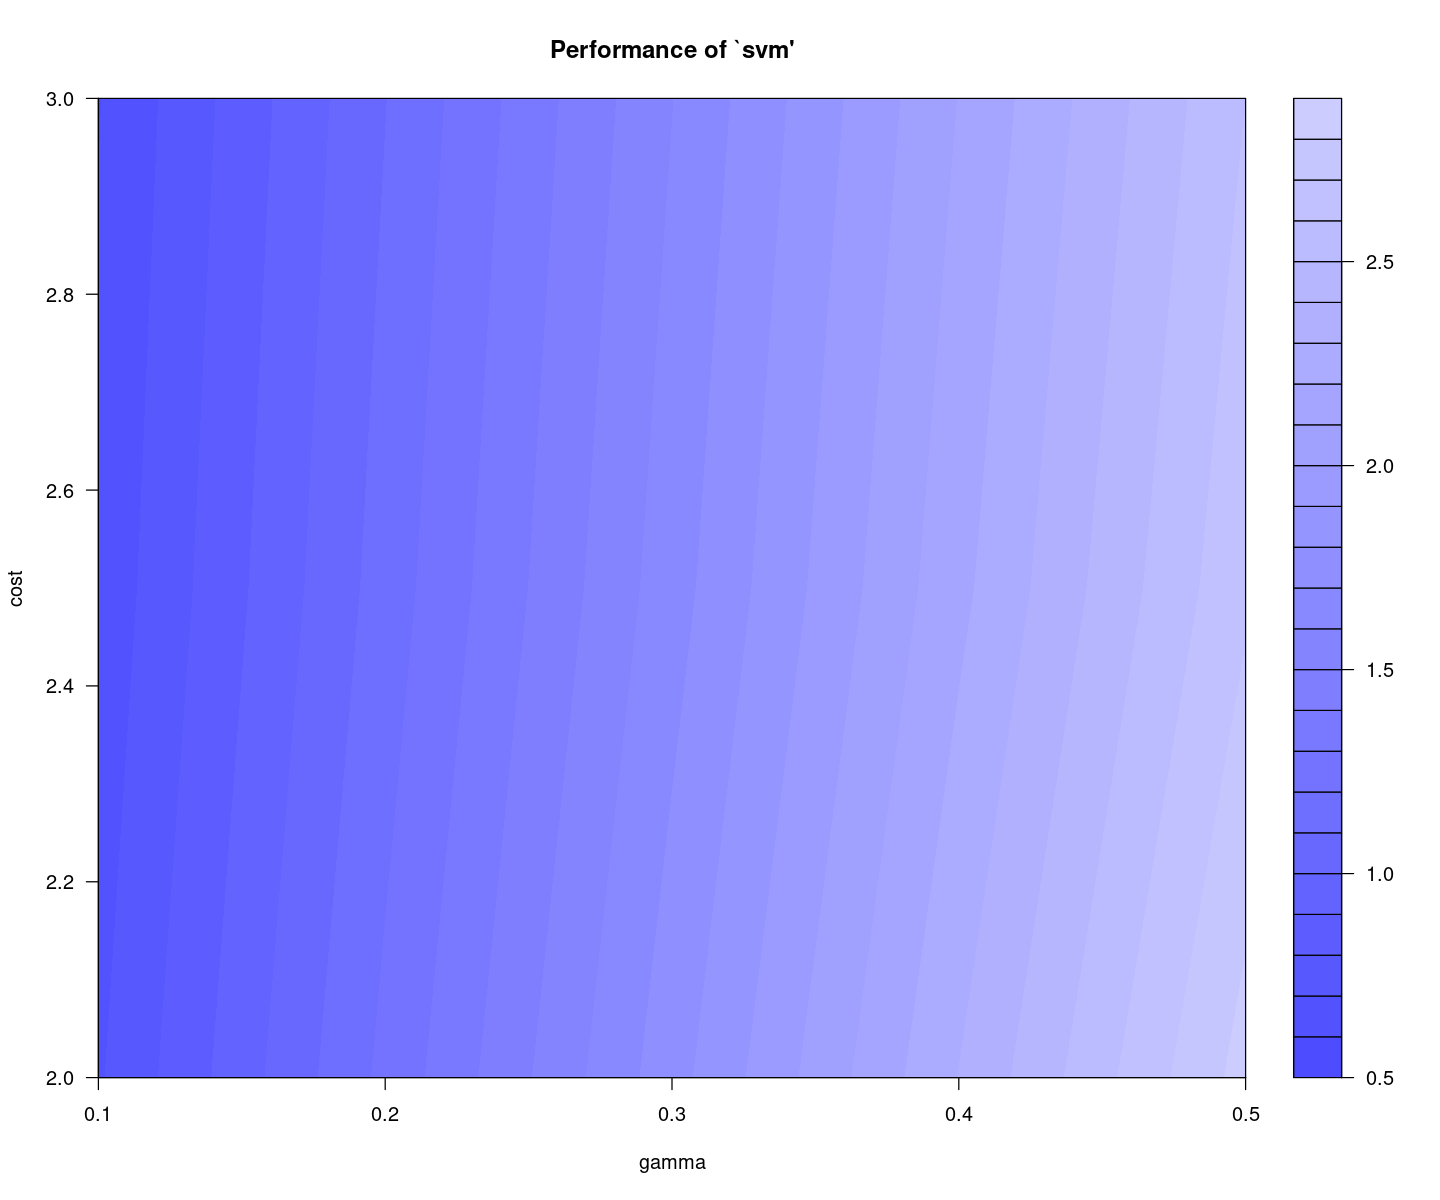

In [97]:
svm.reg.tune = tune.svm(SValue_co2_emissions_kt_by_country ~ ., data = datappr, cost = seq(2, 3, by = 0.5), 
    gamma = seq(0.1, 0.5, by = 0.1))
plot(svm.reg.tune)

In [ ]:
svm.reg.tune = tune.svm(SValue_co2_emissions_kt_by_country ~ ., data = datappr, cost = c(1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.02, 0.1, by = 0.02))
plot(svm.reg.tune)

In [ ]:
#set.seed(2021)
svm.reg = svm(SValue_co2_emissions_kt_by_country ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon = 0.25)
summary(svm.reg)

#### Résidus

In [ ]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

### Arbre

In [79]:
tree.reg=rpart(SValue_co2_emissions_kt_by_country~.,data=datappr,control=rpart.control(cp=0.001))

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


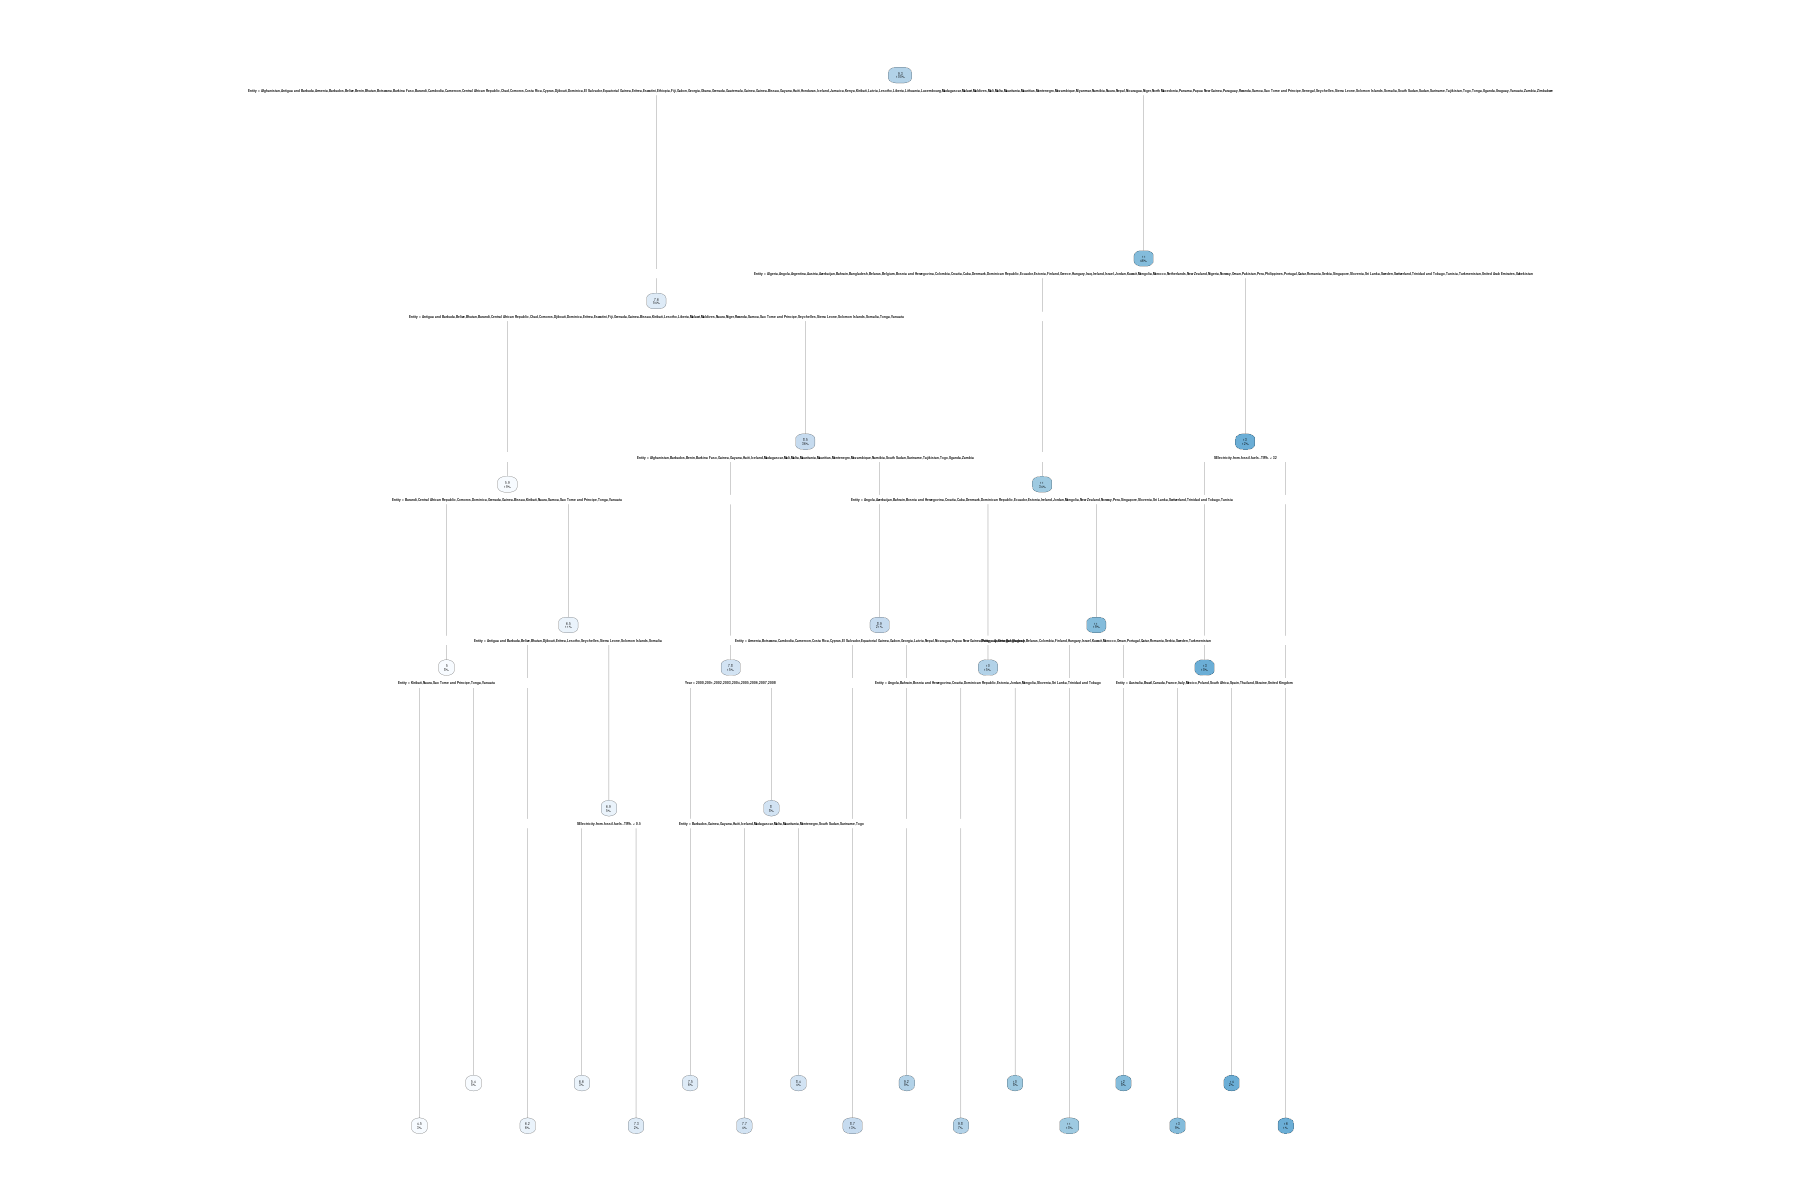

In [80]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

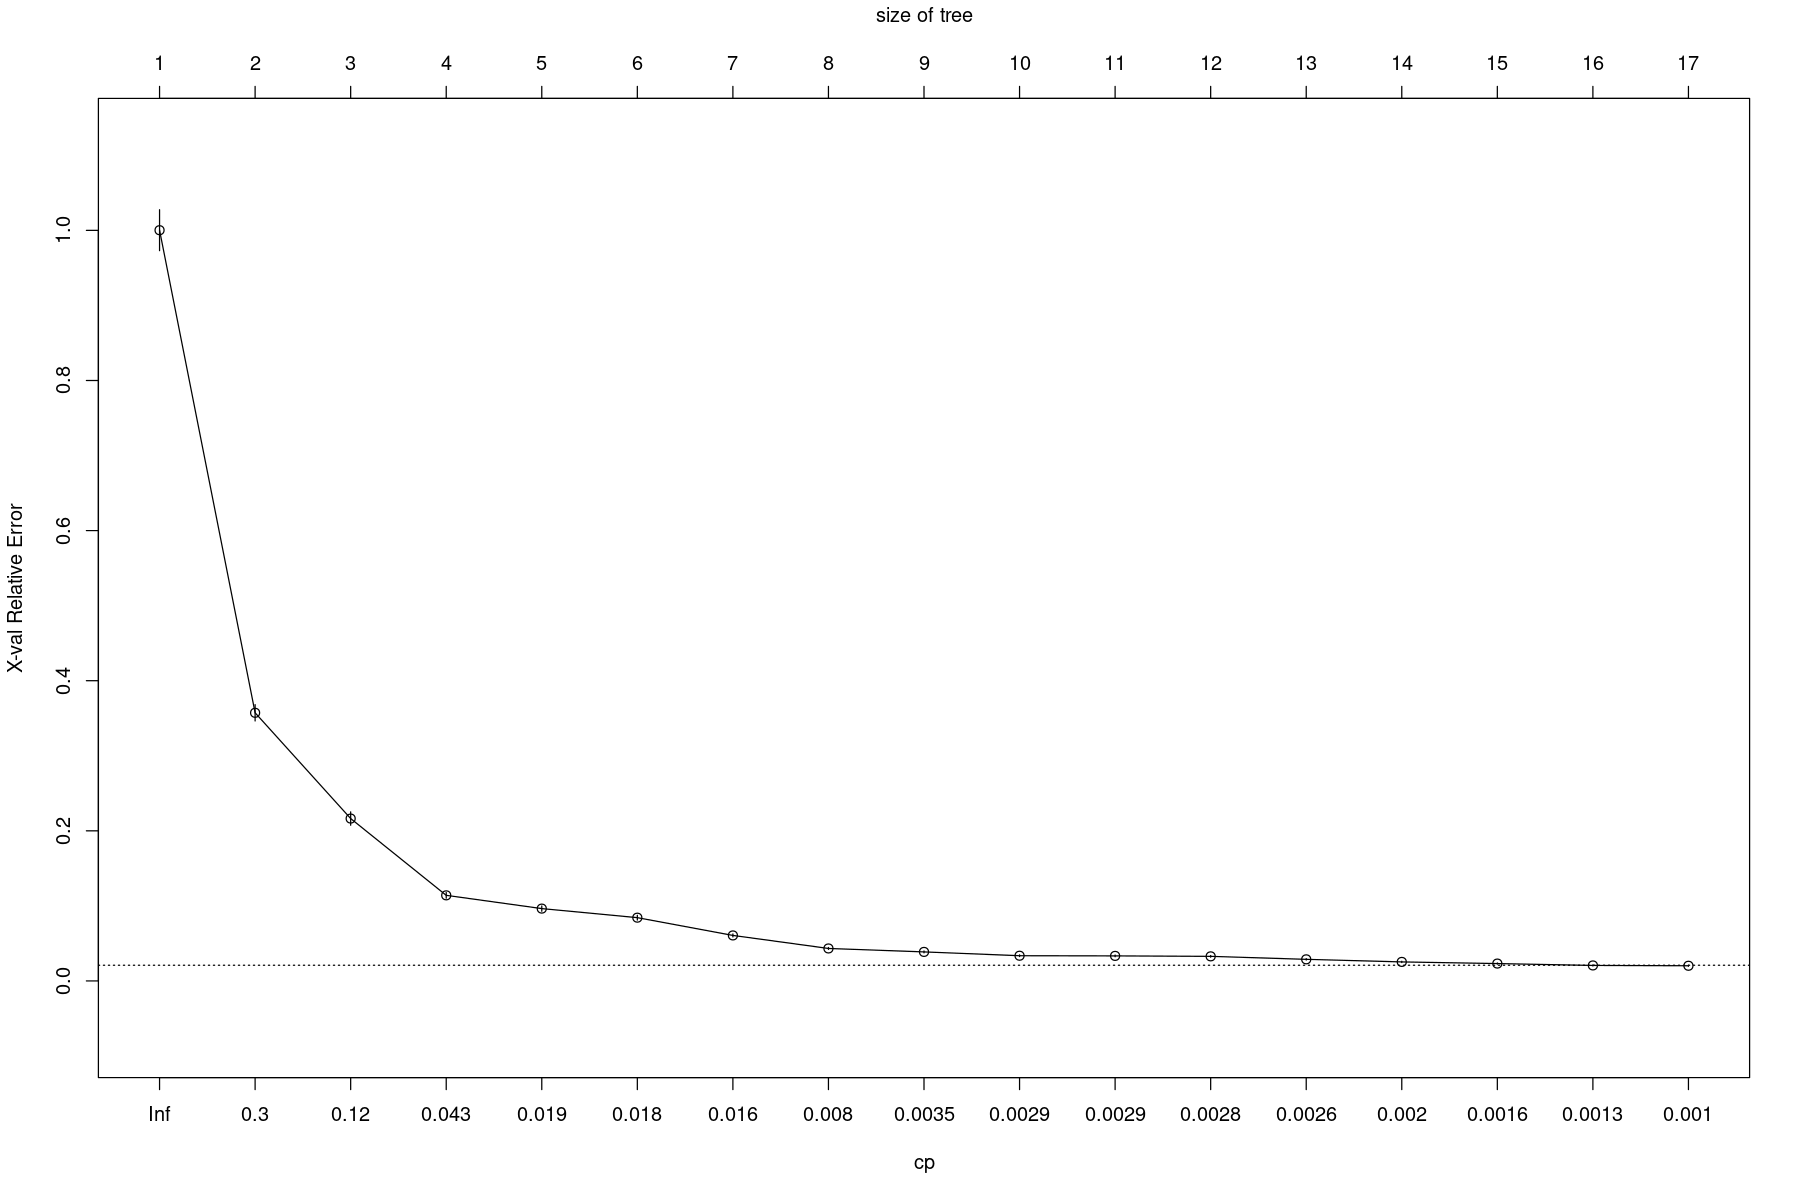

In [81]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2_emissions_kt_by_country"])^2,2,sum)

plotcp(tree.reg)

[1] 0.001041516

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


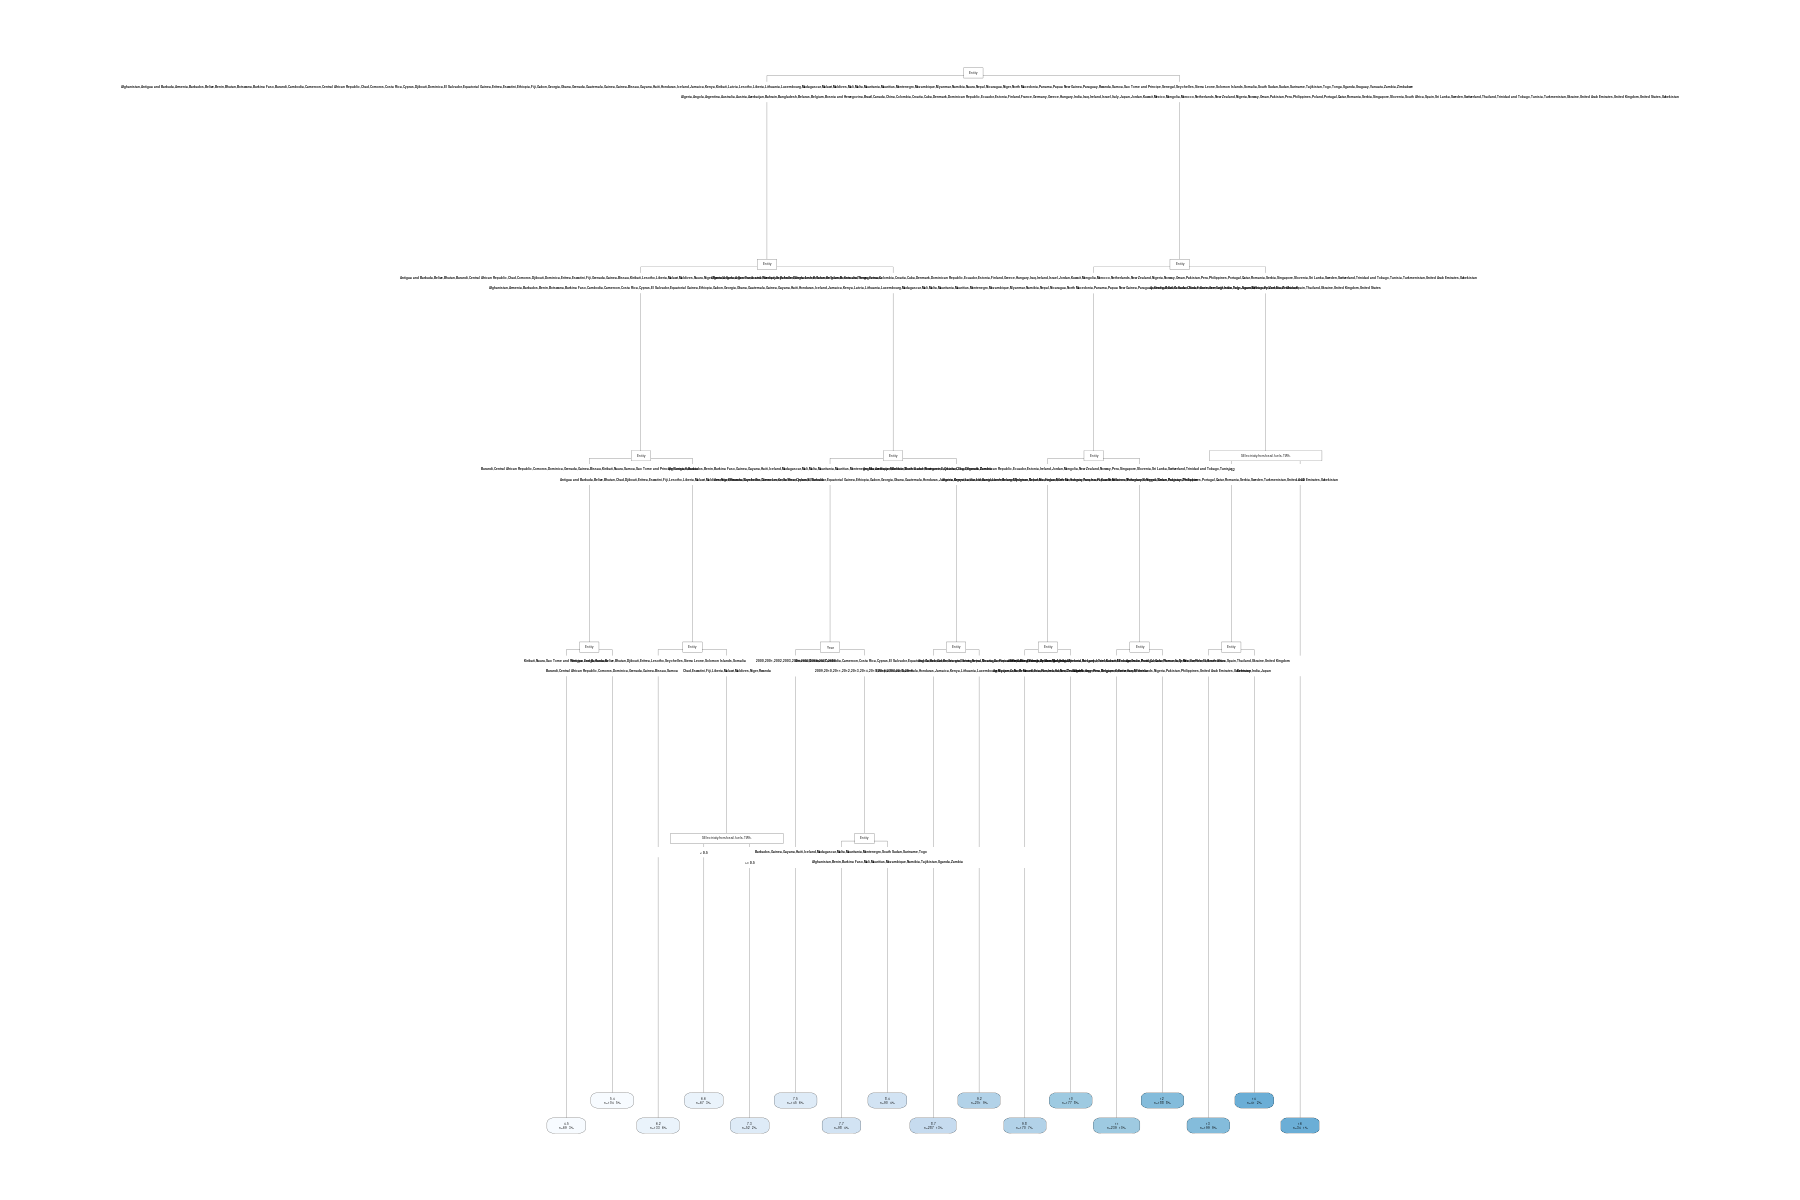

In [82]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2_emissions_kt_by_country~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



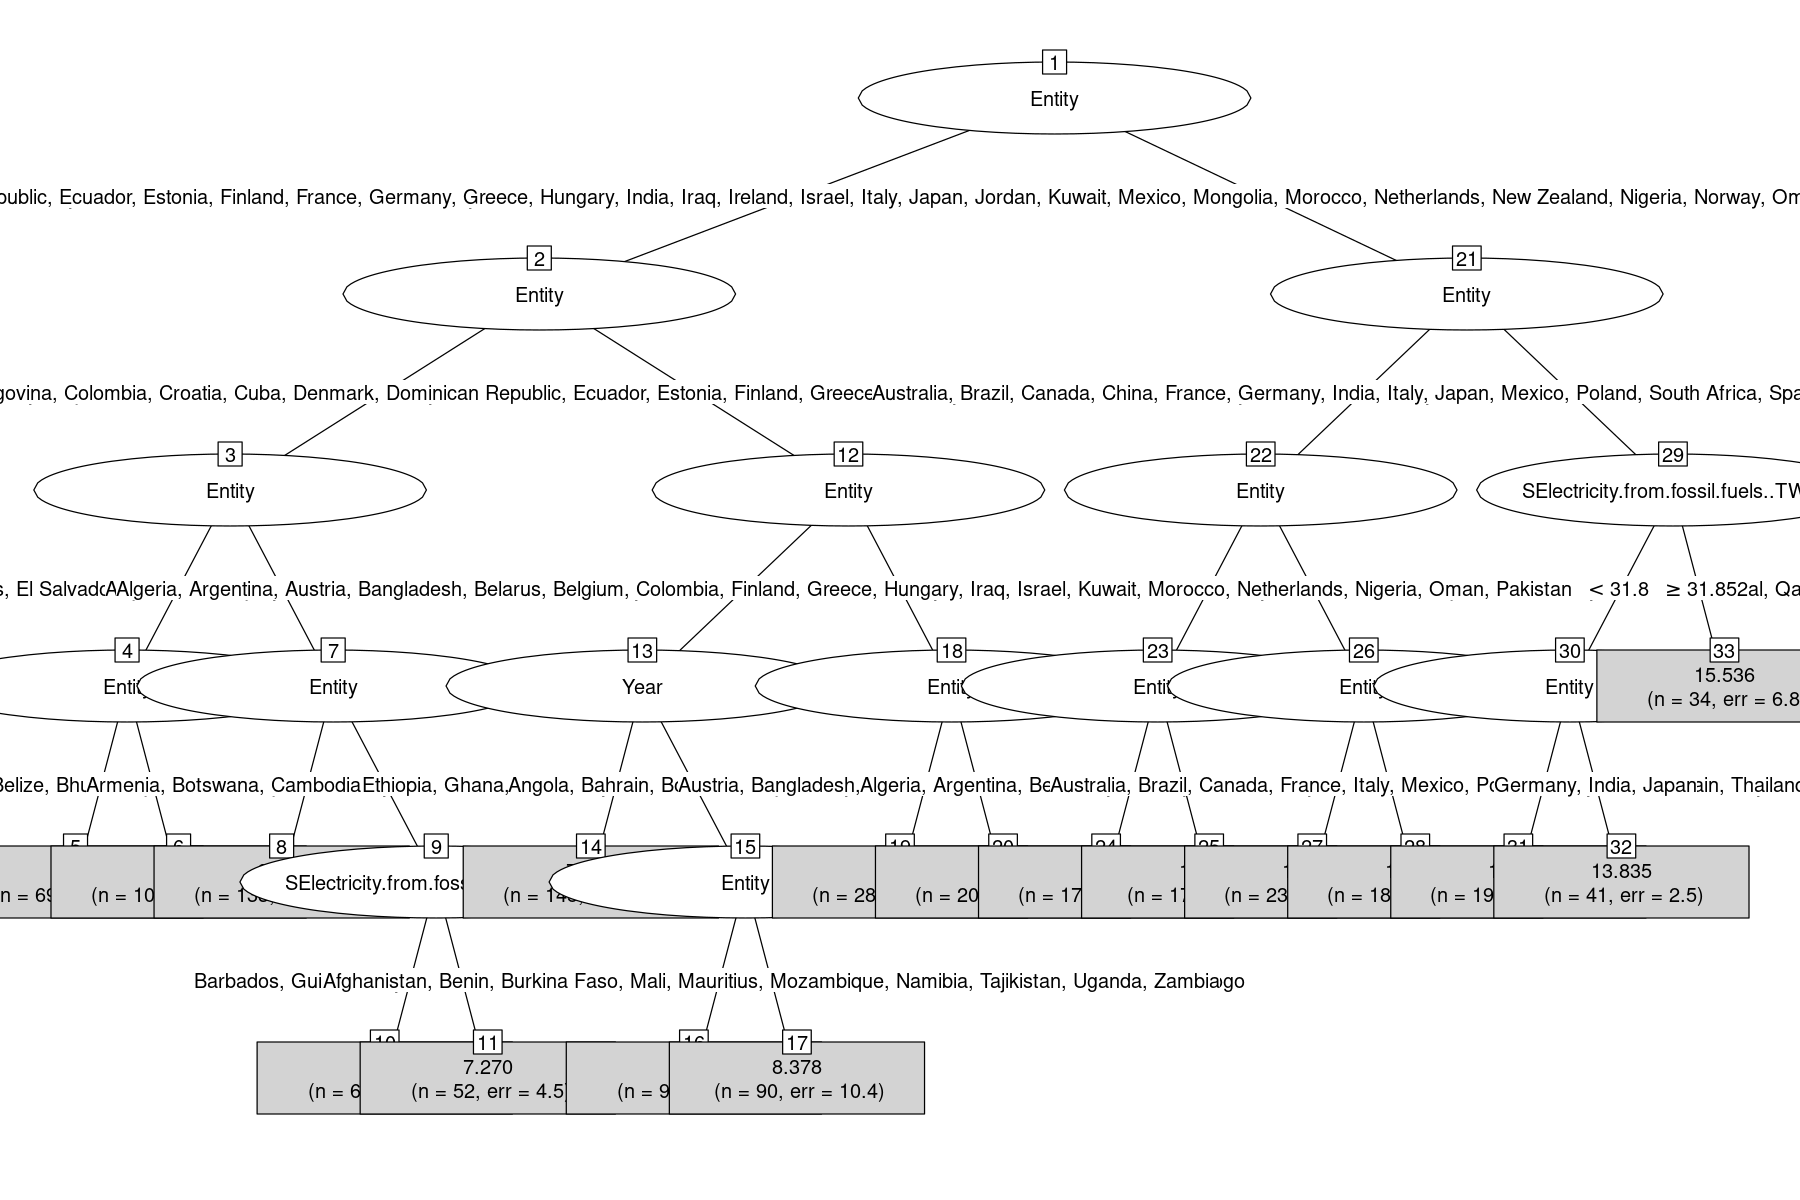

In [83]:
library(partykit)
plot(as.party(tree.reg), type="simple")

In [ ]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2_emissions_kt_by_country"]

options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

### Random Forest

In [ ]:
rf.reg=randomForest(SValue_co2_emissions_kt_by_country~., data=datappr,xtest=datestr[,-c(16,20)],ytest=datestr[,"SValue_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

In [ ]:
rf.reg=randomForest(SValue_co2_emissions_kt_by_country~.,data=datappr,mtry=5,importance=TRUE,na.action = na.omit)